# SLC FINAL EXAM PAPER

# Data Set Information:

•	The articles were published by Mashable  and their content as the rights to reproduce it belongs to them. Hence, this dataset does not share the original content but some statistics associated with it. The original content be publicly accessed and retrieved using the provided urls.
•	Acquisition date: January 8, 2015
•	The estimated relative performance values were estimated by the authors using a Random Forest classifier and a rolling windows as assessment method. See their article for more details on how the relative performance values were set.

# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix,roc_auc_score,roc_curve,accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
on = pd.read_csv('OnlineNewsPopularity.csv')
on.head()

url   timedelta  \
0  http://mashable.com/2013/01/07/amazon-instant-...       731.0   
1  http://mashable.com/2013/01/07/ap-samsung-spon...       731.0   
2  http://mashable.com/2013/01/07/apple-40-billio...       731.0   
3  http://mashable.com/2013/01/07/astronaut-notre...       731.0   
4   http://mashable.com/2013/01/07/att-u-verse-apps/       731.0   

    n_tokens_title   n_tokens_content   n_unique_tokens   n_non_stop_words  \
0             12.0              219.0          0.663594                1.0   
1              9.0              255.0          0.604743                1.0   
2              9.0              211.0          0.575130                1.0   
3              9.0              531.0          0.503788                1.0   
4             13.0             1072.0          0.415646                1.0   

    n_non_stop_unique_tokens   num_hrefs   num_self_hrefs   num_imgs   ...     \
0                   0.815385         4.0              2.0        1.0   ...      
1                   0.791946         3.0              1.0        1.0   ...      
2                   0.663866         3.0              1.0        1.0   ...      
3                   0.665635         9.0              0.0        1.0   ...      
4                   0.540890        19.0             19.0       20.0   ...      

    min_positive_polarity   max_positive_polarity   avg_negative_polarity  \
0                0.100000                     0.7               -0.350000   
1                0.033333                     0.7               -0.118750   
2                0.100000                     1.0               -0.466667   
3                0.136364                     0.8               -0.369697   
4                0.033333                     1.0               -0.220192   

    min_negative_polarity   max_negative_polarity   title_subjectivity  \
0                  -0.600               -0.200000             0.500000   
1                  -0.125               -0.100000             0.000000   
2                  -0.800               -0.133333             0.000000   
3                  -0.600               -0.166667             0.000000   
4                  -0.500               -0.050000             0.454545   

    title_sentiment_polarity   abs_title_subjectivity  \
0                  -0.187500                 0.000000   
1                   0.000000                 0.500000   
2                   0.000000                 0.500000   
3                   0.000000                 0.500000   
4                   0.136364                 0.045455   

    abs_title_sentiment_polarity   shares  
0                       0.187500      593  
1                       0.000000      711  
2                       0.000000     1500  
3                       0.000000     1200  
4                       0.136364      505  

[5 rows x 61 columns]

# So from this we can see that 61 features we have including shares variable

# Data Ingestion

In [3]:
on=on.drop(['url'],axis=1)
on.head()

timedelta   n_tokens_title   n_tokens_content   n_unique_tokens  \
0       731.0             12.0              219.0          0.663594   
1       731.0              9.0              255.0          0.604743   
2       731.0              9.0              211.0          0.575130   
3       731.0              9.0              531.0          0.503788   
4       731.0             13.0             1072.0          0.415646   

    n_non_stop_words   n_non_stop_unique_tokens   num_hrefs   num_self_hrefs  \
0                1.0                   0.815385         4.0              2.0   
1                1.0                   0.791946         3.0              1.0   
2                1.0                   0.663866         3.0              1.0   
3                1.0                   0.665635         9.0              0.0   
4                1.0                   0.540890        19.0             19.0   

    num_imgs   num_videos   ...      min_positive_polarity  \
0        1.0          0.0   ...                   0.100000   
1        1.0          0.0   ...                   0.033333   
2        1.0          0.0   ...                   0.100000   
3        1.0          0.0   ...                   0.136364   
4       20.0          0.0   ...                   0.033333   

    max_positive_polarity   avg_negative_polarity   min_negative_polarity  \
0                     0.7               -0.350000                  -0.600   
1                     0.7               -0.118750                  -0.125   
2                     1.0               -0.466667                  -0.800   
3                     0.8               -0.369697                  -0.600   
4                     1.0               -0.220192                  -0.500   

    max_negative_polarity   title_subjectivity   title_sentiment_polarity  \
0               -0.200000             0.500000                  -0.187500   
1               -0.100000             0.000000                   0.000000   
2               -0.133333             0.000000                   0.000000   
3               -0.166667             0.000000                   0.000000   
4               -0.050000             0.454545                   0.136364   

    abs_title_subjectivity   abs_title_sentiment_polarity   shares  
0                 0.000000                       0.187500      593  
1                 0.500000                       0.000000      711  
2                 0.500000                       0.000000     1500  
3                 0.500000                       0.000000     1200  
4                 0.045455                       0.136364      505  

[5 rows x 60 columns]

In [33]:
on.describe()

timedelta   n_tokens_title   n_tokens_content   n_unique_tokens  \
count  39644.000000     39644.000000       39644.000000      39644.000000   
mean     354.530471        10.398749         546.514731          0.548216   
std      214.163767         2.114037         471.107508          3.520708   
min        8.000000         2.000000           0.000000          0.000000   
25%      164.000000         9.000000         246.000000          0.470870   
50%      339.000000        10.000000         409.000000          0.539226   
75%      542.000000        12.000000         716.000000          0.608696   
max      731.000000        23.000000        8474.000000        701.000000   

        n_non_stop_words   n_non_stop_unique_tokens     num_hrefs  \
count       39644.000000               39644.000000  39644.000000   
mean            0.996469                   0.689175     10.883690   
std             5.231231                   3.264816     11.332017   
min             0.000000                   0.000000      0.000000   
25%             1.000000                   0.625739      4.000000   
50%             1.000000                   0.690476      8.000000   
75%             1.000000                   0.754630     14.000000   
max          1042.000000                 650.000000    304.000000   

        num_self_hrefs      num_imgs    num_videos  ...  \
count     39644.000000  39644.000000  39644.000000  ...   
mean          3.293638      4.544143      1.249874  ...   
std           3.855141      8.309434      4.107855  ...   
min           0.000000      0.000000      0.000000  ...   
25%           1.000000      1.000000      0.000000  ...   
50%           3.000000      1.000000      0.000000  ...   
75%           4.000000      4.000000      1.000000  ...   
max         116.000000    128.000000     91.000000  ...   

        min_positive_polarity   max_positive_polarity   avg_negative_polarity  \
count            39644.000000            39644.000000            39644.000000   
mean                 0.095446                0.756728               -0.259524   
std                  0.071315                0.247786                0.127726   
min                  0.000000                0.000000               -1.000000   
25%                  0.050000                0.600000               -0.328383   
50%                  0.100000                0.800000               -0.253333   
75%                  0.100000                1.000000               -0.186905   
max                  1.000000                1.000000                0.000000   

        min_negative_polarity   max_negative_polarity   title_subjectivity  \
count            39644.000000            39644.000000         39644.000000   
mean                -0.521944               -0.107500             0.282353   
std                  0.290290                0.095373             0.324247   
min                 -1.000000               -1.000000             0.000000   
25%                 -0.700000               -0.125000             0.000000   
50%                 -0.500000               -0.100000             0.150000   
75%                 -0.300000               -0.050000             0.500000   
max                  0.000000                0.000000             1.000000   

        title_sentiment_polarity   abs_title_subjectivity  \
count               39644.000000             39644.000000   
mean                    0.071425                 0.341843   
std                     0.265450                 0.188791   
min                    -1.000000                 0.000000   
25%                     0.000000                 0.166667   
50%                     0.000000                 0.500000   
75%                     0.150000                 0.500000   
max                     1.000000                 0.500000   

        abs_title_sentiment_polarity         shares  
count                   39644.000000   39644.000000  
mean                        0.156064    3395.380184  
std              

# from this as we can
1> outliers are to much scaling is need in this see the difference in max value an mean values of every features.

2>we have to do some test to check which features is when and some is high using pandas

3> we even have to factor analysis and i'hv try to develope a model that which can classify things as will get share at maximum or not but that will be last approaches , first to create ML models using FA analysis

# Through descriptive statistics we can check the skewness of the data along with mean,median,quantiles(25th,50th and 75th) and standard deviation.

From describe() we have observed that the columns are skewed by observing the mean and median.

If the mean is close to median, then the data is normally distriubuted.

If mean is greater than median then, the data is said to be right skewed.

If mean is lesser than median then, the data is said to be left skewed.

Standard Deviation tells us about the amount of variability in each column.

In [68]:
on.shape

(39644, 61)

In [69]:
on.columns

Index([' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sentiment_p

In [67]:
on.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 timedelta                        39644 non-null float64
 n_tokens_title                   39644 non-null float64
 n_tokens_content                 39644 non-null float64
 n_unique_tokens                  39644 non-null float64
 n_non_stop_words                 39644 non-null float64
 n_non_stop_unique_tokens         39644 non-null float64
 num_hrefs                        39644 non-null float64
 num_self_hrefs                   39644 non-null float64
 num_imgs                         39644 non-null float64
 num_videos                       39644 non-null float64
 average_token_length             39644 non-null float64
 num_keywords                     39644 non-null float64
 data_channel_is_lifestyle        39644 non-null float64
 data_channel_is_entertainment    39644 non-null float64
 data_channel_is_bus              39644 non-null float64
 data_channel_is_socmed           39

In [34]:
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

# check the Missing Values

In [35]:
on.apply(lambda x: x.isnull().sum())

 timedelta                        0
 n_tokens_title                   0
 n_tokens_content                 0
 n_unique_tokens                  0
 n_non_stop_words                 0
 n_non_stop_unique_tokens         0
 num_hrefs                        0
 num_self_hrefs                   0
 num_imgs                         0
 num_videos                       0
 average_token_length             0
 num_keywords                     0
 data_channel_is_lifestyle        0
 data_channel_is_entertainment    0
 data_channel_is_bus              0
 data_channel_is_socmed           0
 data_channel_is_tech             0
 data_channel_is_world            0
 kw_min_min                       0
 kw_max_min                       0
 kw_avg_min                       0
 kw_min_max                       0
 kw_max_max                       0
 kw_avg_max                       0
 kw_min_avg                       0
 kw_max_avg                       0
 kw_avg_avg                       0
 self_reference_min_shares  

In [36]:
percent_missing = on.isnull().sum() * 100 / len(on)
percent_missing

 timedelta                        0.0
 n_tokens_title                   0.0
 n_tokens_content                 0.0
 n_unique_tokens                  0.0
 n_non_stop_words                 0.0
 n_non_stop_unique_tokens         0.0
 num_hrefs                        0.0
 num_self_hrefs                   0.0
 num_imgs                         0.0
 num_videos                       0.0
 average_token_length             0.0
 num_keywords                     0.0
 data_channel_is_lifestyle        0.0
 data_channel_is_entertainment    0.0
 data_channel_is_bus              0.0
 data_channel_is_socmed           0.0
 data_channel_is_tech             0.0
 data_channel_is_world            0.0
 kw_min_min                       0.0
 kw_max_min                       0.0
 kw_avg_min                       0.0
 kw_min_max                       0.0
 kw_max_max                       0.0
 kw_avg_max                       0.0
 kw_min_avg                       0.0
 kw_max_avg                       0.0
 kw_avg_avg 

# We have performed online.info() to check for nullvalues. Even online.isnull().sum() to check if there are any null values. We found out that there are no null values.The data set is free from null values.

# Transformation of Target Variable

In [5]:
x = on[' shares'].mean()
x

3395.3801836343455

# In Transformation of Target Variable, we are converting the target variables into 2 classes based on mean. If Share value is below mean, it is classified as 0 and if the share value is above means, it is classified as 1

In [6]:
share_label = list()
for shares in on[' shares']:
   if shares <= x:
       share_label.append(0)
   else:
       share_label.append(1)
# Update this class label into the dataframe
on= pd.concat([on, pd.DataFrame(share_label, columns=['share_label'])], axis=1)
on.head()

timedelta   n_tokens_title   n_tokens_content   n_unique_tokens  \
0       731.0             12.0              219.0          0.663594   
1       731.0              9.0              255.0          0.604743   
2       731.0              9.0              211.0          0.575130   
3       731.0              9.0              531.0          0.503788   
4       731.0             13.0             1072.0          0.415646   

    n_non_stop_words   n_non_stop_unique_tokens   num_hrefs   num_self_hrefs  \
0                1.0                   0.815385         4.0              2.0   
1                1.0                   0.791946         3.0              1.0   
2                1.0                   0.663866         3.0              1.0   
3                1.0                   0.665635         9.0              0.0   
4                1.0                   0.540890        19.0             19.0   

    num_imgs   num_videos     ...        max_positive_polarity  \
0        1.0          0.0     ...                          0.7   
1        1.0          0.0     ...                          0.7   
2        1.0          0.0     ...                          1.0   
3        1.0          0.0     ...                          0.8   
4       20.0          0.0     ...                          1.0   

    avg_negative_polarity   min_negative_polarity   max_negative_polarity  \
0               -0.350000                  -0.600               -0.200000   
1               -0.118750                  -0.125               -0.100000   
2               -0.466667                  -0.800               -0.133333   
3               -0.369697                  -0.600               -0.166667   
4               -0.220192                  -0.500               -0.050000   

    title_subjectivity   title_sentiment_polarity   abs_title_subjectivity  \
0             0.500000                  -0.187500                 0.000000   
1             0.000000                   0.000000                 0.500000   
2             0.000000                   0.000000                 0.500000   
3             0.000000                   0.000000                 0.500000   
4             0.454545                   0.136364                 0.045455   

    abs_title_sentiment_polarity   shares  share_label  
0                       0.187500      593            0  
1                       0.000000      711            0  
2                       0.000000     1500            0  
3                       0.000000     1200            0  
4                       0.136364      505            0  

[5 rows x 61 columns]

In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,roc_auc_score,roc_curve
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [43]:
on['share_label'].value_counts()

0    31565
1     8079
Name: share_label, dtype: int64

In [44]:
x = on.drop([' shares','share_label'],axis=1)
y = on['share_label']

sc = StandardScaler()
x = sc.fit_transform(x)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=2)

In [45]:
LR = LogisticRegression()
LR.fit(x_train,y_train)
y_pred_LR = LR.predict(x_test)

In [47]:
print('Training Accuracy Score : ',LR.score(x_train,y_train))


Training Accuracy Score :  0.7952432432432432


In [48]:
print(classification_report(y_test,y_pred_LR))

              precision    recall  f1-score   support

           0       0.81      0.98      0.89      9494
           1       0.47      0.06      0.10      2400

   micro avg       0.80      0.80      0.80     11894
   macro avg       0.64      0.52      0.49     11894
weighted avg       0.74      0.80      0.73     11894



In [49]:
roc_auc_score(y_test,y_pred_LR)

0.5205846236219366

In [50]:
MOdel = []
ROC_AUC_Accuracy = []

# Building a base model


In [54]:
import statsmodels.api as sm
x_train_c = sm.add_constant(x_train)
x_test_c = sm.add_constant(x_test)
model = sm.Logit(y_train,x_train_c).fit()
model.summary()

         Current function value: 0.487730
         Iterations: 35


E:\anacondaaaaaaaaaaaaaa\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            share_label   No. Observations:                27750
Model:                          Logit   Df Residuals:                    27692
Method:                           MLE   Df Model:                           57
Date:                Wed, 06 Nov 2019   Pseudo R-squ.:                 0.03759
Time:                        11:34:31   Log-Likelihood:                -13534.
converged:                      False   LL-Null:                       -14063.
                                        LLR p-value:                3.687e-184
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.4716        nan        nan        nan         nan         nan
x1             0.1333      0.023      5.816      0.000       0.088       0.178
x2             0.0300      0.017      1.802      0.072      -0.003       0.063
x3             0.0387      0.026      1.461      0.144      -0.013       0.091
x4            -0.5456      1.769     -0.308      0.758      -4.013       2.922
x5           668.8057        nan        nan        nan         nan         nan
x6             0.7975      1.387      0.575      0.565      -1.921       3.516
x7             0.0952      0.018      5.149      0.000       0.059       0.131
x8            -0.0848      0.018     -4.706      0.000      -0.120      -0.049
x9             0.0506      0.018      2.773      0.006       0.015       0.086
x10            0.0277      0.016      1.698      0.090      -0.004       0.060
x11           -0.2308      0.055     -4.232      0.000      -0.338      -0.124
x12            0.0872      0.019      4.538      0.000       0.050       0.125
x13           -0.0566      0.022     -2.573      0.010      -0.100      -0.013
x14           -0.1361      0.025     -5.422      0.000      -0.185      -0.087
x15           -0.1779      0.036     -4.943      0.000      -0.248      -0.107
x16            0.0412      0.022      1.913      0.056      -0.001       0.083
x17            0.0351      0.037      0.952      0.341      -0.037       0.107
x18           -0.0974      0.041     -2.372      0.018      -0.178      -0.017
x19            0.0271      0.030      0.915      0.360      -0.031       0.085
x20            0.1525      0.063      2.436      0.015       0.030       0.275
x21           -0.2220      0.058     -3.853      0.000      -0.335      -0.109
x22           -0.0232      0.019     -1.245      0.213      -0.060       0.013
x23           -0.0085      0.034     -0.250      0.802      -0.075       0.058
x24           -0.0927      0.030     -3.115      0.002      -0.151      -0.034
x25           -0.1132      0.022     -5.168      0.000      -0.156      -0.070
x26           -0.5645      0.042    -13.516      0.000      -0.646      -0.483
x27            0.9653      0.052     18.716      0.000       0.864       1.066
x28            0.0369      0.035      1.057      0.291      -0.032       0.105
x29            0.0111      0.040      0.274      0.784      -0.068       0.090
x30            0.0372      0.060      0.619      0.536      -0.081       0.155
x31            0.0235        nan        nan        nan         nan         nan
x32           -0.0316        nan        nan        nan         nan         nan
x33           -0.0348        nan        nan        nan         nan         nan
x34           -0.0157        nan        nan        nan         nan         nan
x35            0.0096        nan        nan        nan         nan         nan
x36            0.0269   4.67e+05   5.75e-08      1.000   -9.16e+05    9.16e+05
x37            0.0528   4.92e+05   1.07e-07      1.000   -9.63e+05    9.63e+05
x3

In [58]:
y_prob = model.predict(x_test_c)
y_prob

array([0.12441967, 0.23109743, 0.15524484, ..., 0.4763229 , 0.23724257,
       0.23547274])

In [59]:
y_test = pd.DataFrame(y_test)
y_test['prob'] = y_prob

In [60]:
y_test['y_pred'] = y_test['prob'].apply(lambda x:1 if x>=0.1 else 0)
y_test.head()

share_label      prob  y_pred
32206            0  0.124420       1
3324             0  0.231097       1
30740            0  0.155245       1
6491             1  0.303749       1
13706            0  0.126453       1

In [61]:
cm = confusion_matrix(y_test['share_label'],y_test['y_pred'])
cm

array([[1664, 7830],
       [ 138, 2262]], dtype=int64)

In [62]:
fpr,tpr,threshold = roc_curve(y_test['share_label'],y_test['prob'])

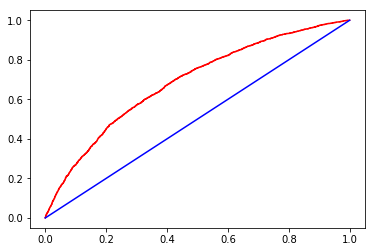

In [63]:
plt.plot(fpr,tpr,color='r')
plt.plot(fpr,fpr,color='b')
plt.show()

In [64]:
roc_auc_score(y_test['share_label'],y_test['prob'])

0.6860931026613301

# Outliers Detection

 timedelta box plot


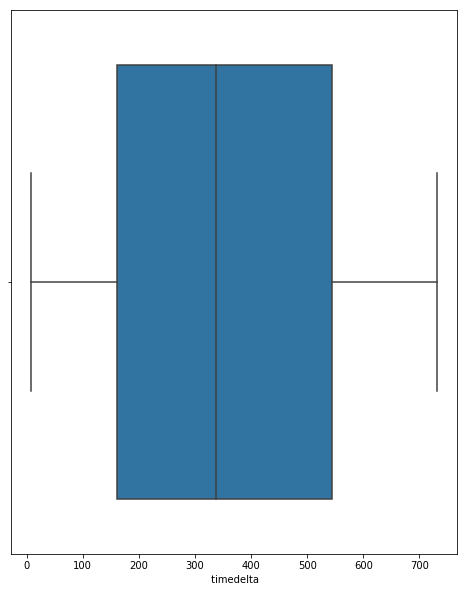

 n_tokens_title box plot


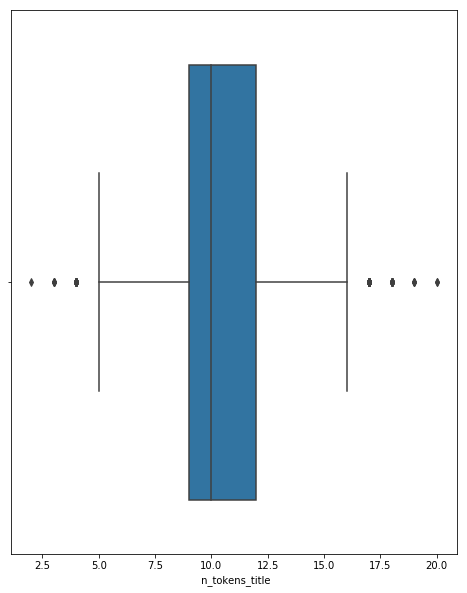

 n_tokens_content box plot


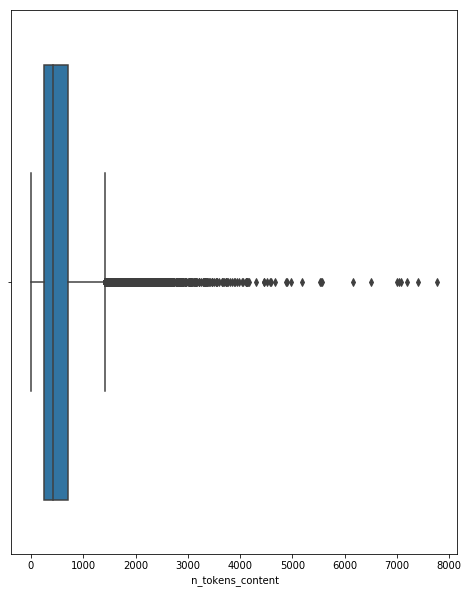

 n_unique_tokens box plot


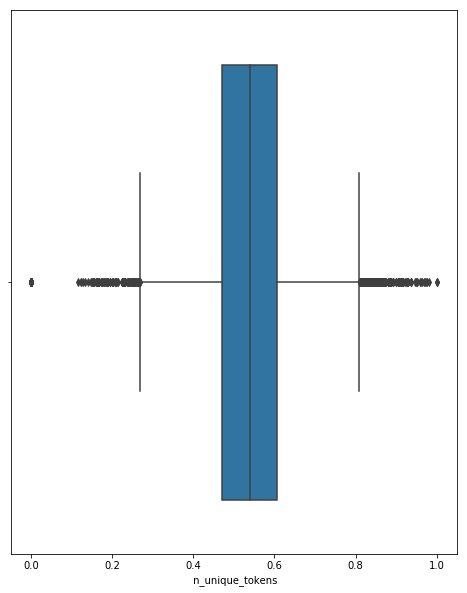

 n_non_stop_words box plot


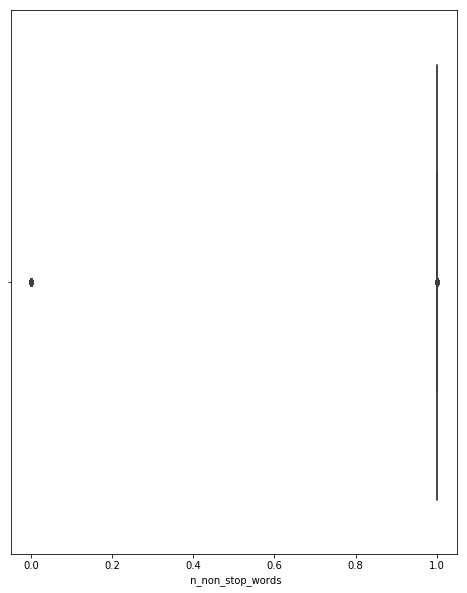

 n_non_stop_unique_tokens box plot


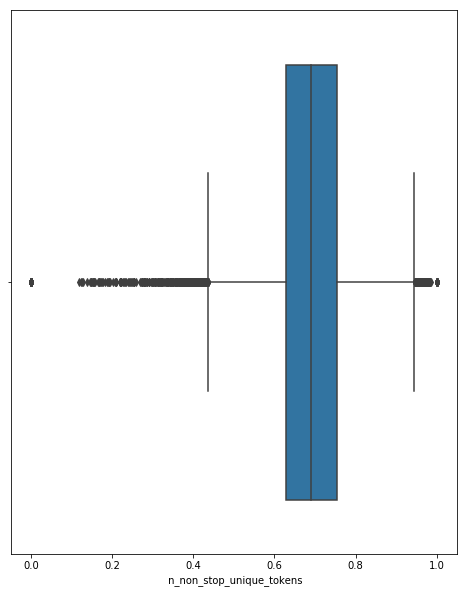

 num_hrefs box plot


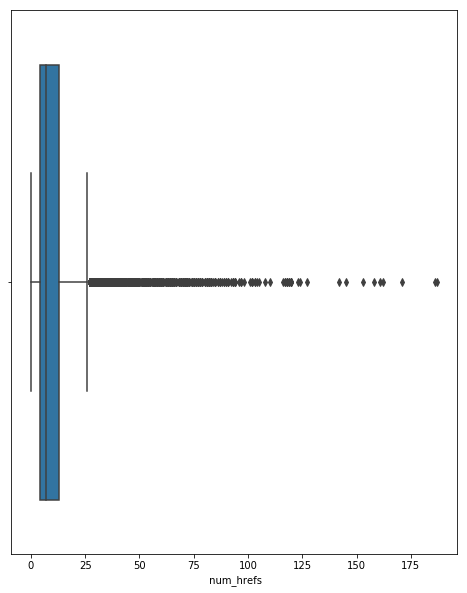

 num_self_hrefs box plot


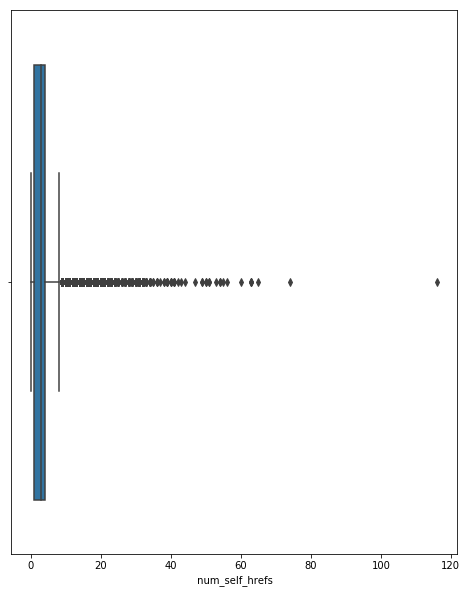

 num_imgs box plot


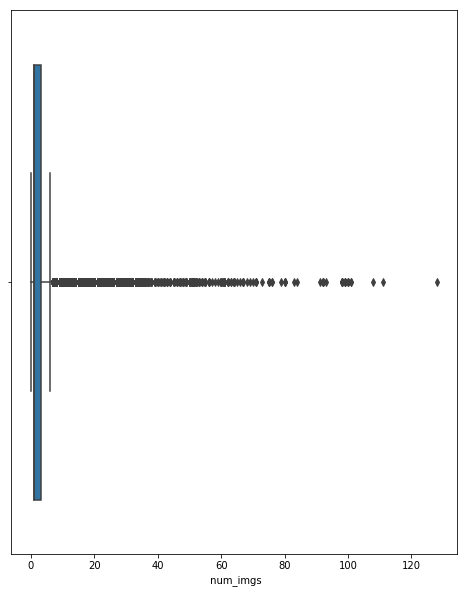

 num_videos box plot


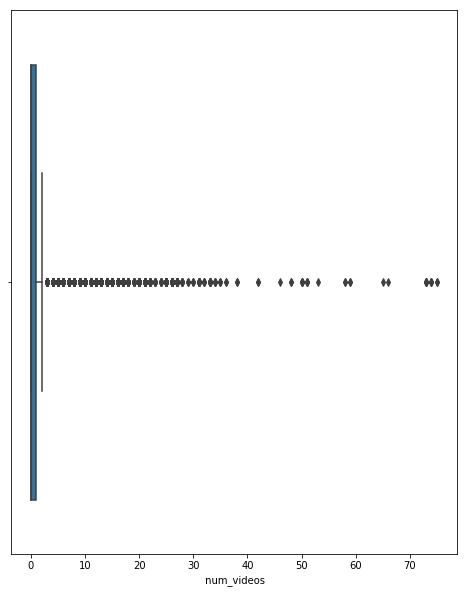

 average_token_length box plot


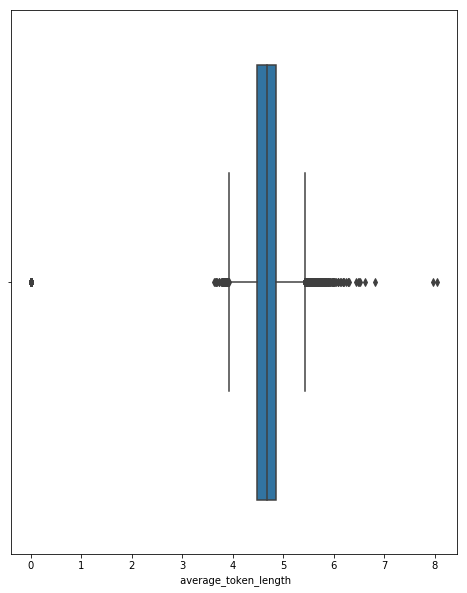

 num_keywords box plot


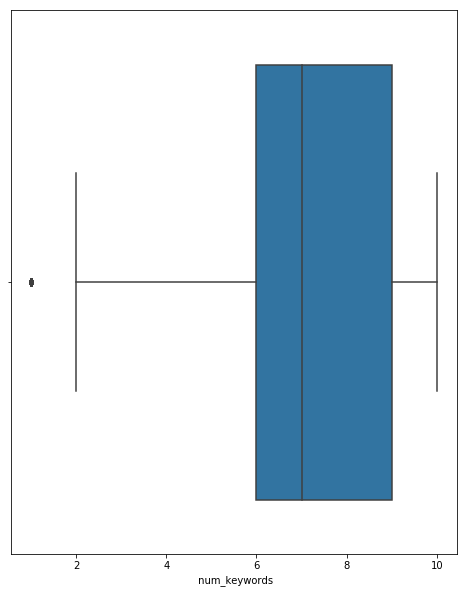

 data_channel_is_lifestyle box plot


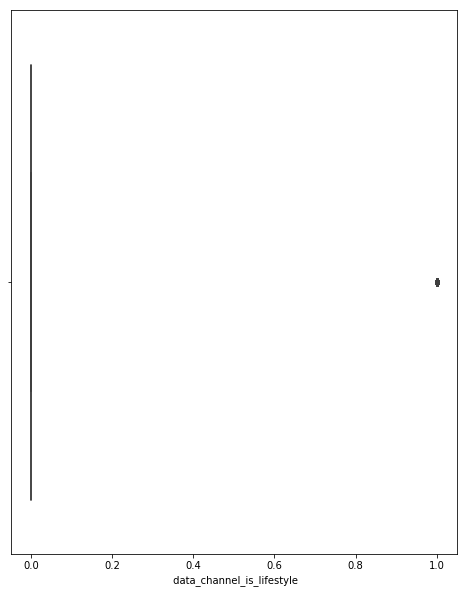

 data_channel_is_entertainment box plot


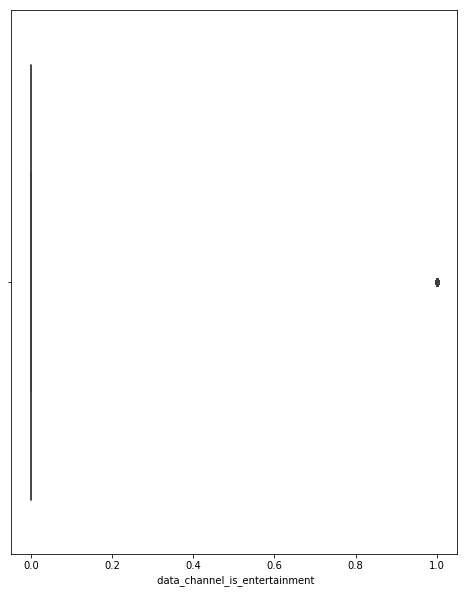

 data_channel_is_bus box plot


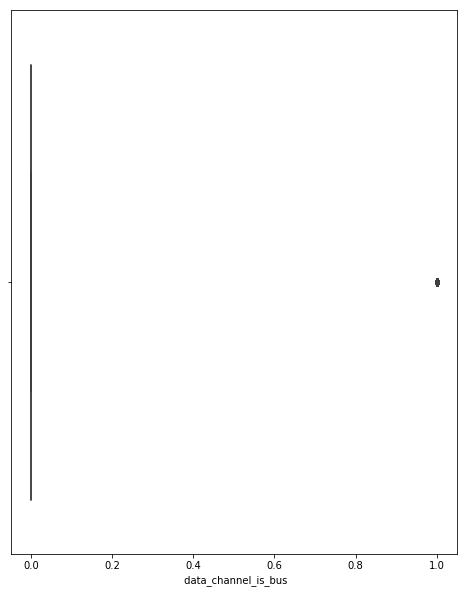

 data_channel_is_socmed box plot


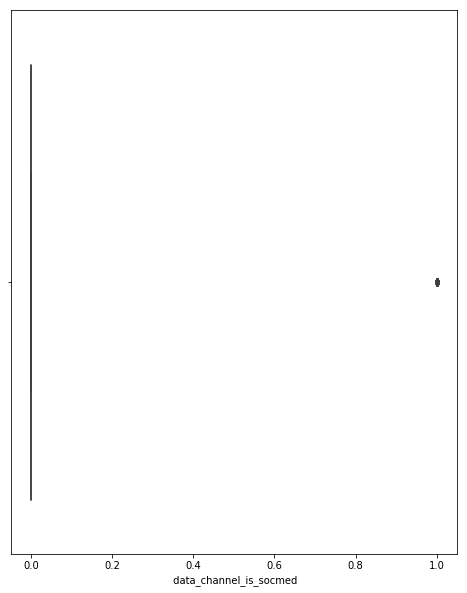

 data_channel_is_tech box plot


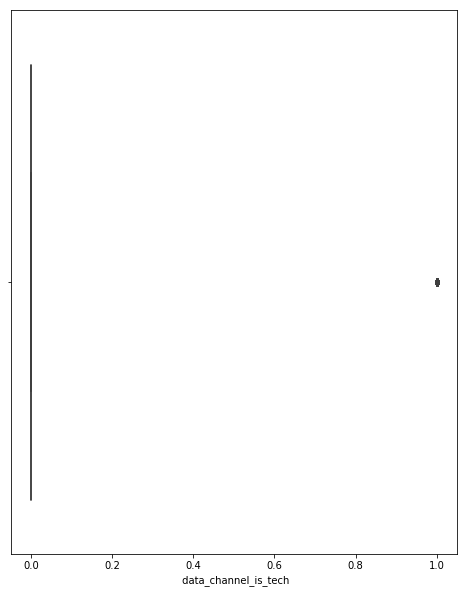

 data_channel_is_world box plot


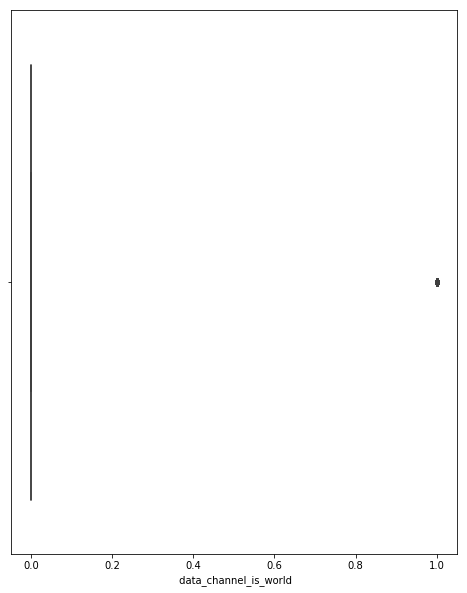

 kw_min_min box plot


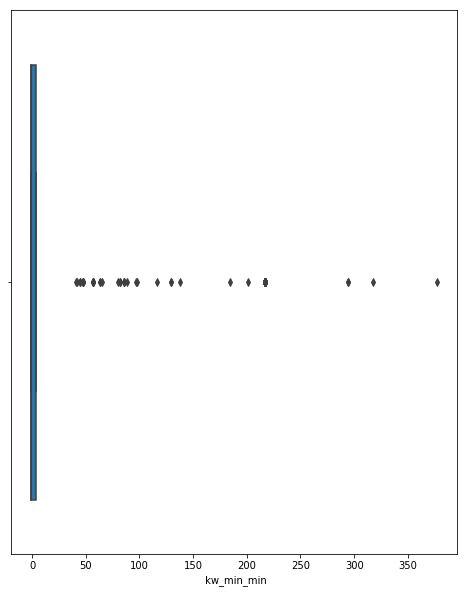

 kw_max_min box plot


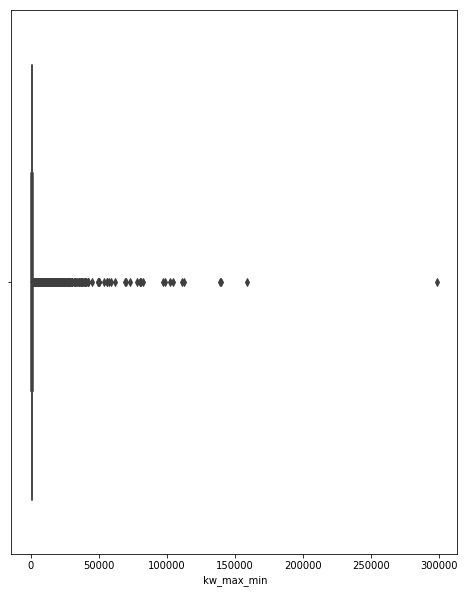

 kw_avg_min box plot


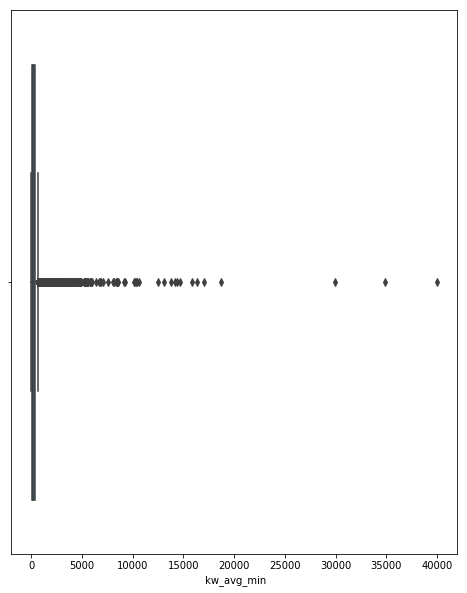

 kw_min_max box plot


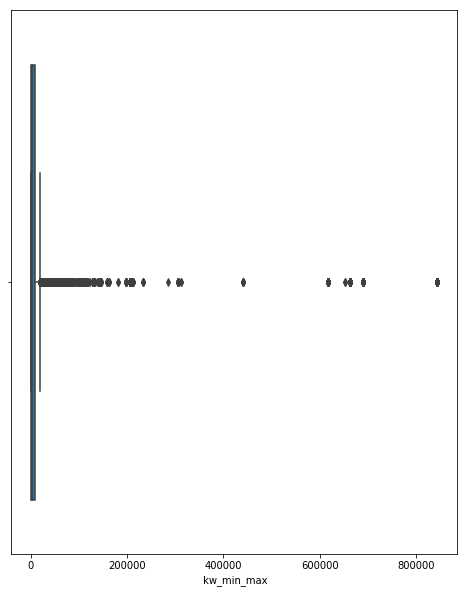

 kw_max_max box plot


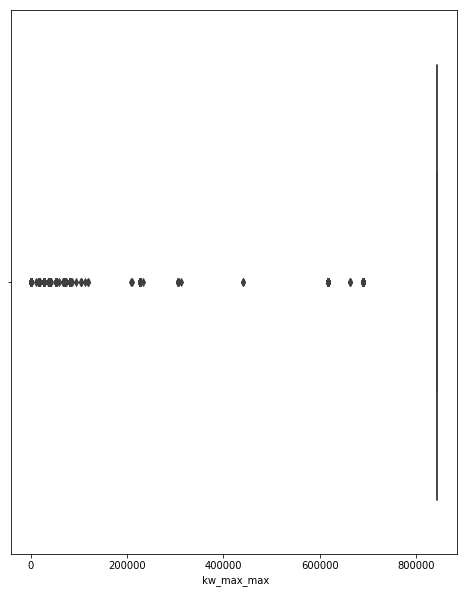

 kw_avg_max box plot


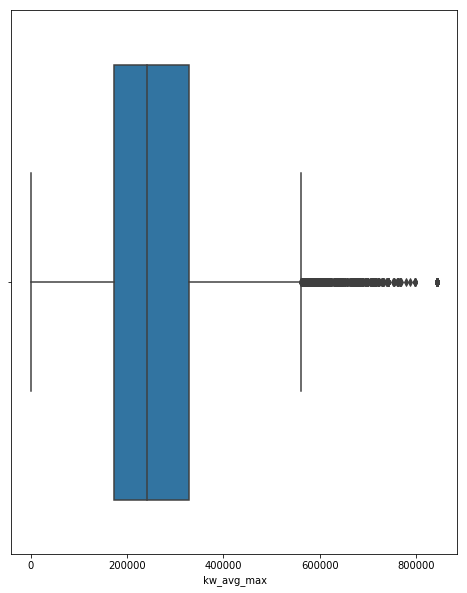

 kw_min_avg box plot


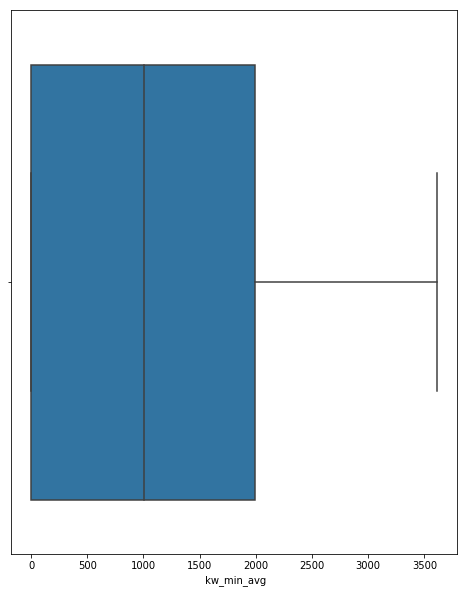

 kw_max_avg box plot


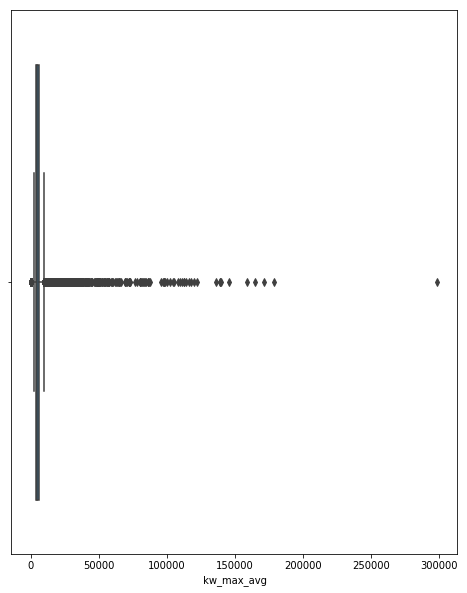

 kw_avg_avg box plot


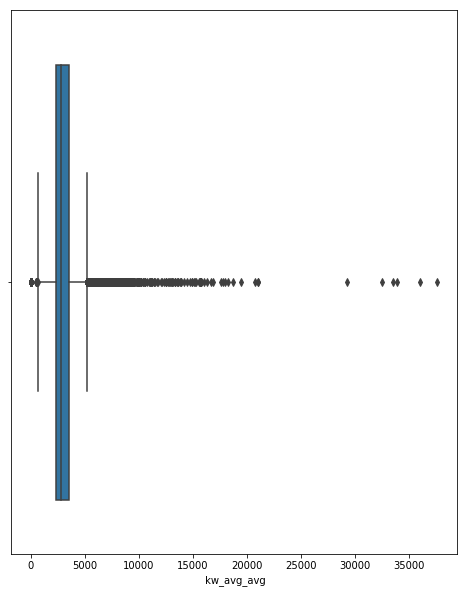

 self_reference_min_shares box plot


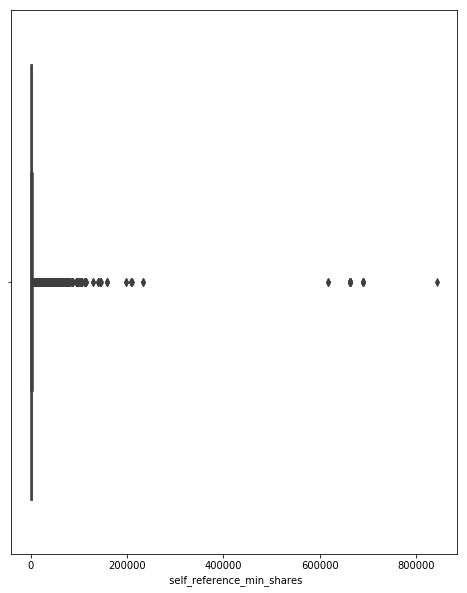

 self_reference_max_shares box plot


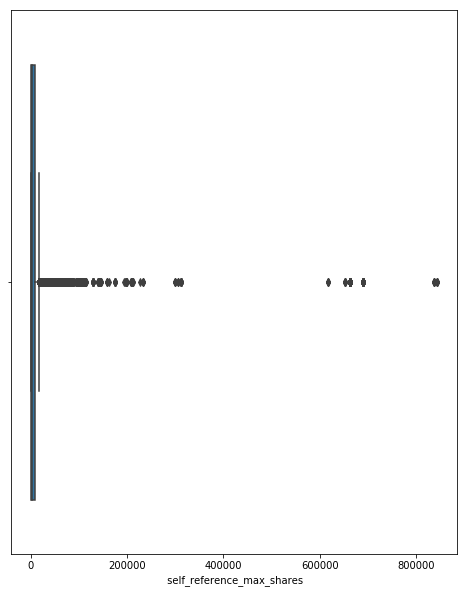

 self_reference_avg_sharess box plot


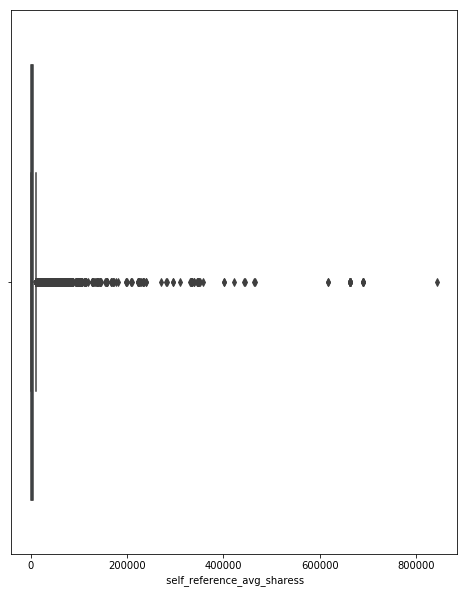

 weekday_is_monday box plot


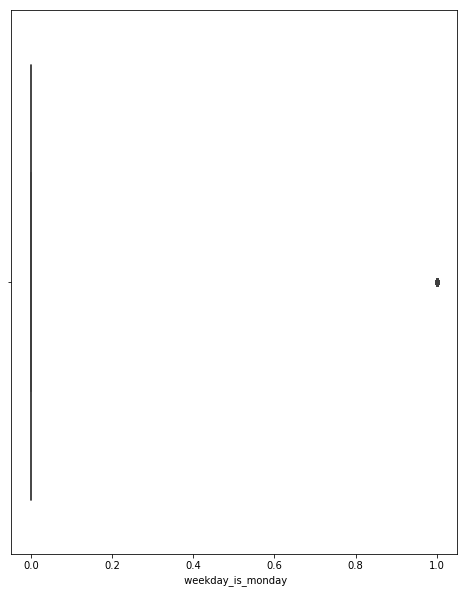

 weekday_is_tuesday box plot


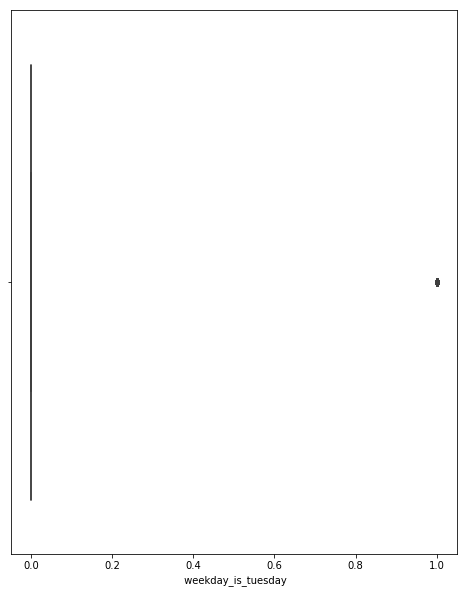

 weekday_is_wednesday box plot


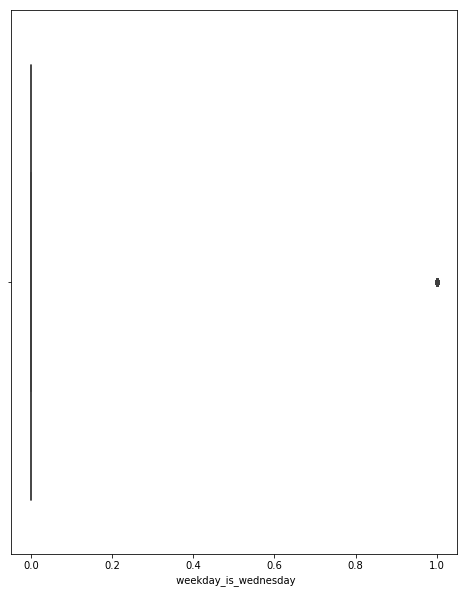

 weekday_is_thursday box plot


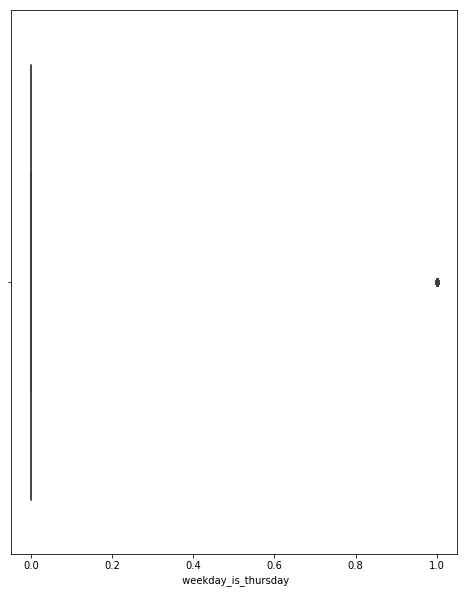

 weekday_is_friday box plot


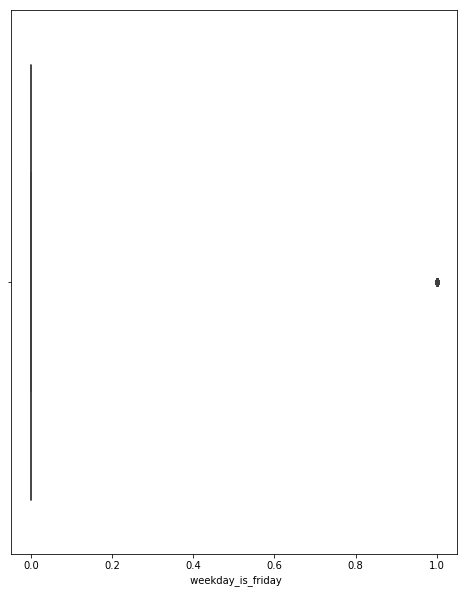

 weekday_is_saturday box plot


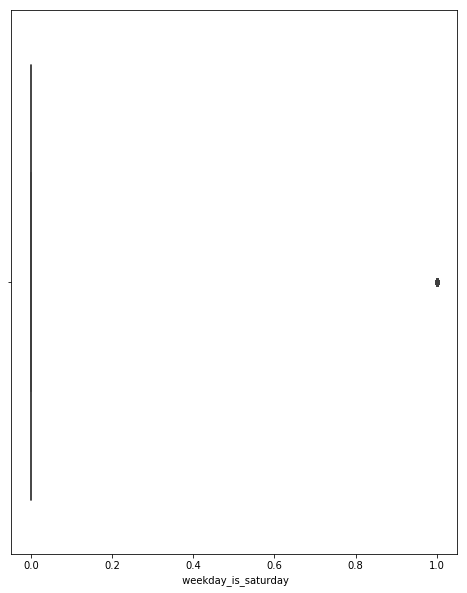

 weekday_is_sunday box plot


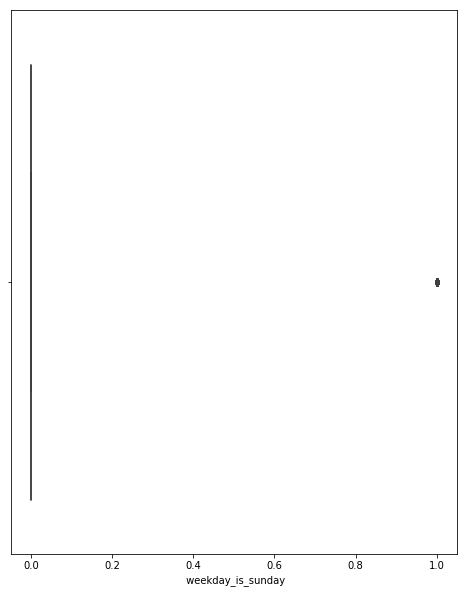

 is_weekend box plot


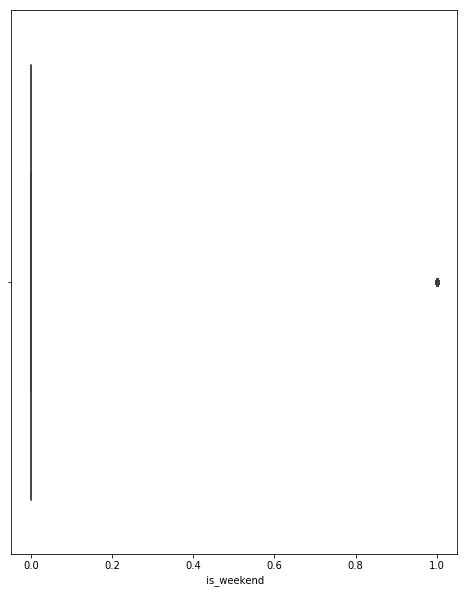

 LDA_00 box plot


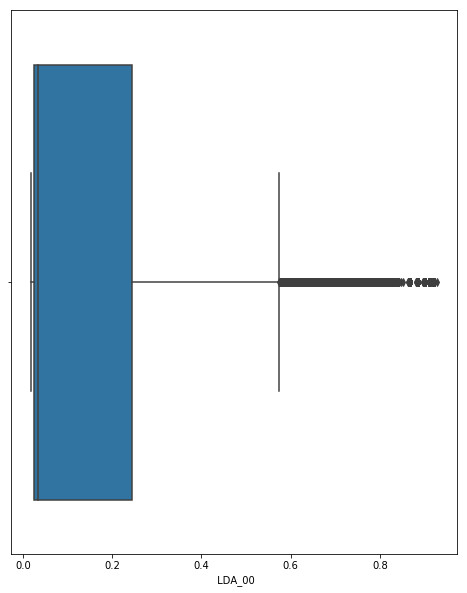

 LDA_01 box plot


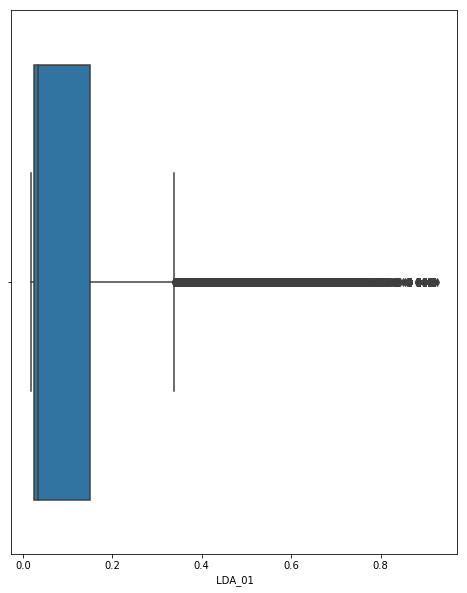

 LDA_02 box plot


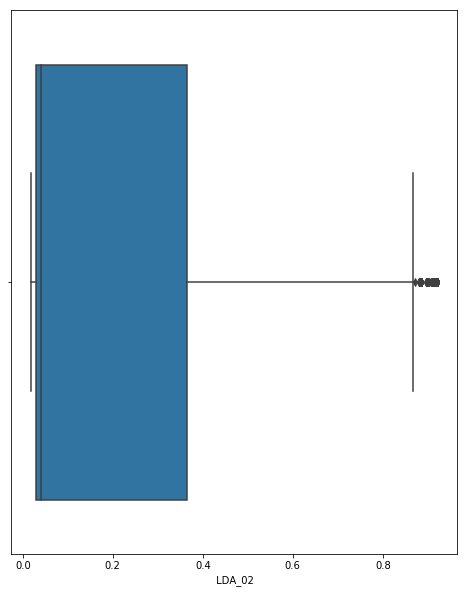

 LDA_03 box plot


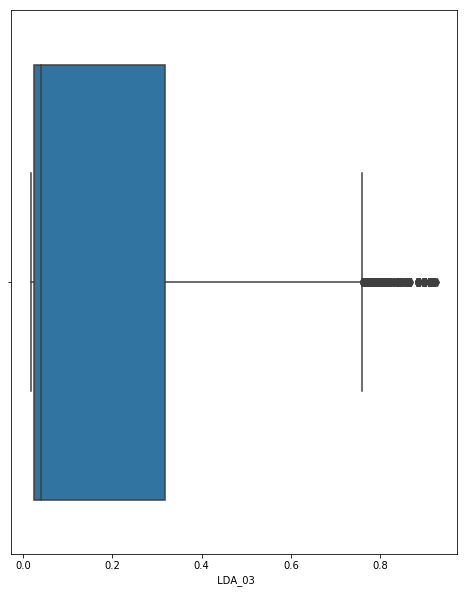

 LDA_04 box plot


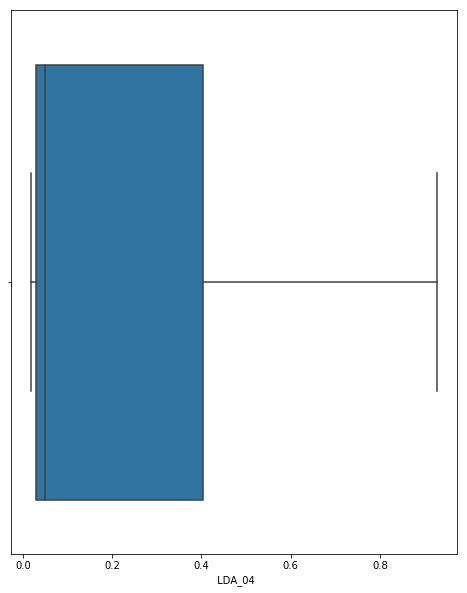

 global_subjectivity box plot


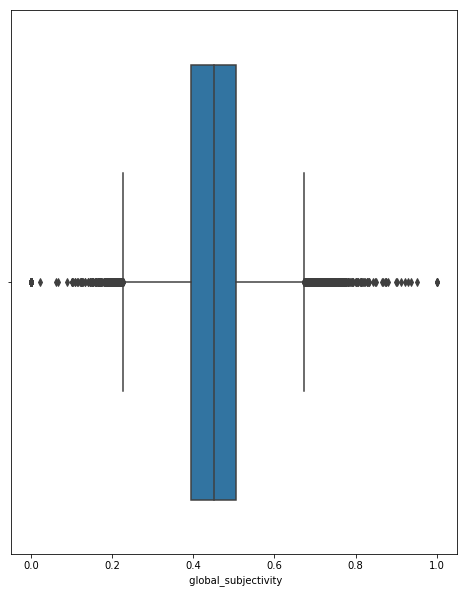

 global_sentiment_polarity box plot


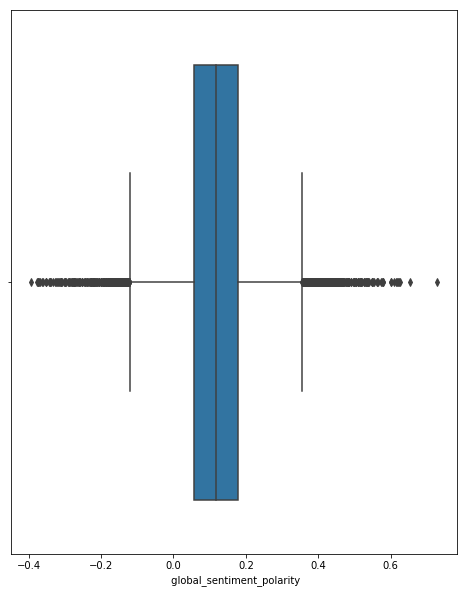

 global_rate_positive_words box plot


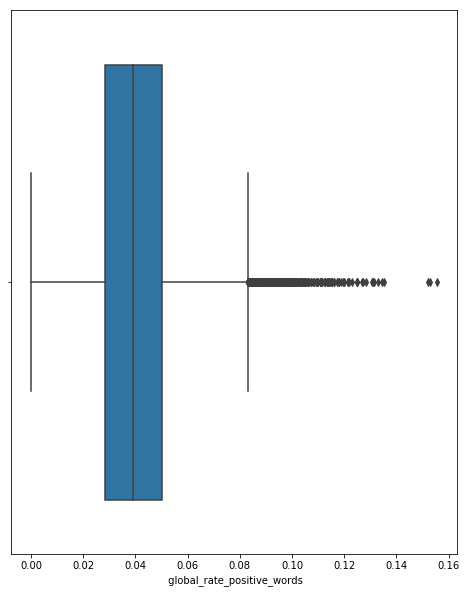

 global_rate_negative_words box plot


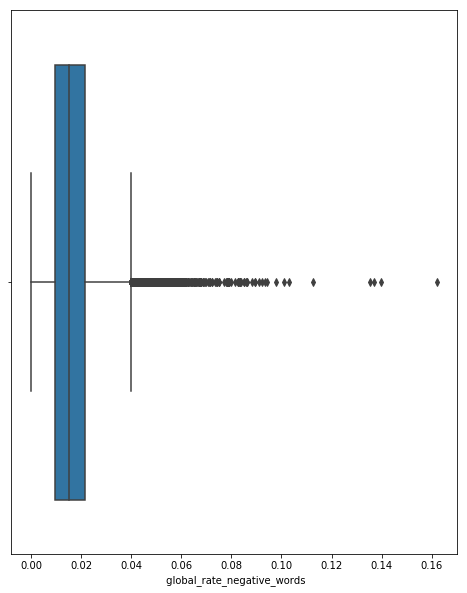

 rate_positive_words box plot


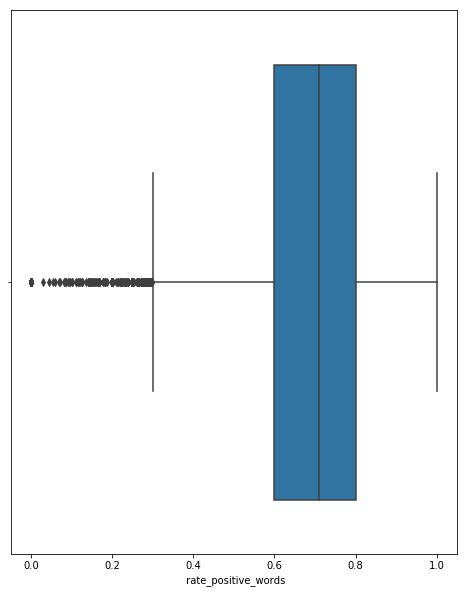

 rate_negative_words box plot


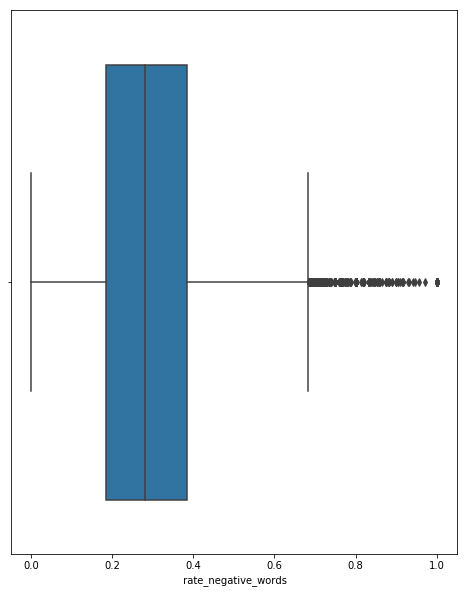

 avg_positive_polarity box plot


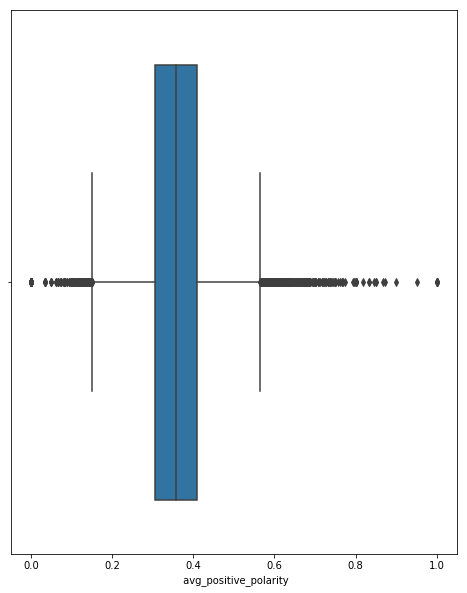

 min_positive_polarity box plot


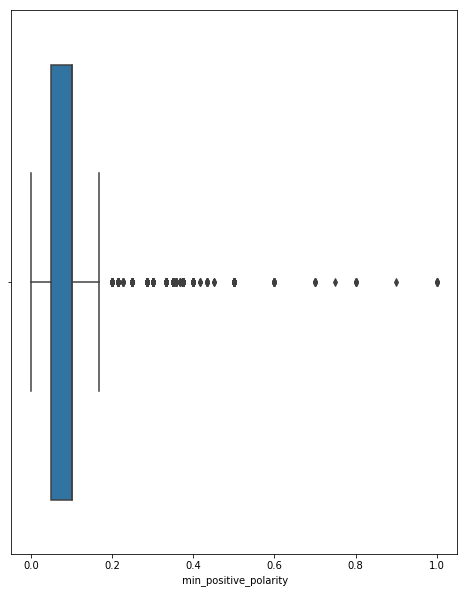

 max_positive_polarity box plot


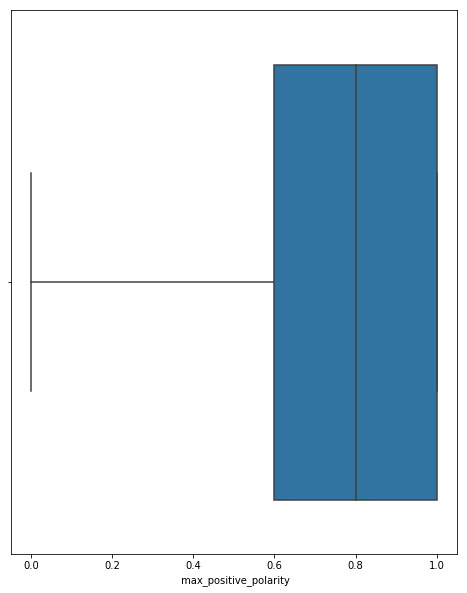

 avg_negative_polarity box plot


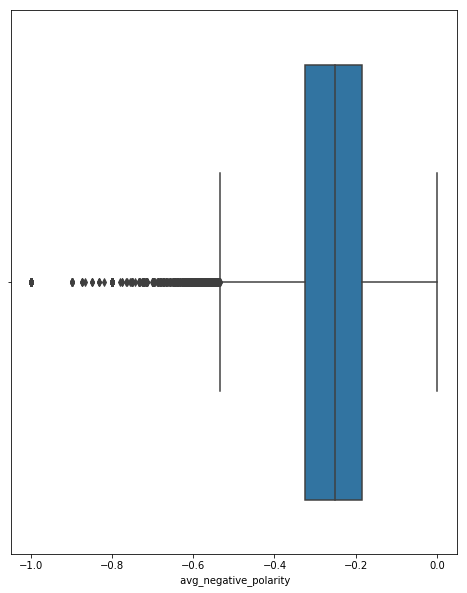

 min_negative_polarity box plot


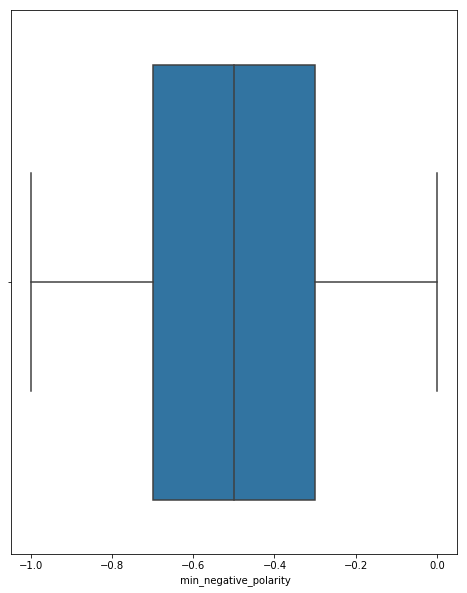

 max_negative_polarity box plot


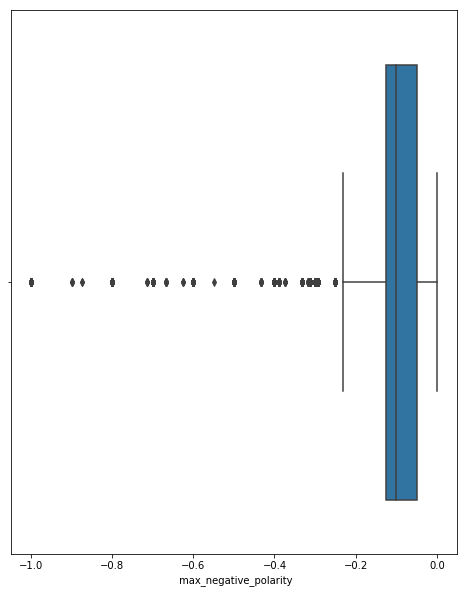

 title_subjectivity box plot


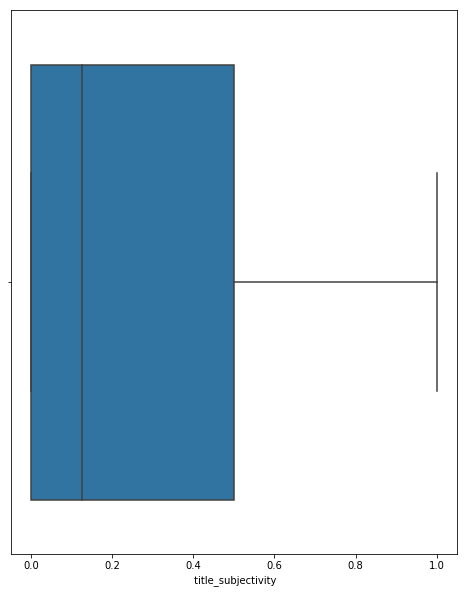

 title_sentiment_polarity box plot


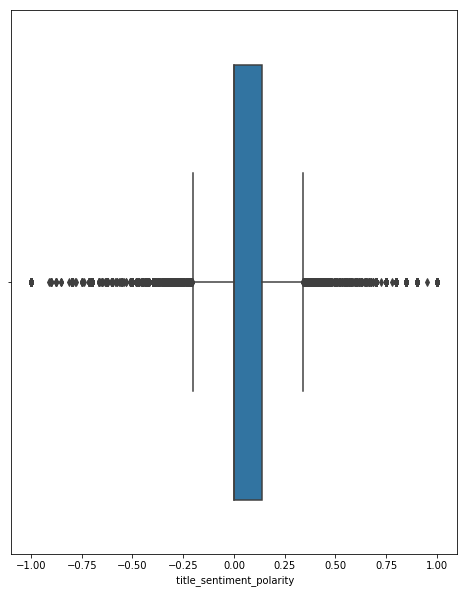

 abs_title_subjectivity box plot


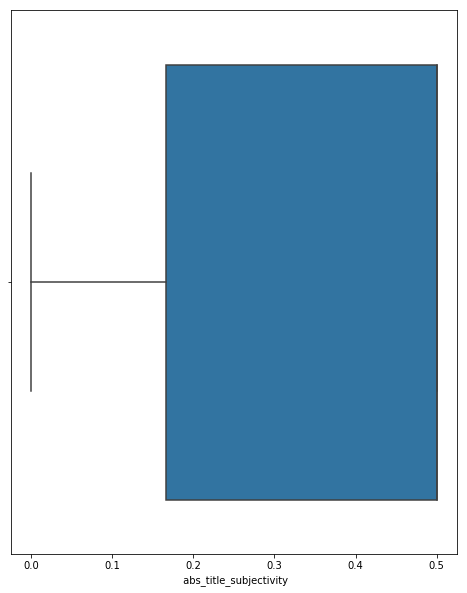

 abs_title_sentiment_polarity box plot


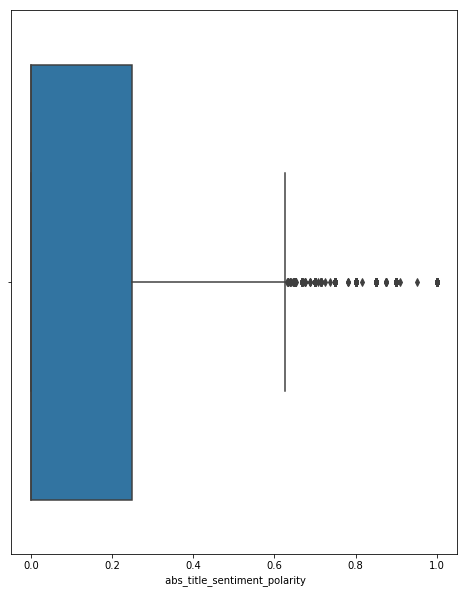

share_label box plot


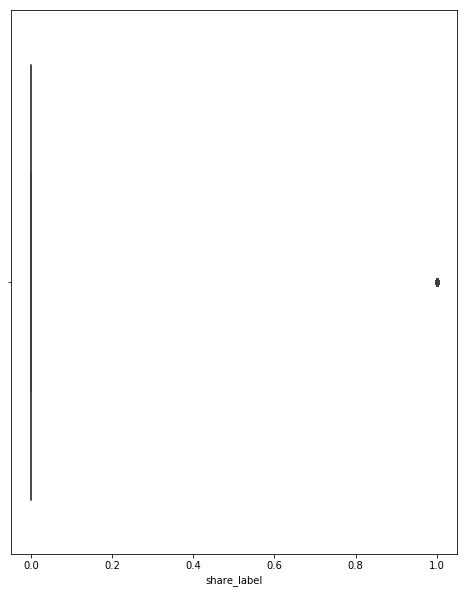

In [108]:
for i in X.columns:
    sns.boxplot(on[i])
    print(i,'box plot')
    plt.show()

In [109]:
for i in X.columns:
    q1 = on[i].quantile(0.25)
    q3 = on[i].quantile(0.75)
    iqr = q3 - q1
    lb = q1-(1.5*iqr)
    ub = q3+(1.5*iqr)
    print("for column:"+ i,"lower bound",on[on[i]<lb].shape[0],"upper bound:",on[on[i]>ub].shape[0])

for column: timedelta lower bound 0 upper bound: 0
for column: n_tokens_title lower bound 31 upper bound: 100
for column: n_tokens_content lower bound 0 upper bound: 1698
for column: n_unique_tokens lower bound 1085 upper bound: 299
for column: n_non_stop_words lower bound 2480 upper bound: 0
for column: n_non_stop_unique_tokens lower bound 1338 upper bound: 139
for column: num_hrefs lower bound 0 upper bound: 2359
for column: num_self_hrefs lower bound 0 upper bound: 1832
for column: num_imgs lower bound 0 upper bound: 7153
for column: num_videos lower bound 0 upper bound: 2495
for column: average_token_length lower bound 1016 upper bound: 363
for column: num_keywords lower bound 48 upper bound: 0
for column: data_channel_is_lifestyle lower bound 0 upper bound: 1798
for column: data_channel_is_entertainment lower bound 0 upper bound: 6347
for column: data_channel_is_bus lower bound 0 upper bound: 5749
for column: data_channel_is_socmed lower bound 0 upper bound: 1989
for column: data_

# Correlation

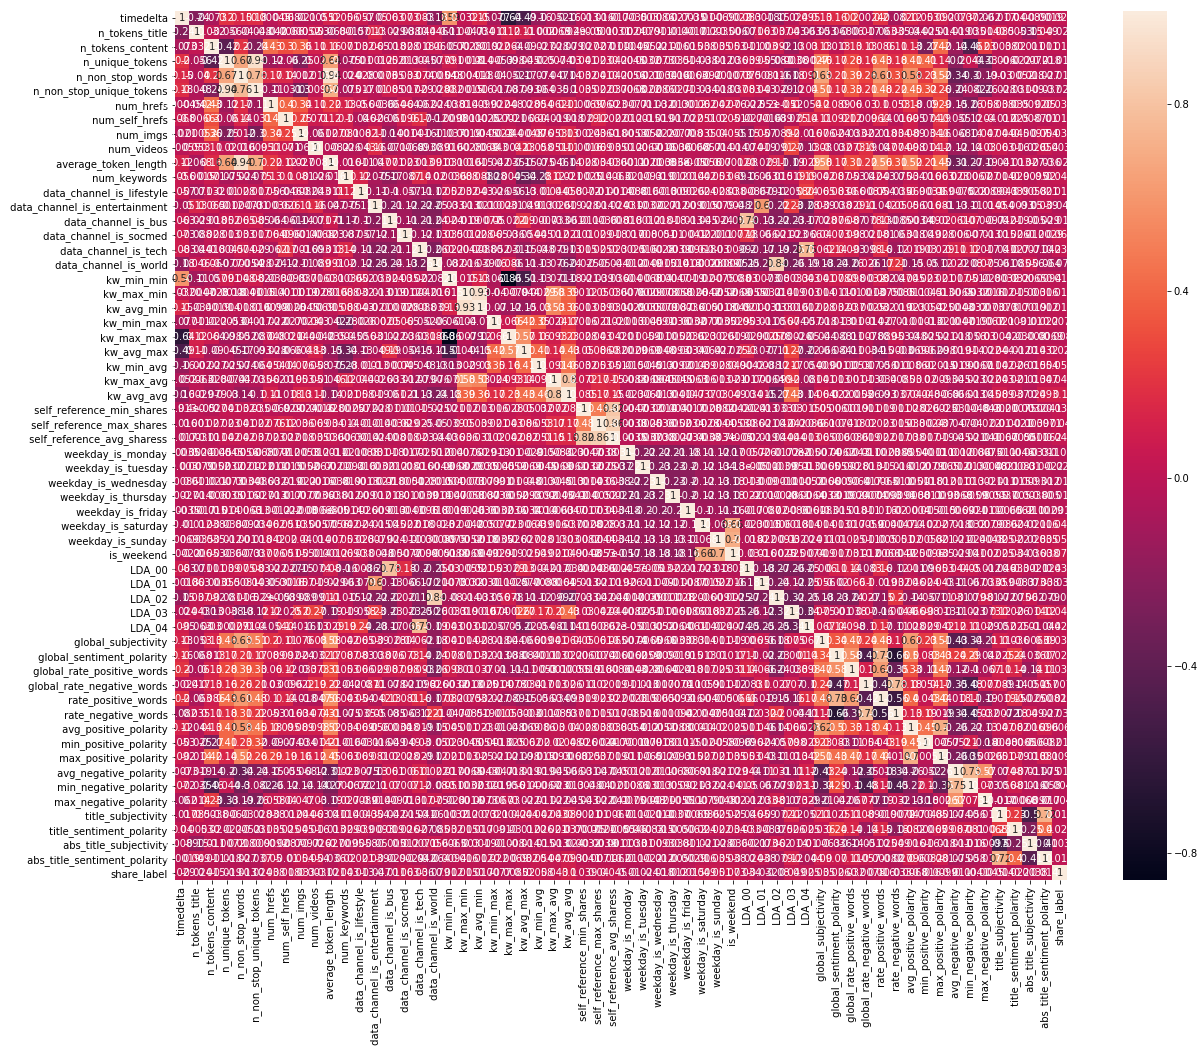

In [112]:
fig, ax = plt.subplots(figsize=(20,16))
sns.heatmap(X.corr(),annot=True,ax=ax)

In [113]:
X.corr()

timedelta   n_tokens_title  \
 timedelta                        1.000000        -0.236009   
 n_tokens_title                  -0.236009         1.000000   
 n_tokens_content                -0.072766         0.031569   
 n_unique_tokens                  0.197873        -0.056043   
 n_non_stop_words                 0.146491        -0.039880   
 n_non_stop_unique_tokens         0.178275        -0.048125   
 num_hrefs                        0.000453        -0.042072   
 num_self_hrefs                   0.068202        -0.006600   
 num_imgs                        -0.020545         0.000518   
 num_videos                      -0.005542         0.052735   
 average_token_length             0.119298        -0.067791   
 num_keywords                     0.055981        -0.001522   
 data_channel_is_lifestyle        0.056793        -0.070580   
 data_channel_is_entertainment   -0.049532         0.134636   
 data_channel_is_bus              0.062511        -0.028555   
 data_channel_is_socmed           0.073001        -0.087748   
 data_channel_is_tech             0.083177        -0.043981   
 data_channel_is_world           -0.177018         0.046495   
 kw_min_min                       0.591730        -0.106241   
 kw_max_min                       0.032445        -0.004728   
 kw_avg_min                       0.147561        -0.034009   
 kw_min_max                      -0.077000         0.010580   
 kw_max_max                      -0.639926         0.118497   
 kw_avg_max                      -0.494588         0.105280   
 kw_min_avg                      -0.157242        -0.002050   
 kw_max_avg                      -0.051891         0.006275   
 kw_avg_avg                      -0.164070         0.002881   
 self_reference_min_shares       -0.013325         0.000094   
 self_reference_max_shares       -0.015609         0.001031   
 self_reference_avg_sharess      -0.016554         0.003141   
 weekday_is_monday               -0.003507         0.002381   
 weekday_is_tuesday              -0.002979         0.007871   
 weekday_is_wednesday             0.008601         0.010620   
 weekday_is_thursday              0.002737        -0.014178   
 weekday_is_friday               -0.003494        -0.001738   
 weekday_is_saturday             -0.010298        -0.012109   
 weekday_is_sunday                0.006894         0.003533   
 is_weekend                      -0.002197        -0.006010   
 LDA_00                           0.082791        -0.071198   
 LDA_01                           0.001828         0.063344   
 LDA_02                          -0.149286         0.036622   
 LDA_03                          -0.023506         0.043058   
 LDA_04                           0.095239        -0.062603   
 global_subjectivity              0.126758        -0.053311   
 global_sentiment_polarity        0.161222        -0.067982   
 global_rate_positive_words       0.204953        -0.059892   
 global_rate_negative_words       0.002385         0.016734   
 rate_positive_words              0.196035        -0.063214   
 rate_negative_words             -0.082289         0.035342   
 avg_positive_polarity            0.121212        -0.043933   
 min_positive_polarity            0.053334        -0.025126   
 max_positive_polarity            0.091992        -0.013712   
 avg_negative_polarity            0.007344        -0.018506   
 min_negative_polarity            0.072338        -0.034713   
 max_negative_polarity           -0.061903         0.014306   
 title_subjectivity              -0.017477         0.084982   
 title_sentiment_polarity         0.039982         0.005281   
 abs_title_subjectivity           0.008859        -0.149260   
 abs_title_sentiment_polarity    -0.001853         0.048752   
share_label                       0.028740        -0.023855   

                                 n_tokens_content   n_unique_tokens  \
 timedelta                              -0.072766          0.197873   
 n_tokens_title                          0.0315

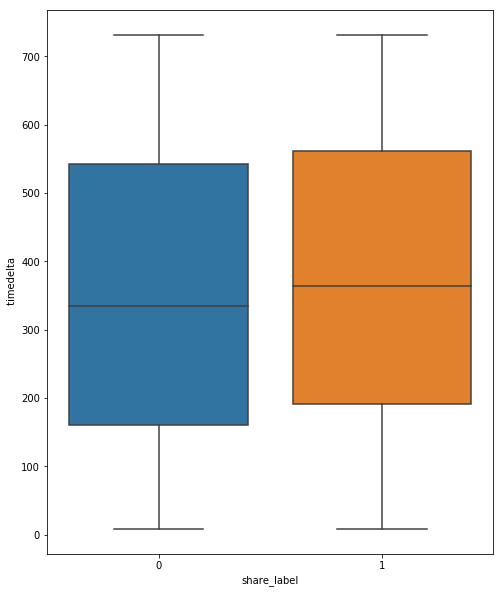

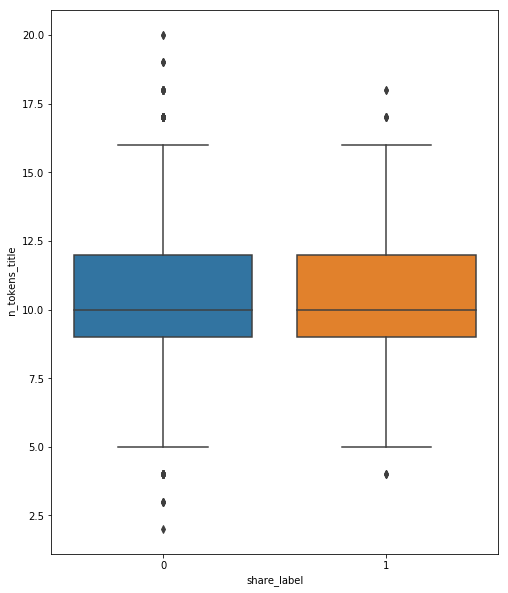

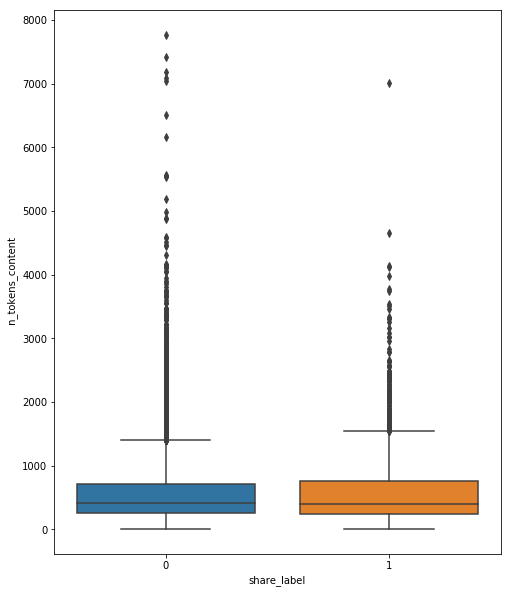

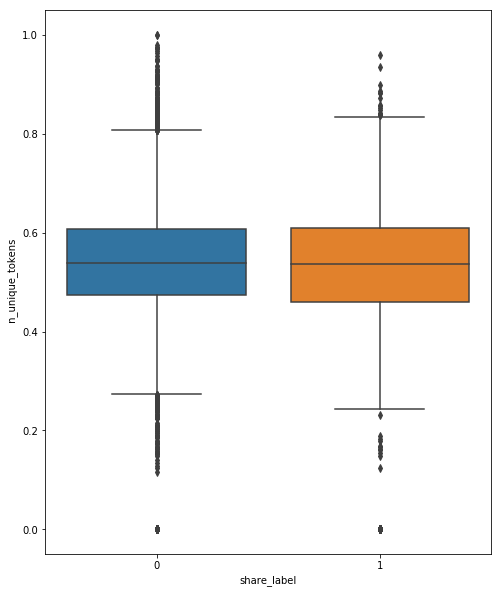

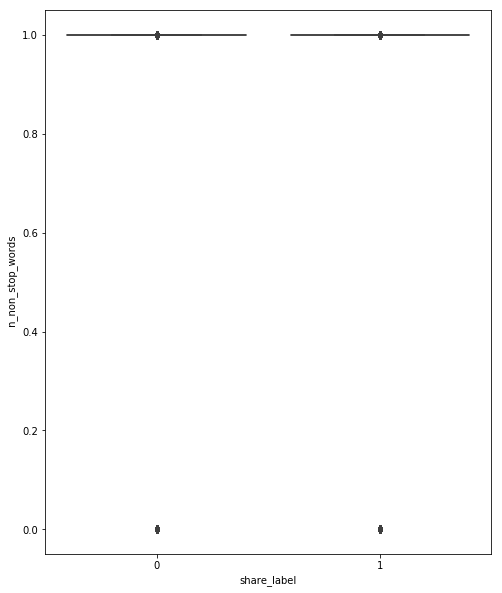

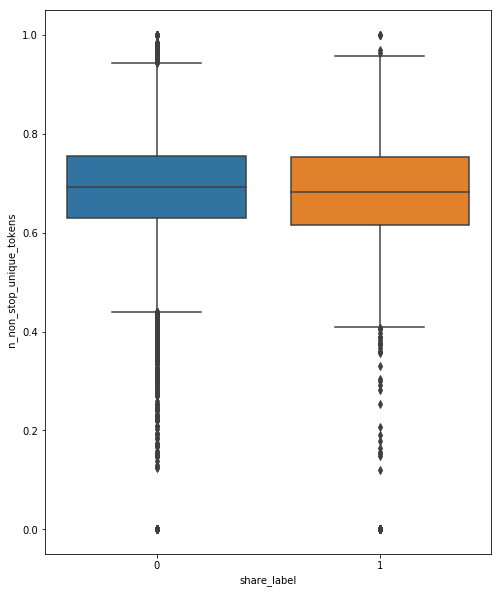

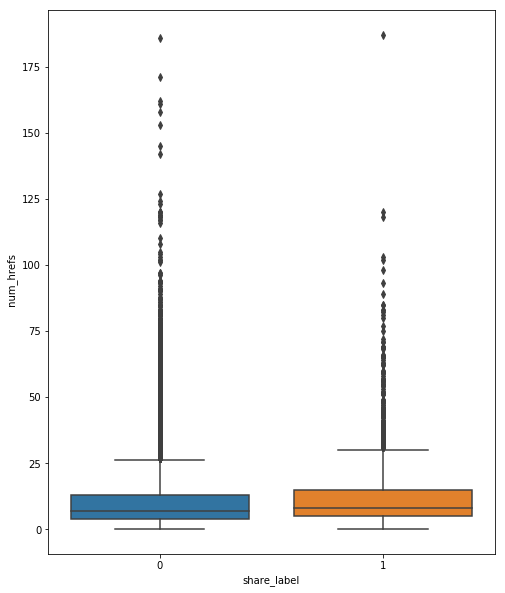

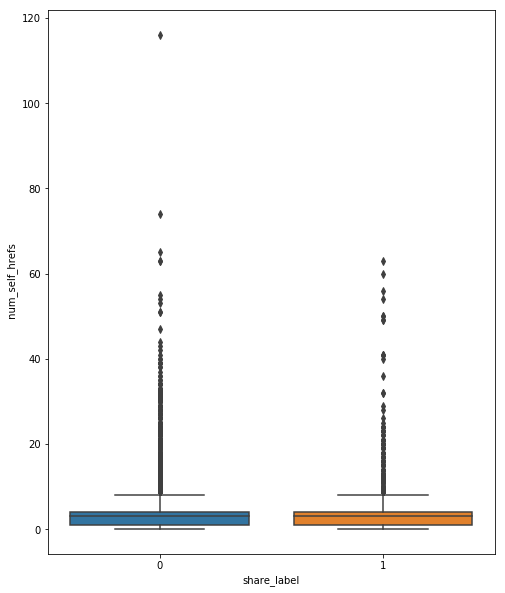

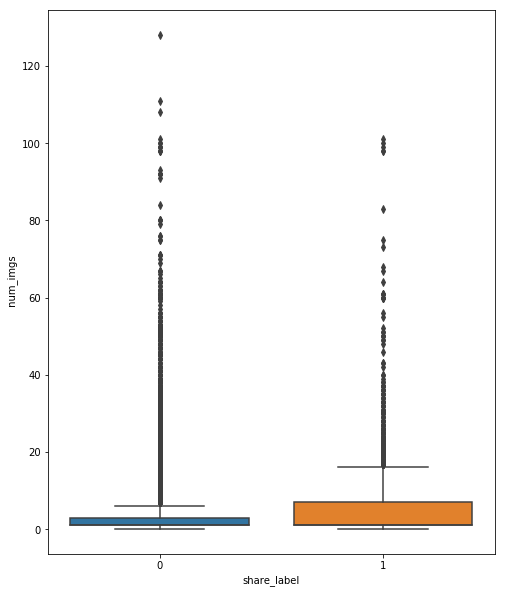

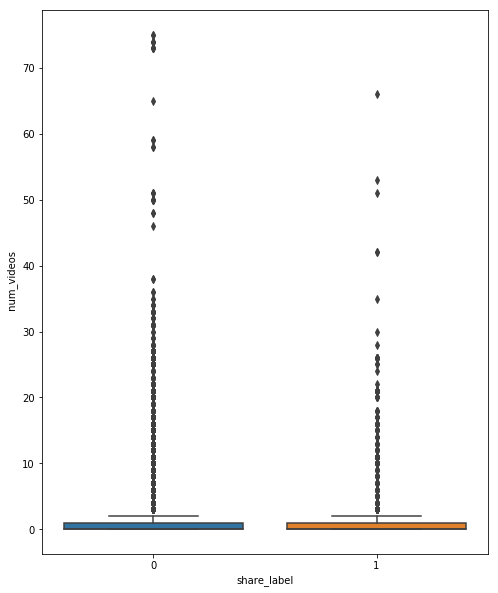

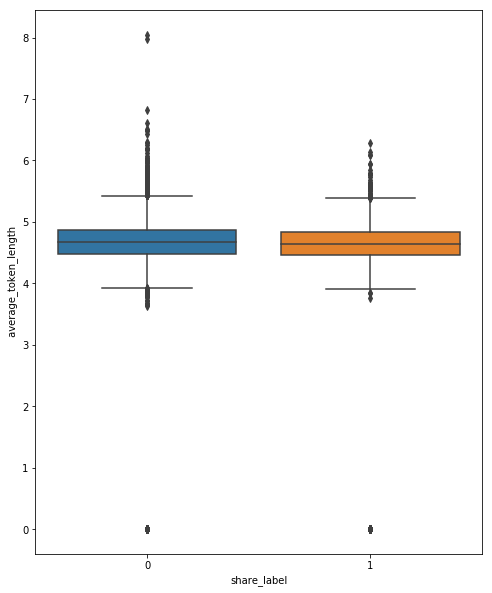

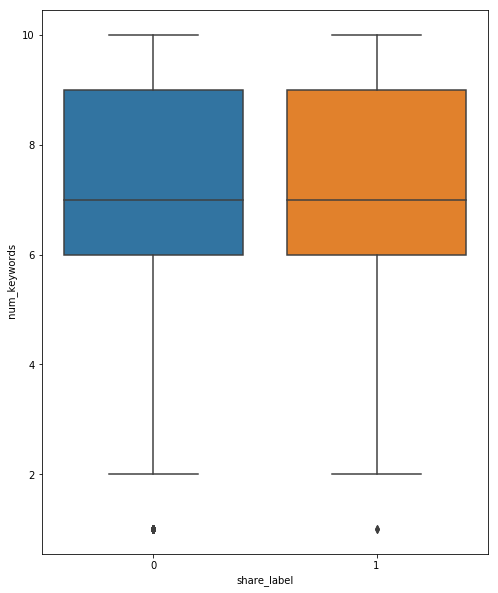

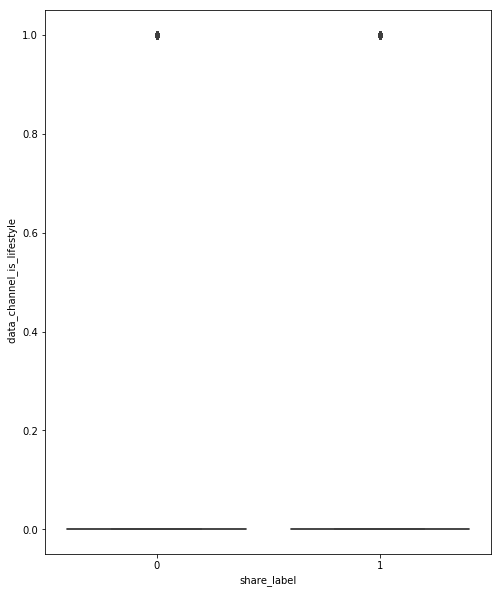

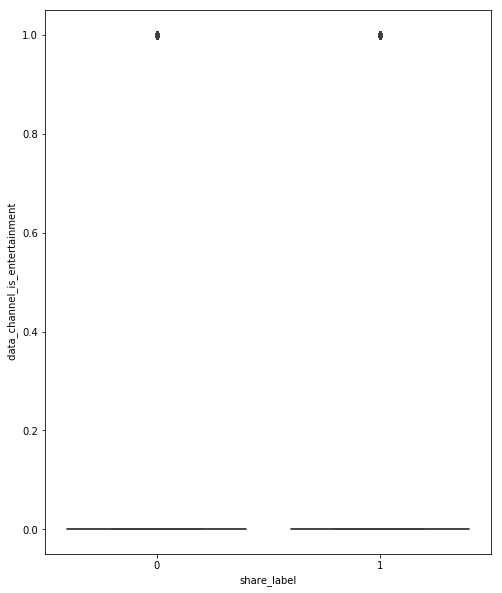

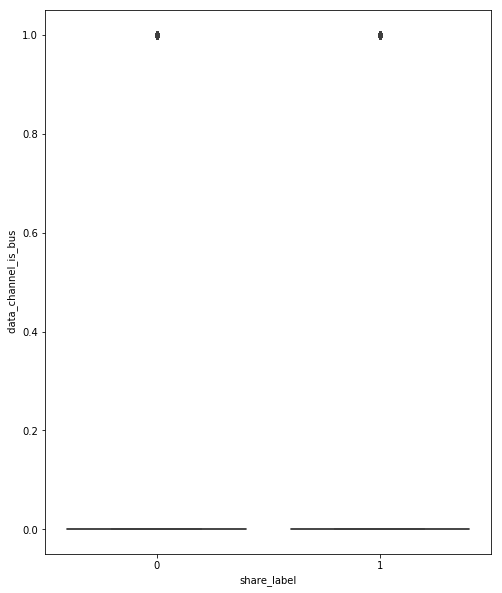

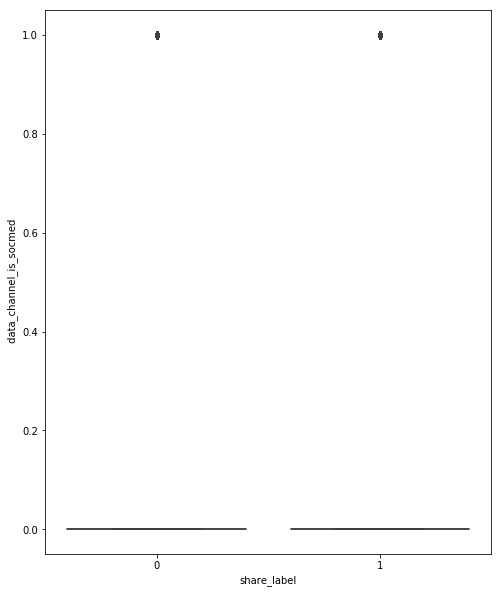

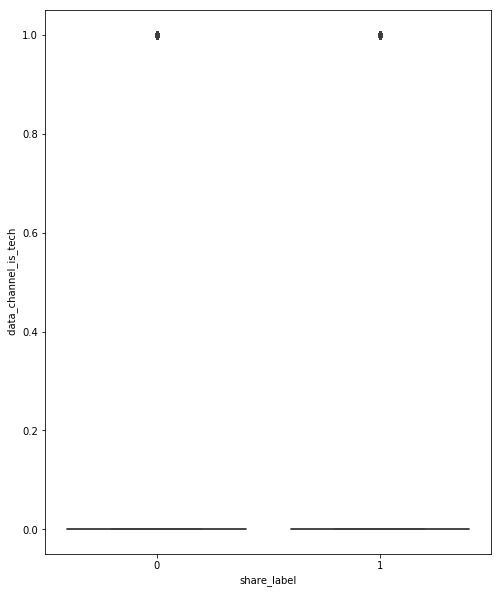

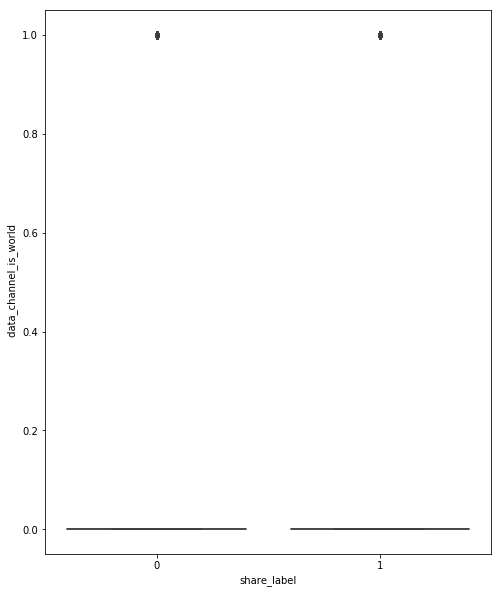

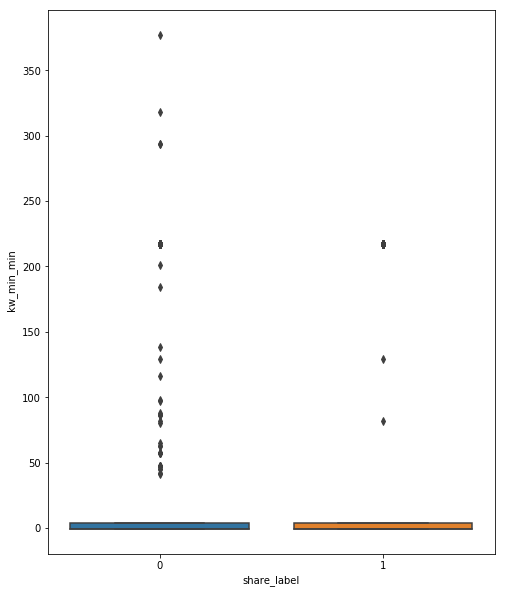

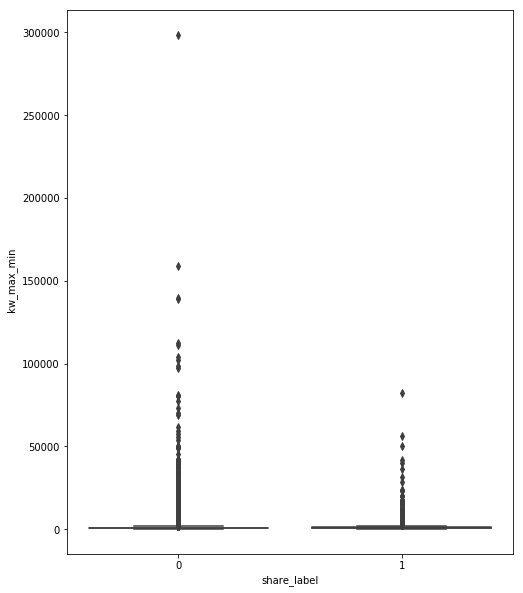

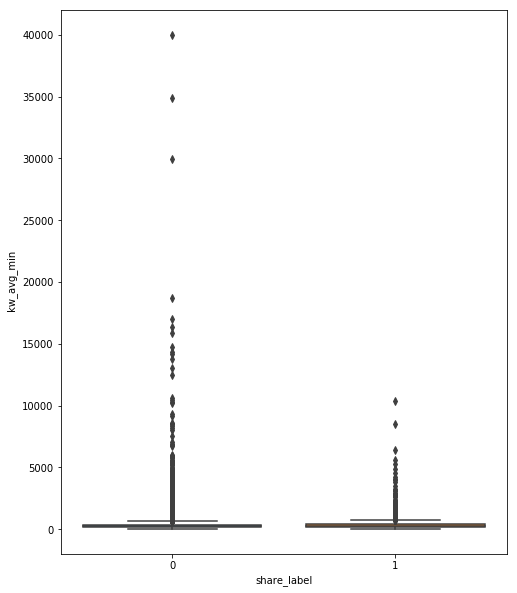

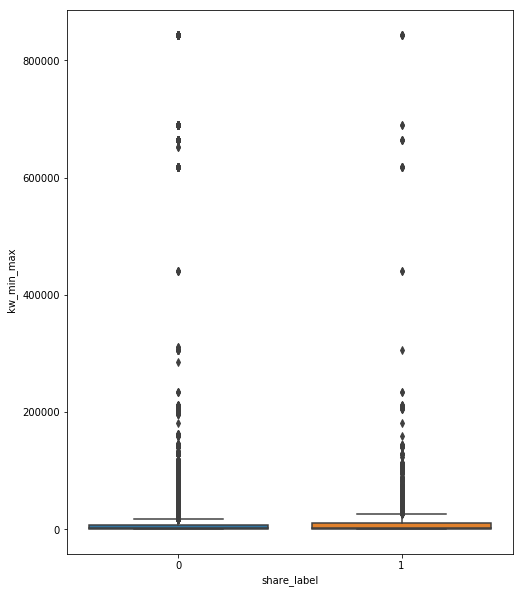

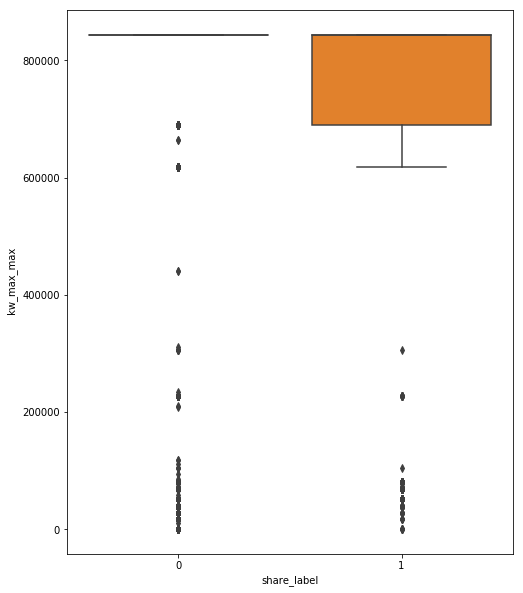

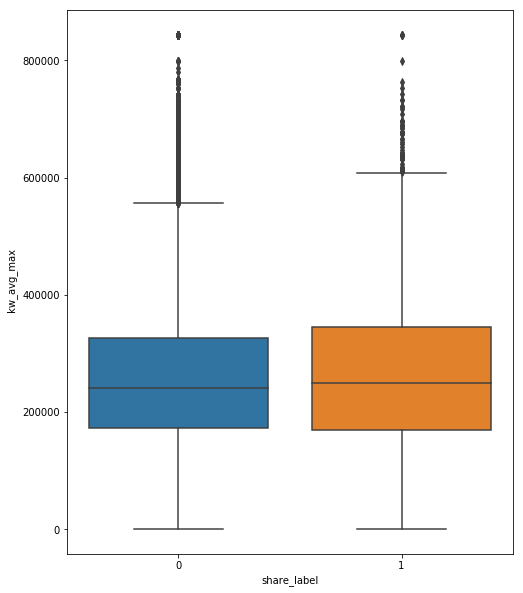

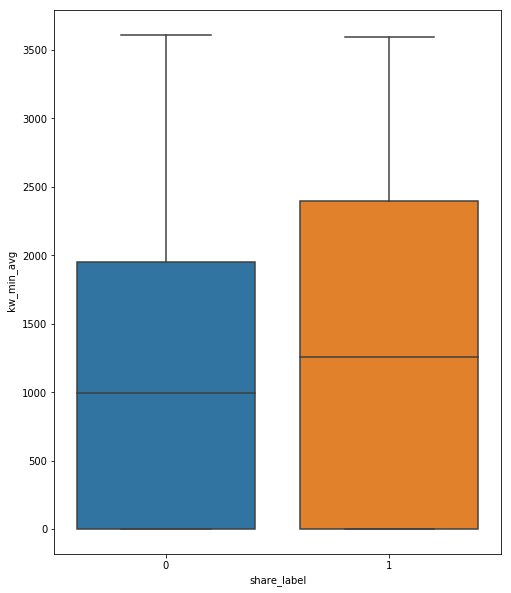

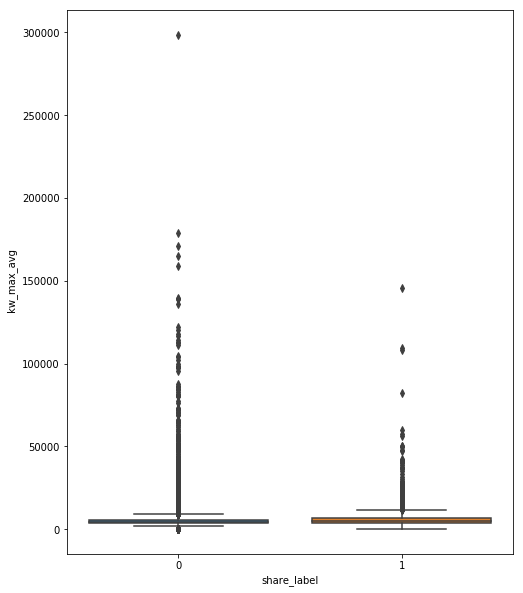

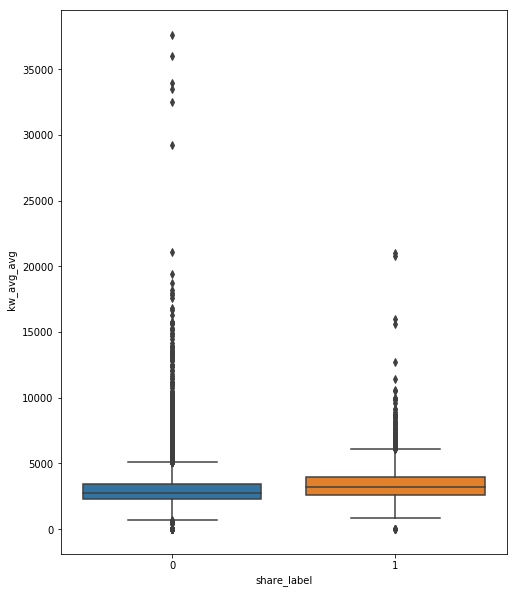

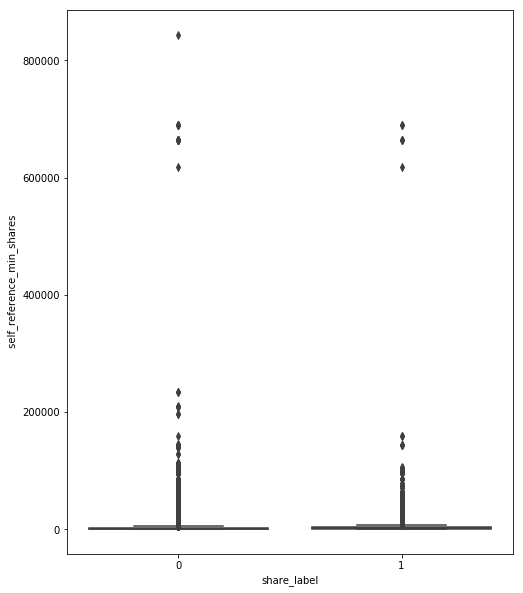

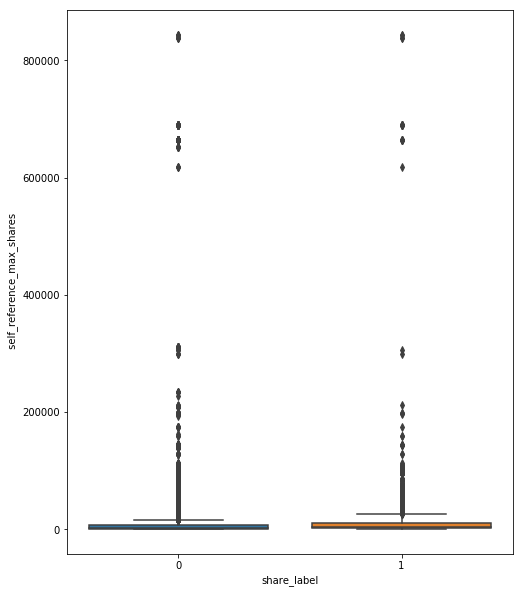

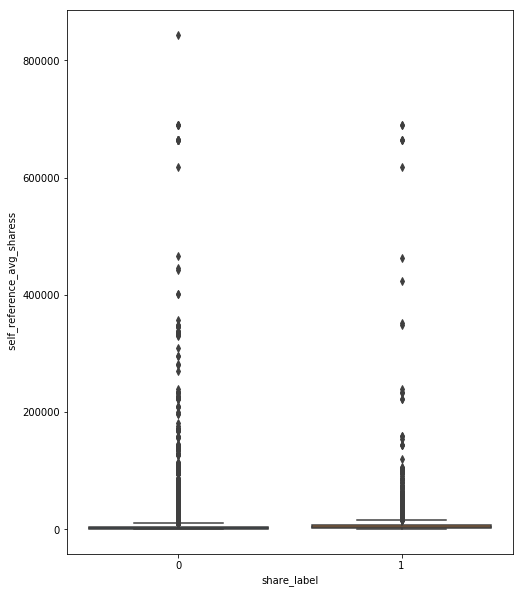

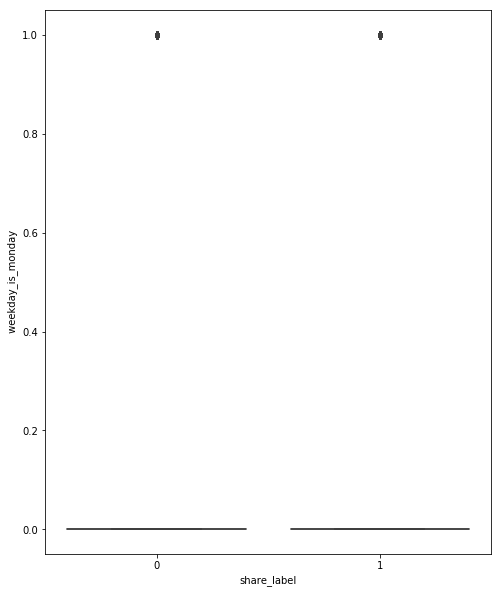

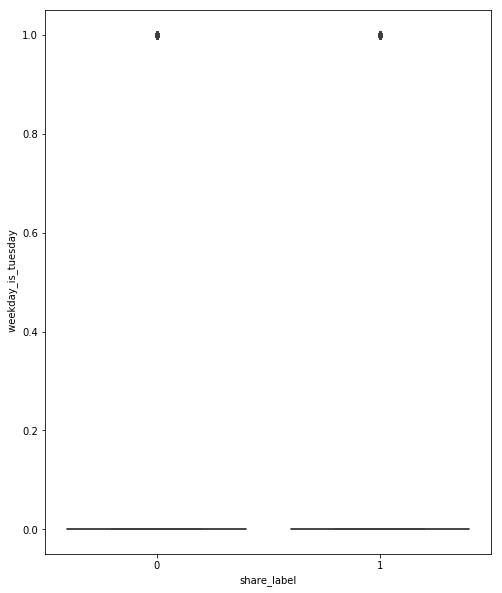

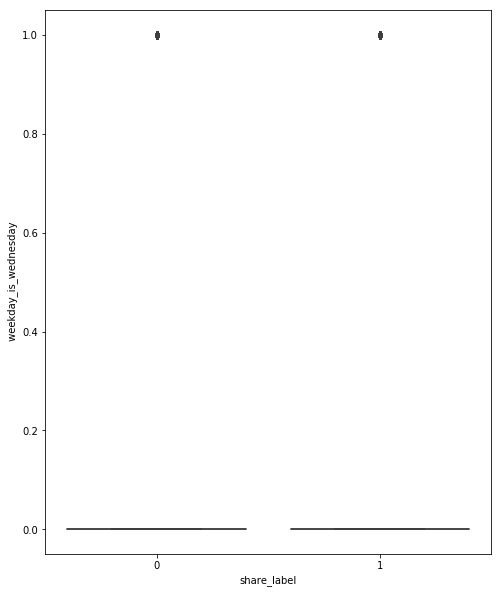

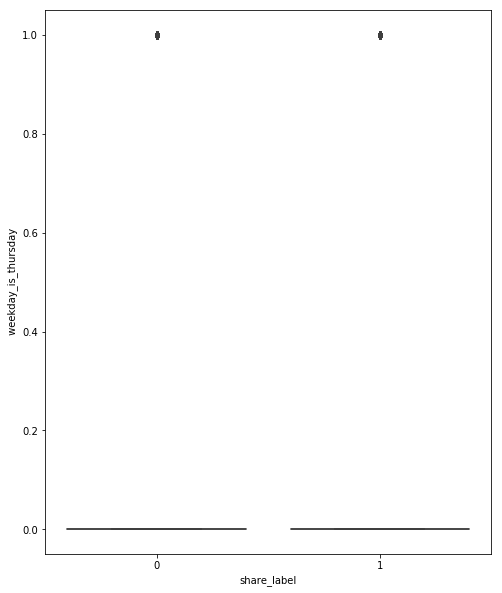

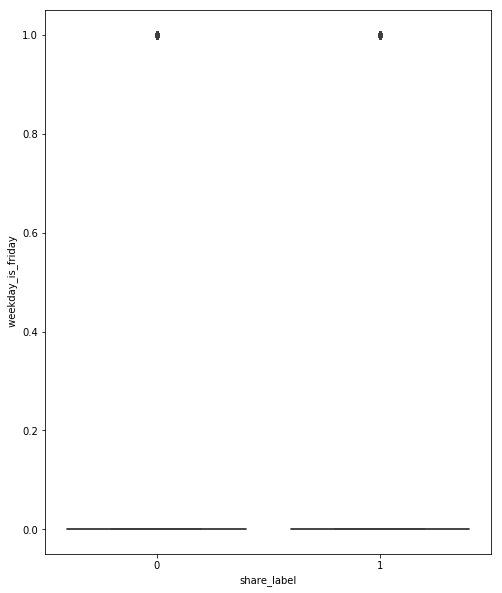

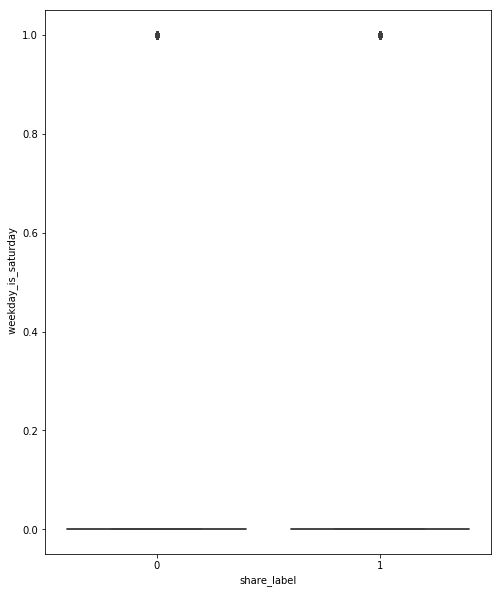

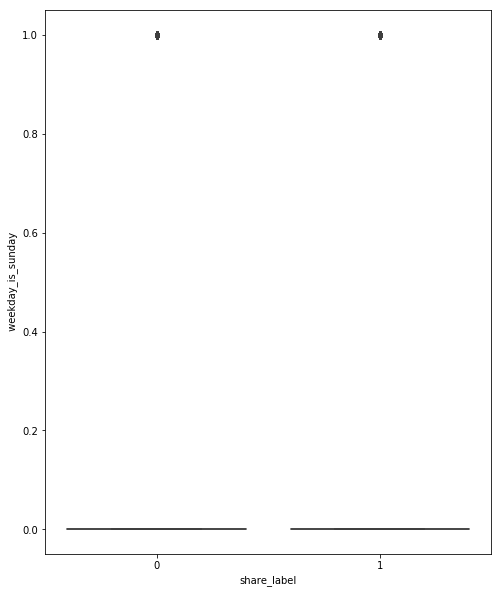

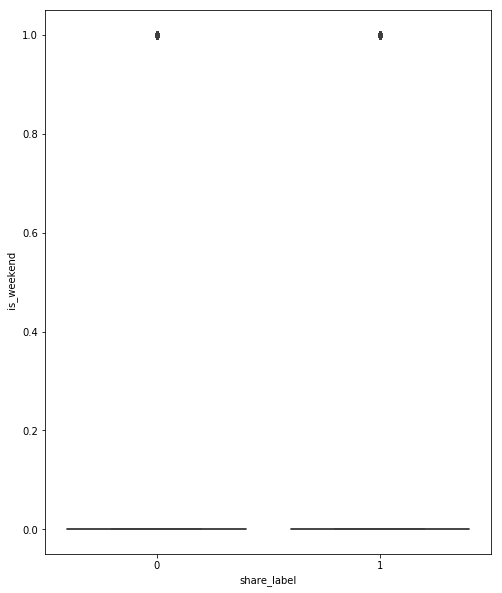

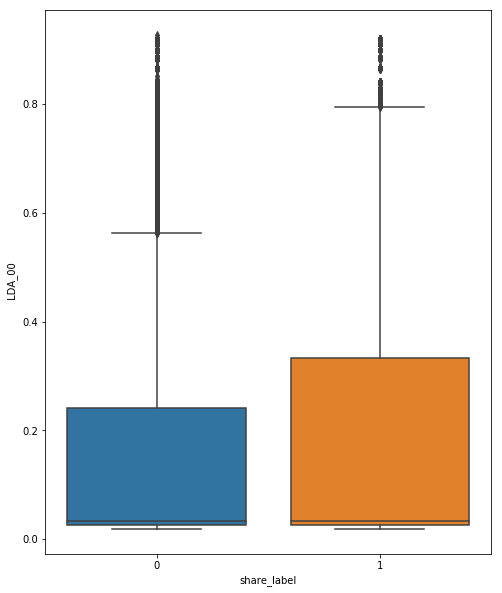

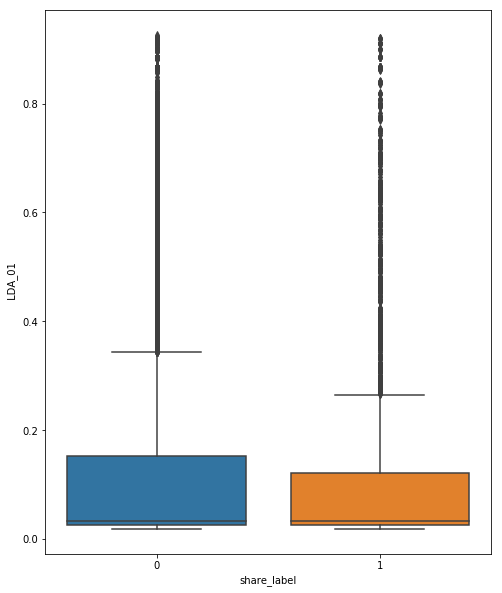

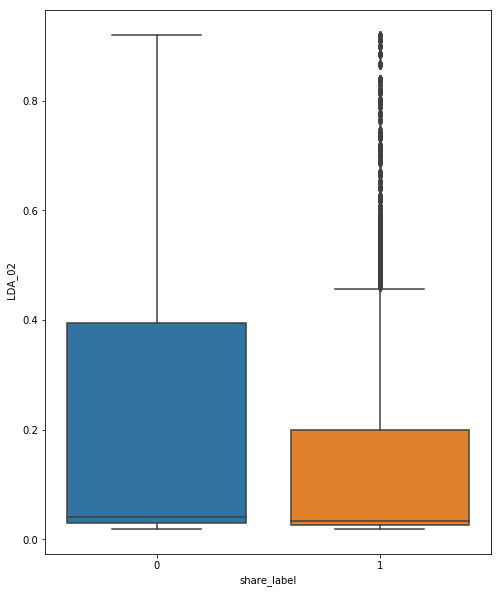

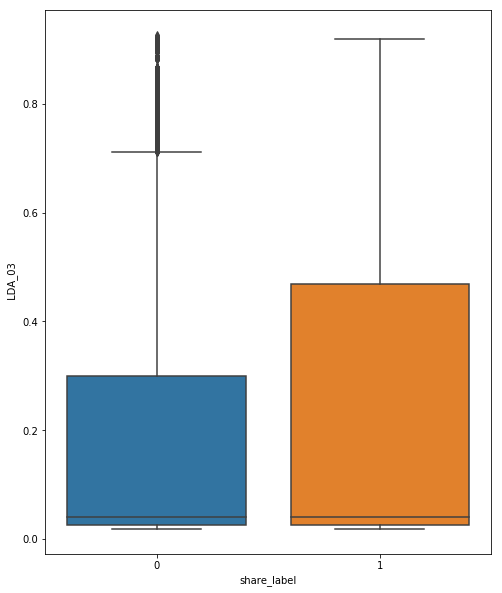

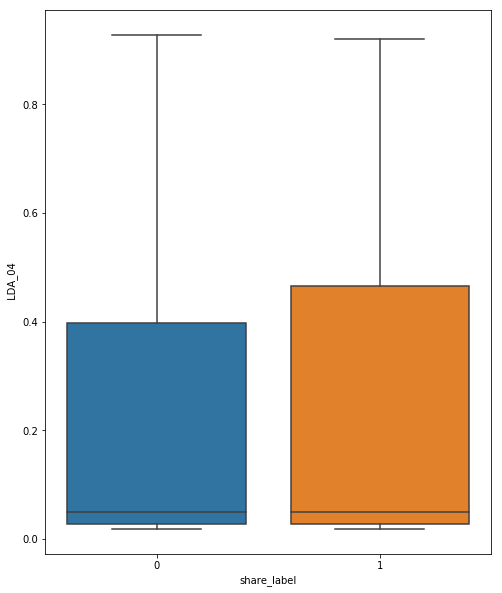

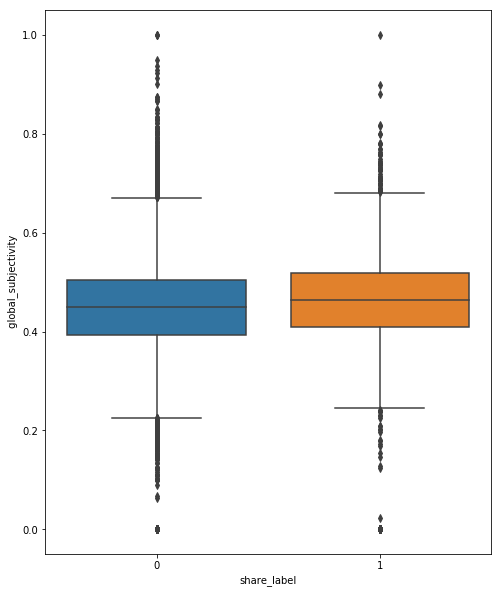

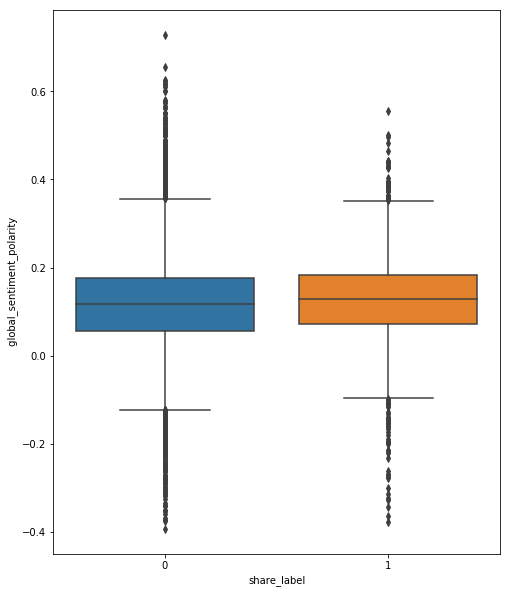

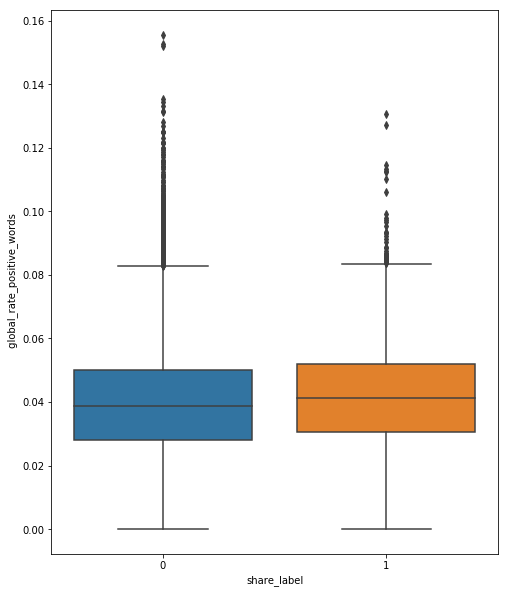

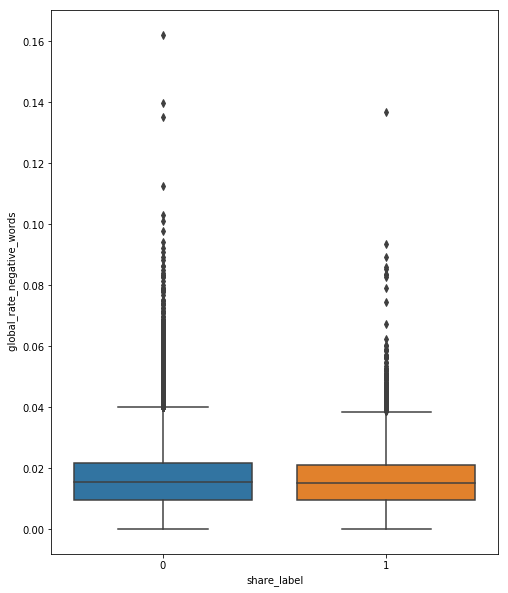

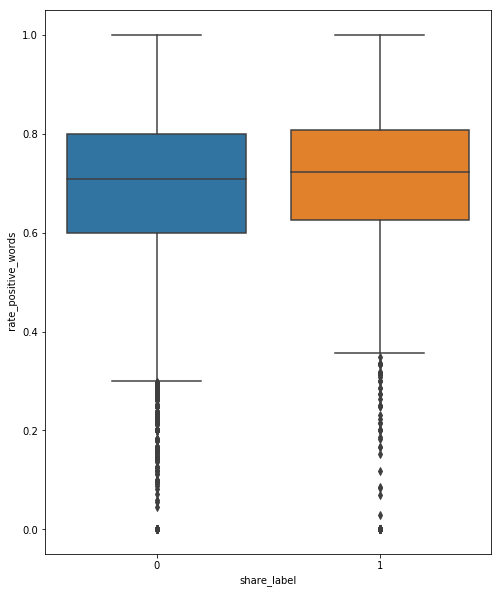

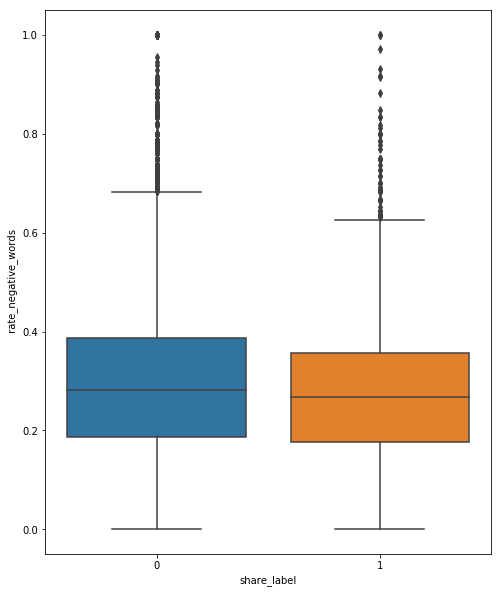

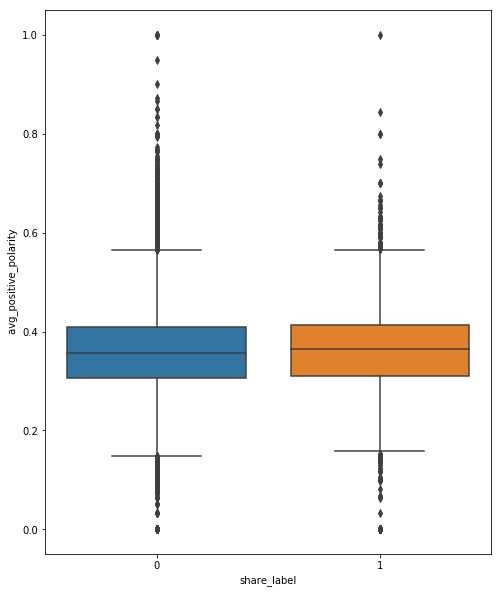

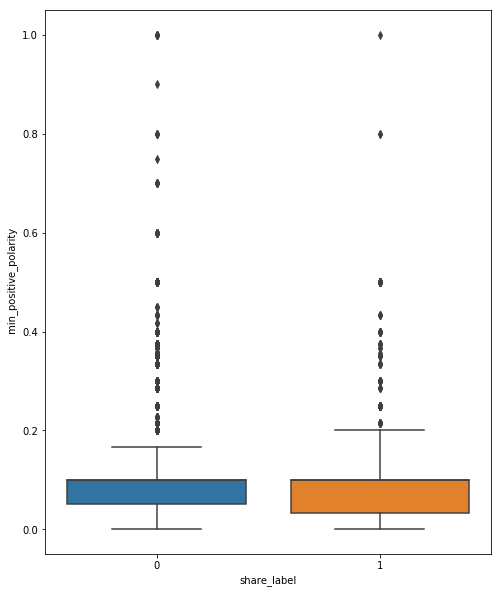

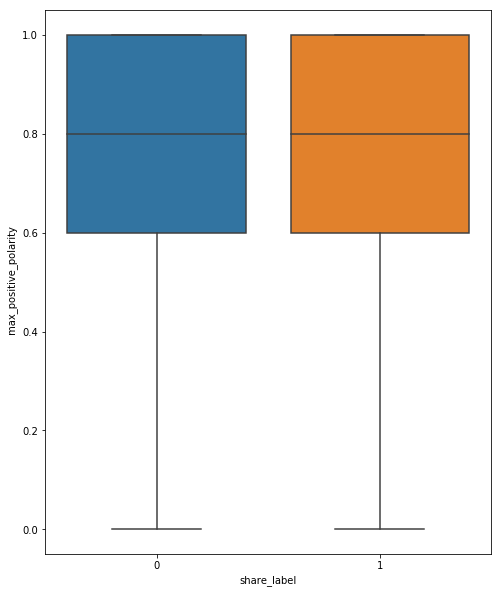

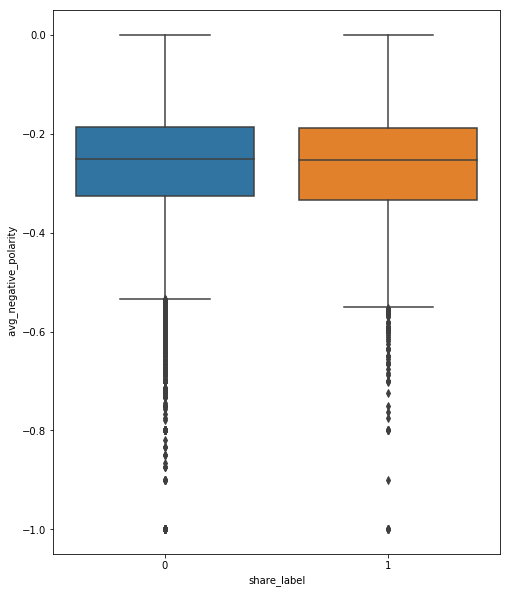

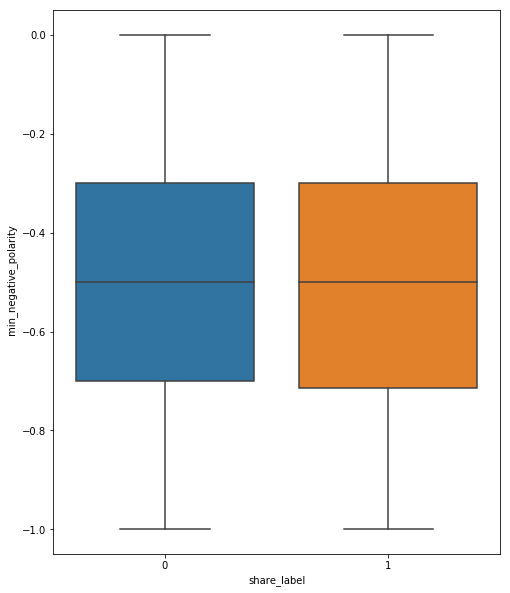

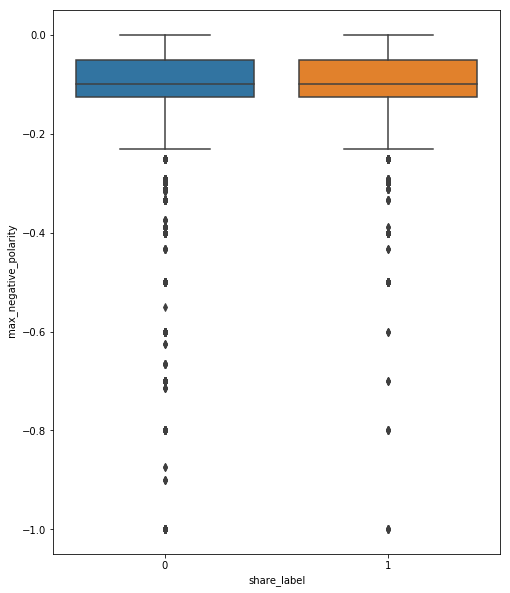

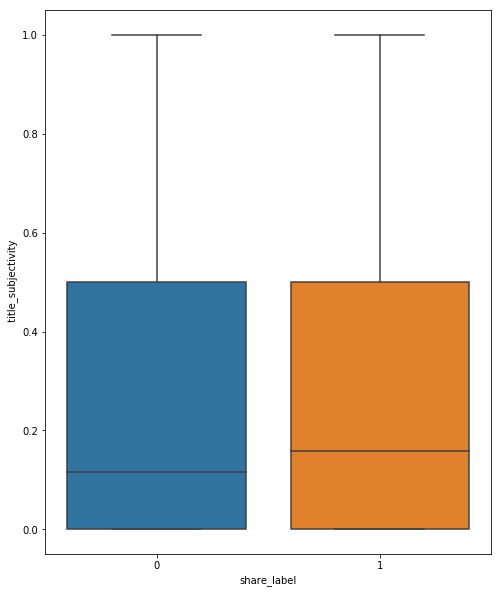

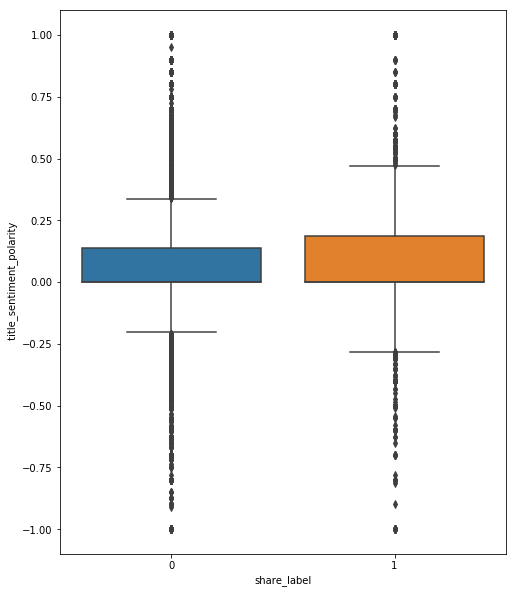

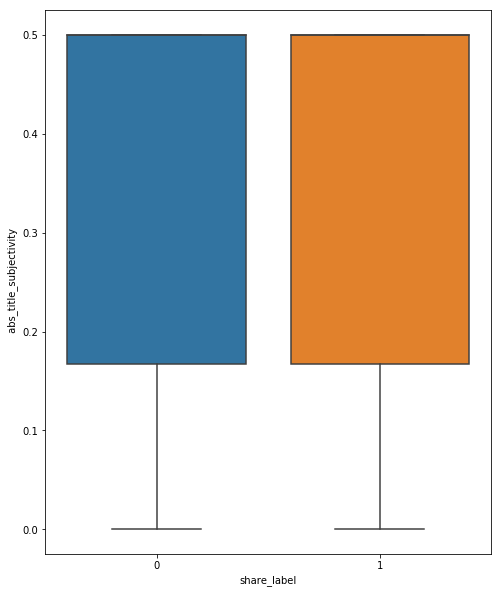

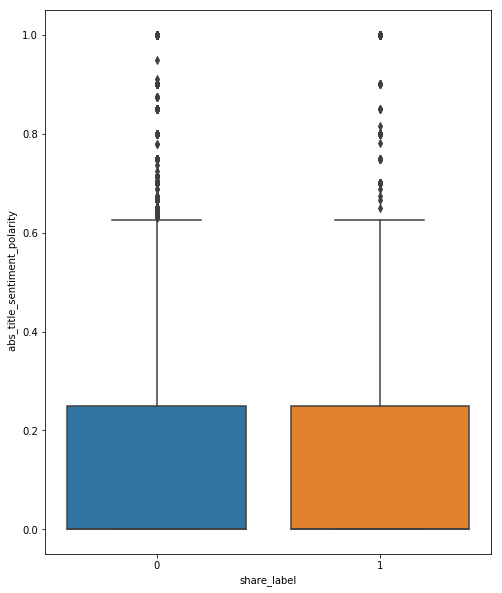

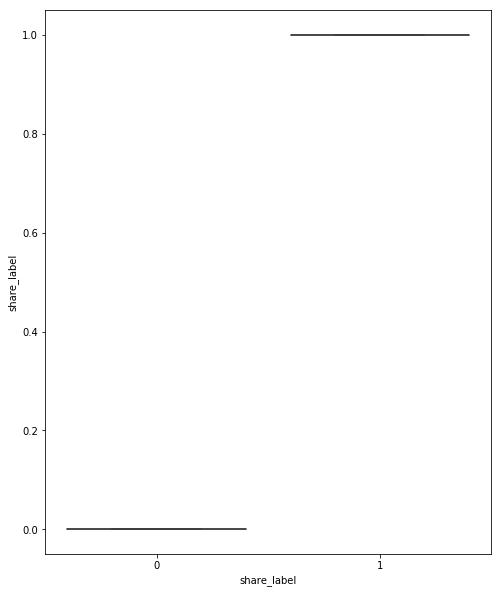

In [116]:
for cols in X.columns:
    sns.boxplot(on['share_label'],on[cols])
    plt.show()

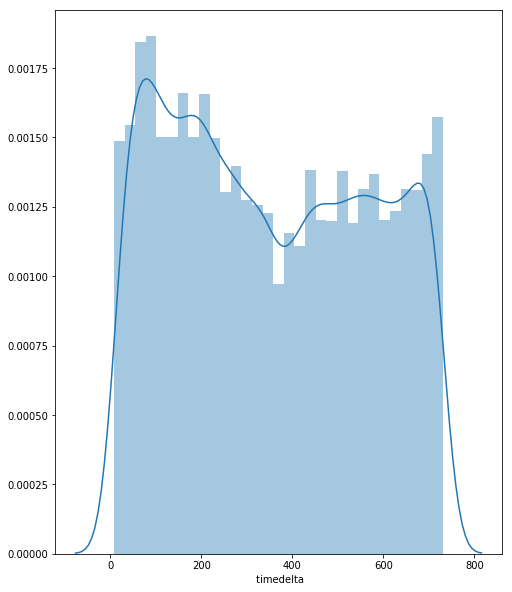

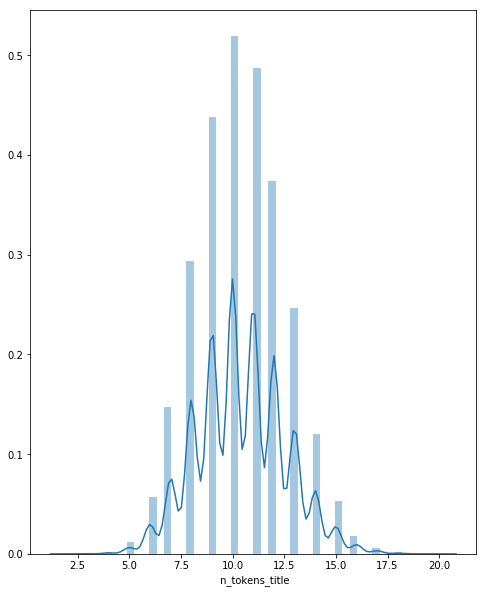

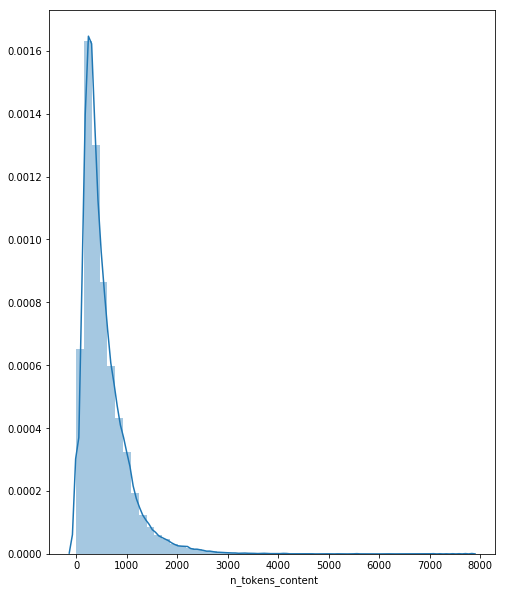

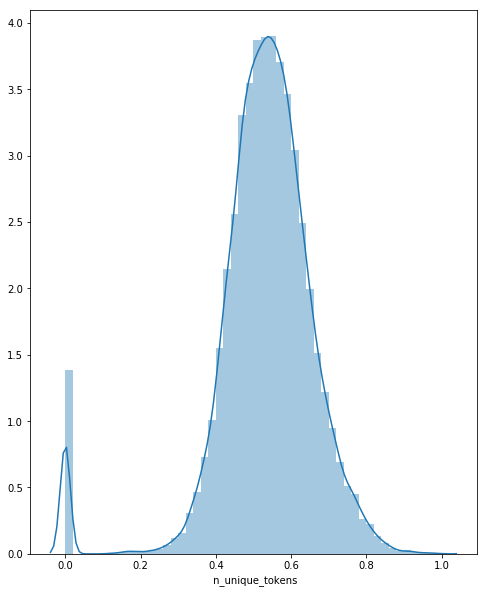

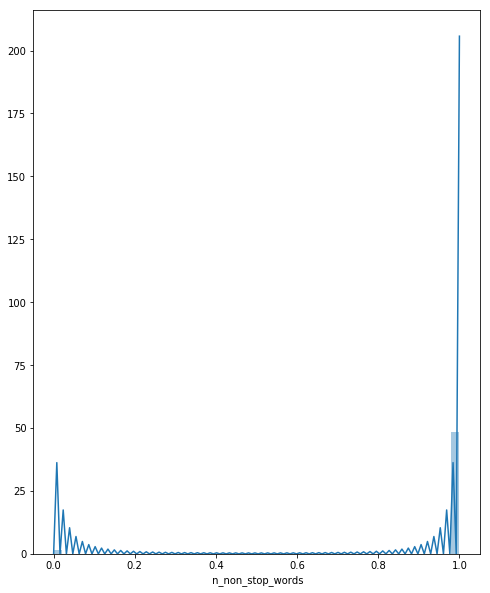

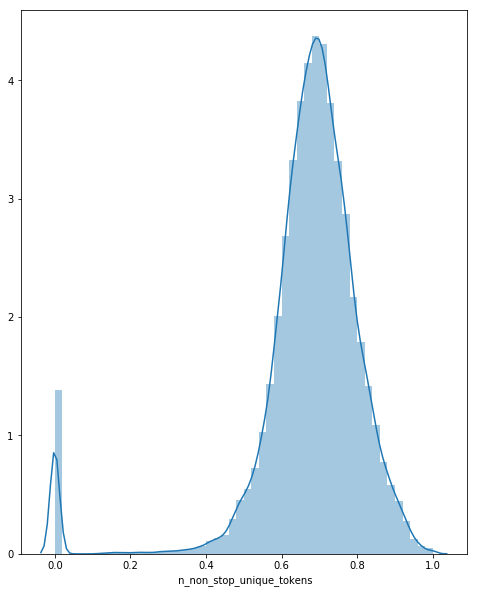

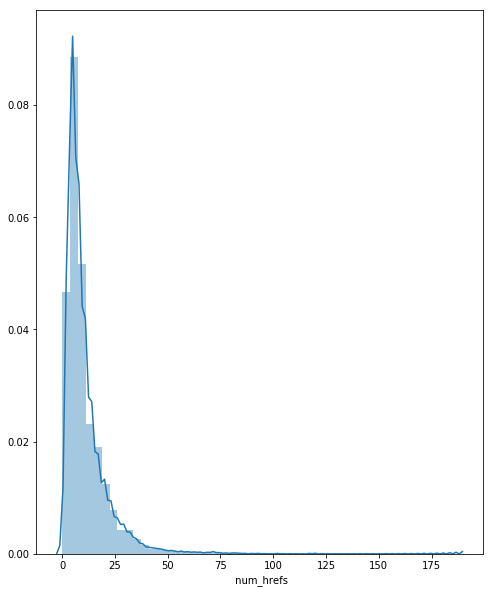

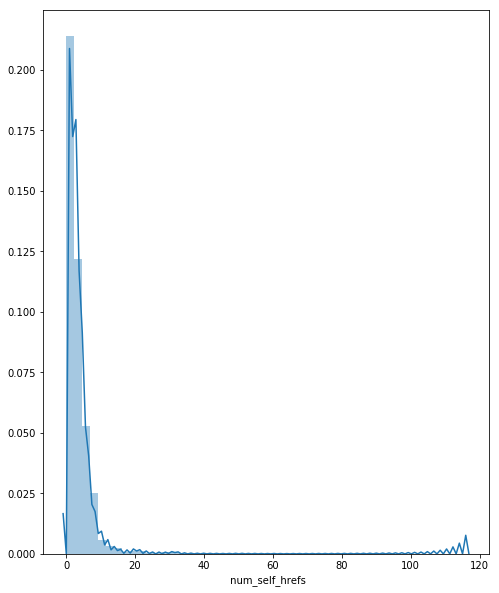

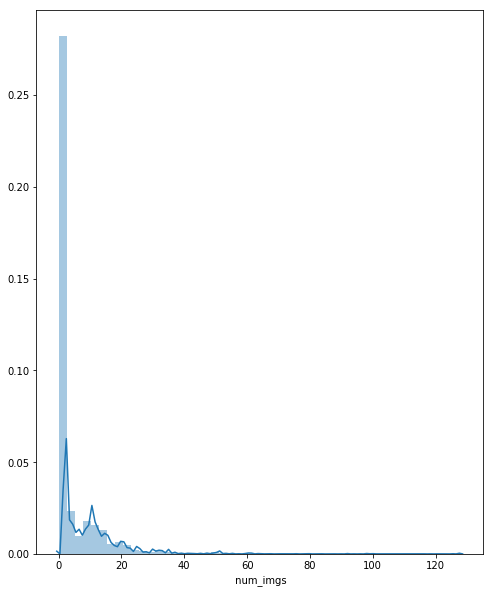

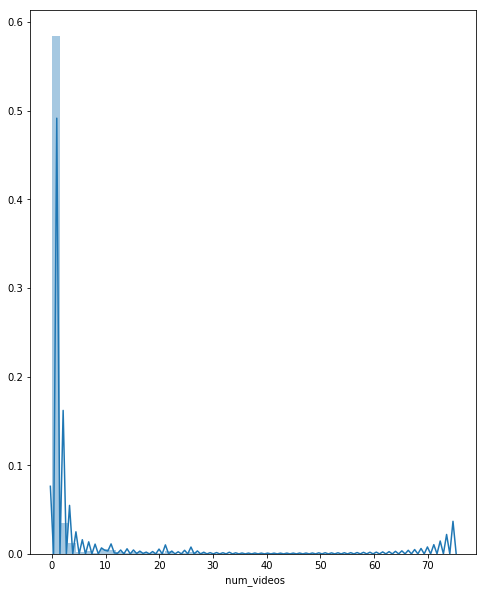

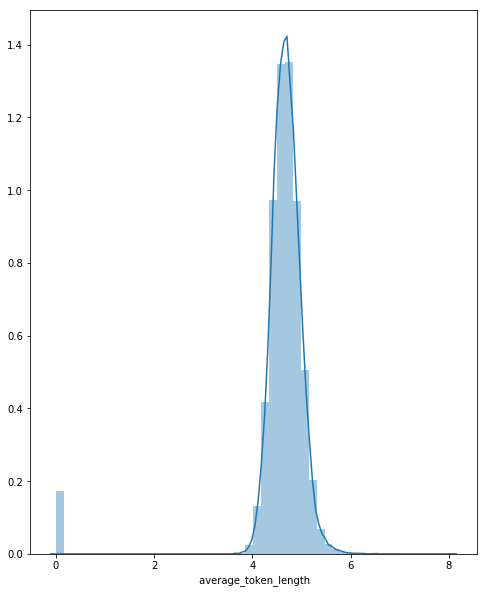

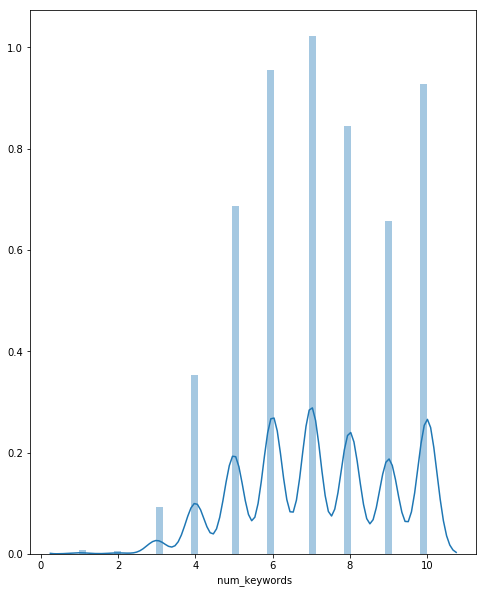

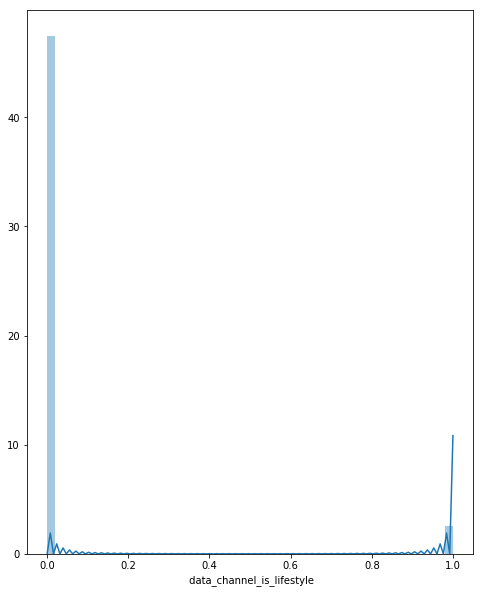

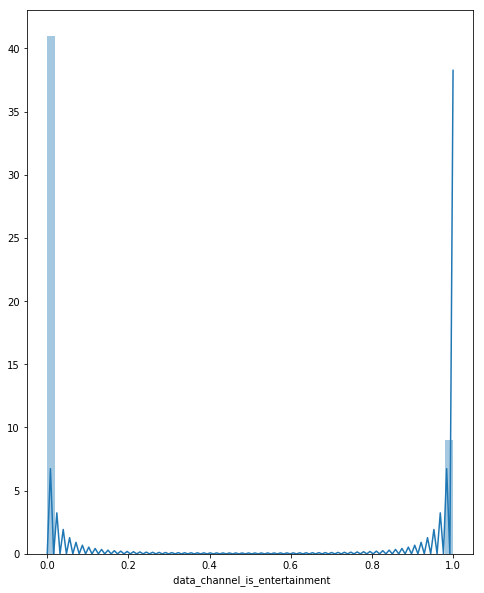

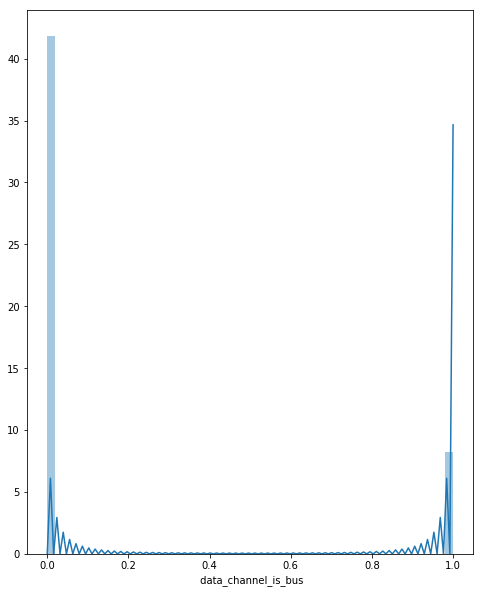

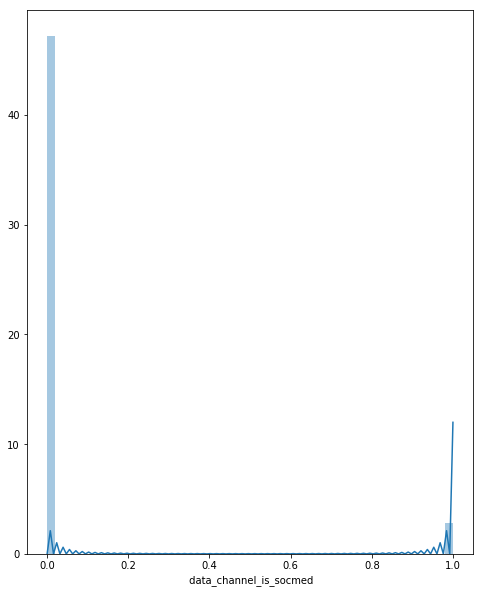

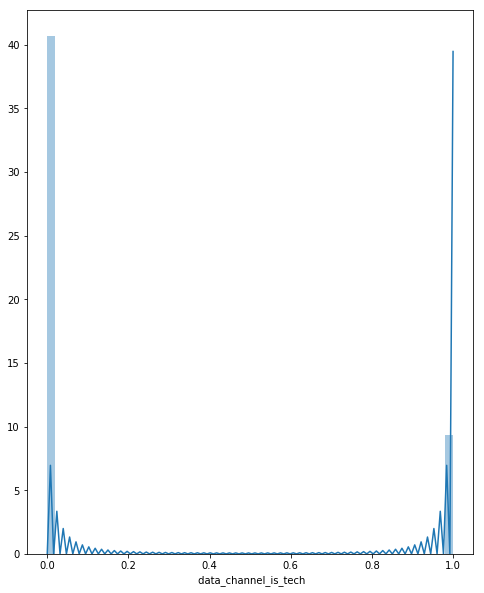

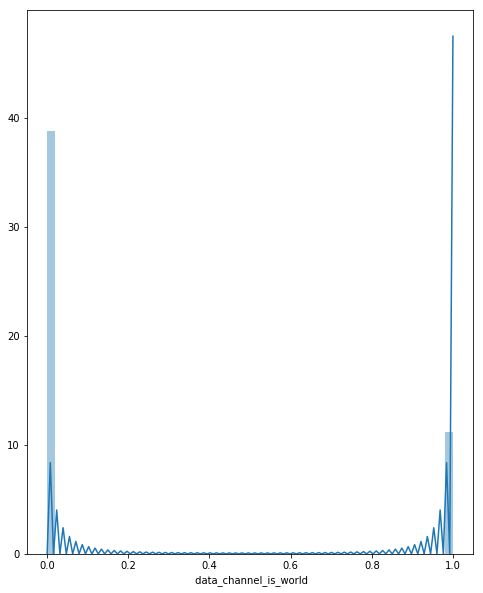

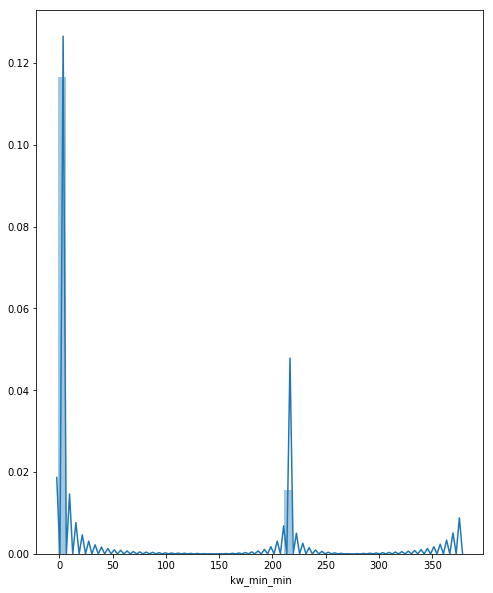

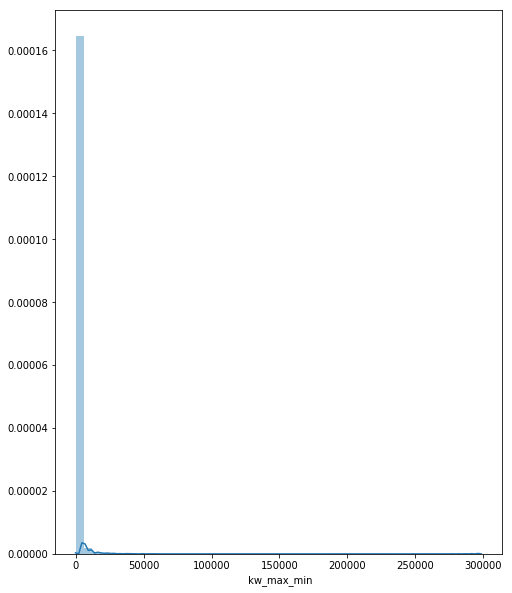

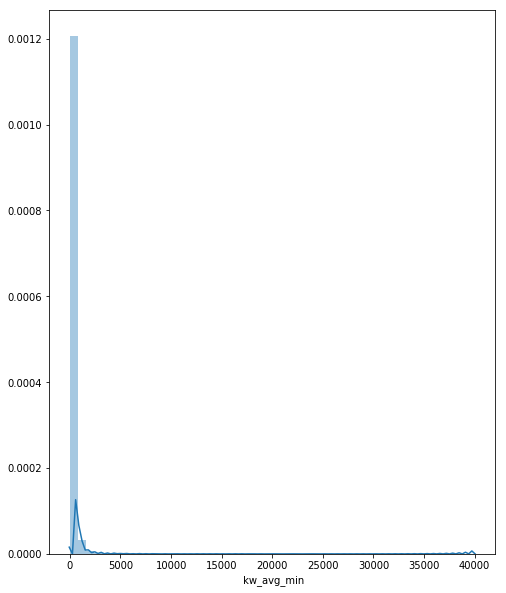

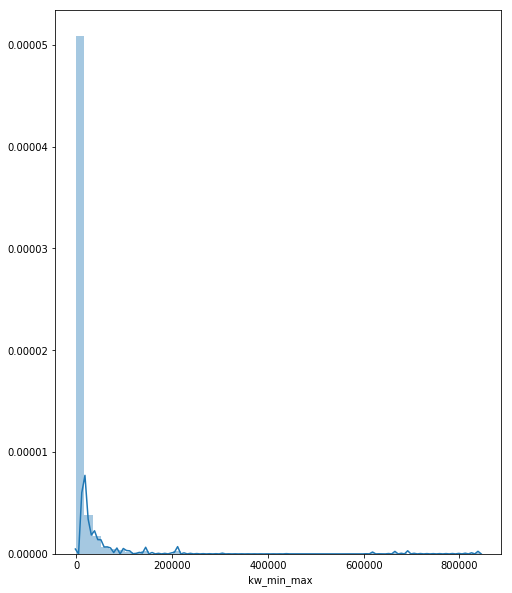

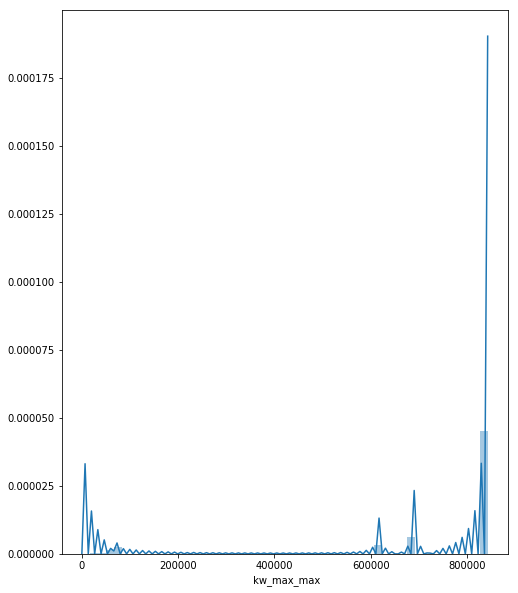

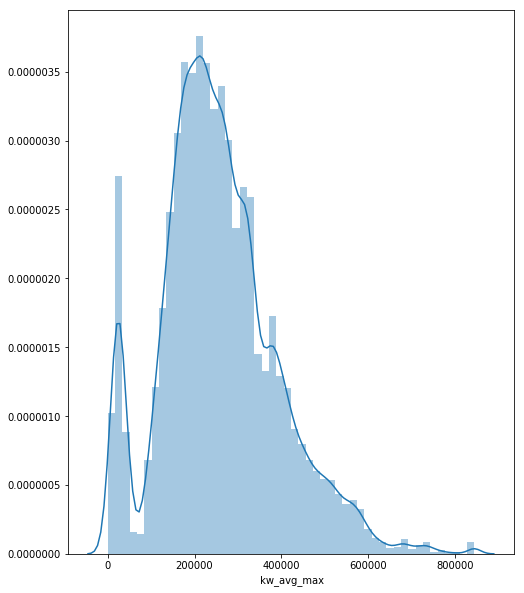

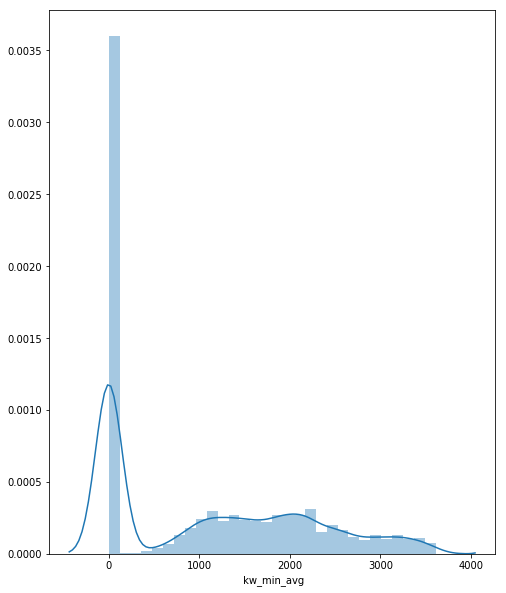

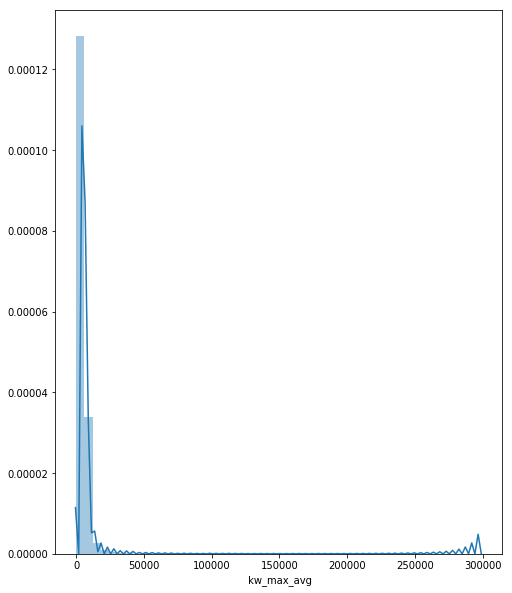

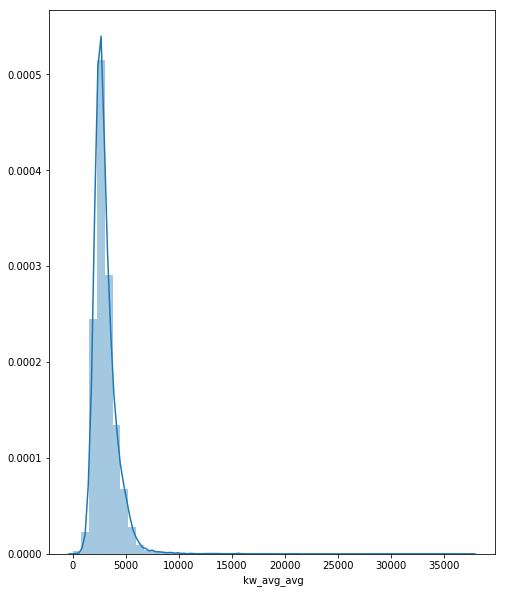

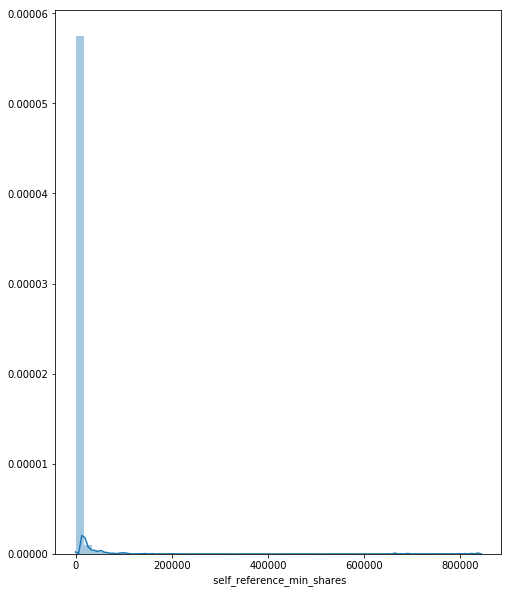

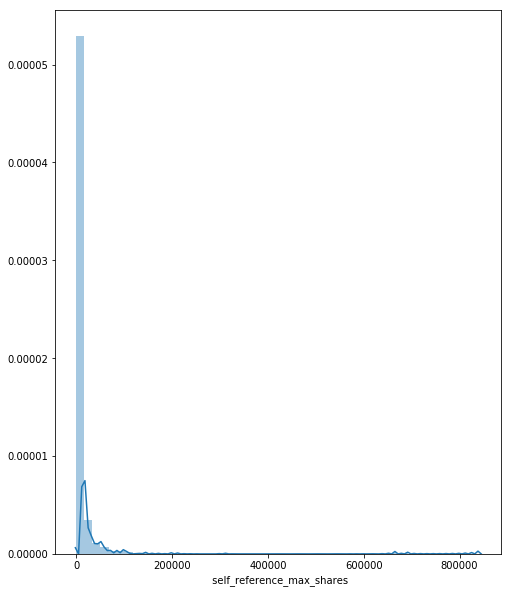

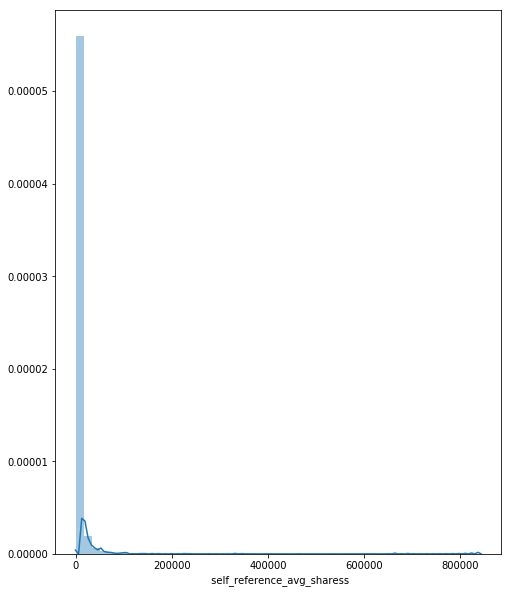

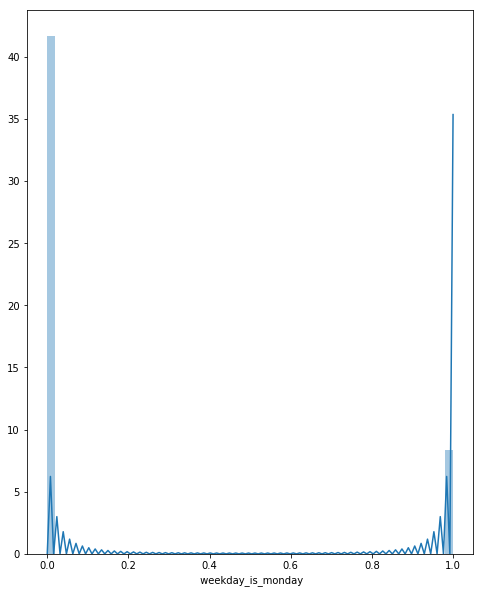

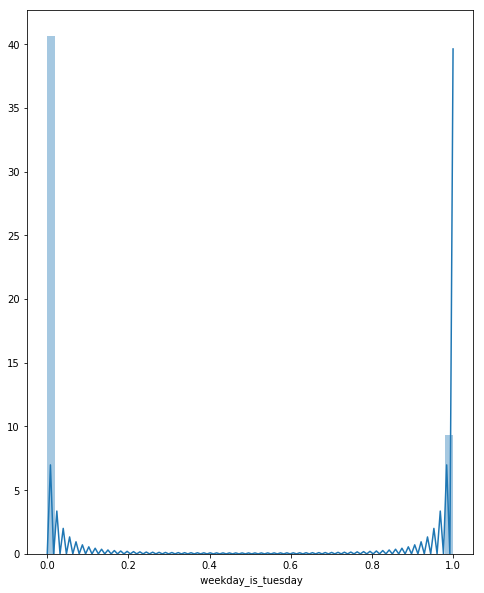

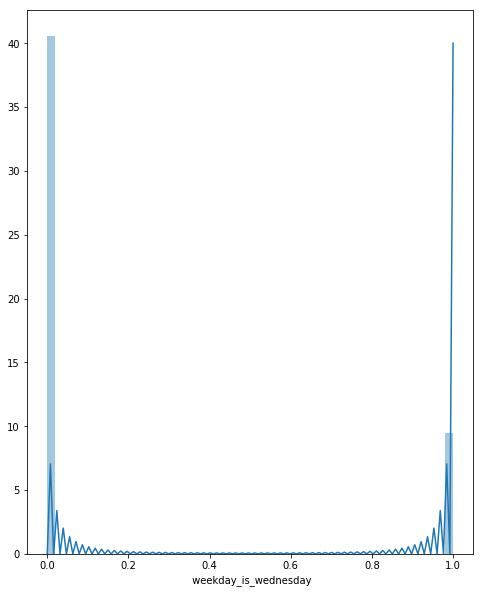

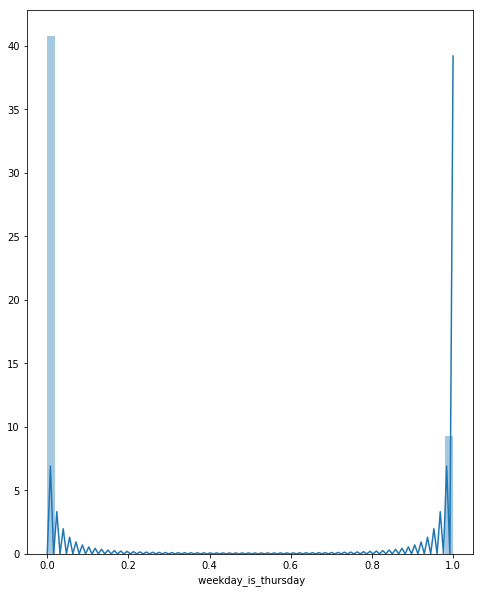

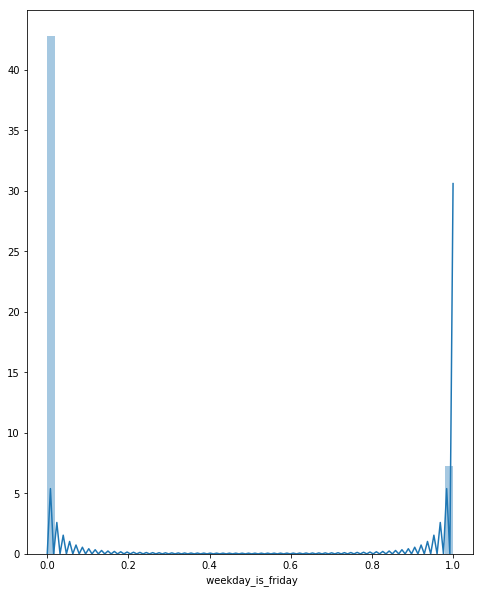

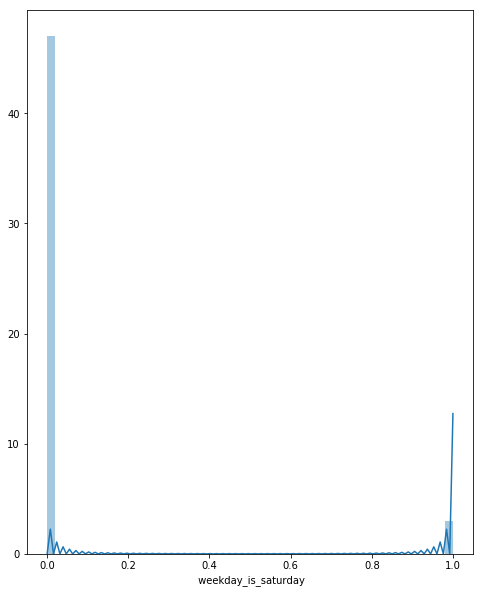

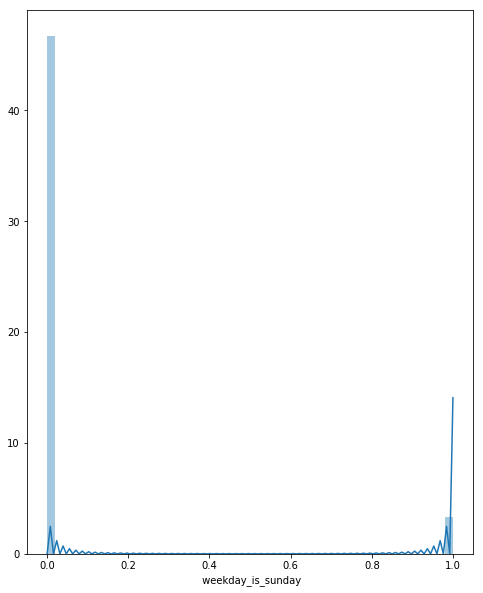

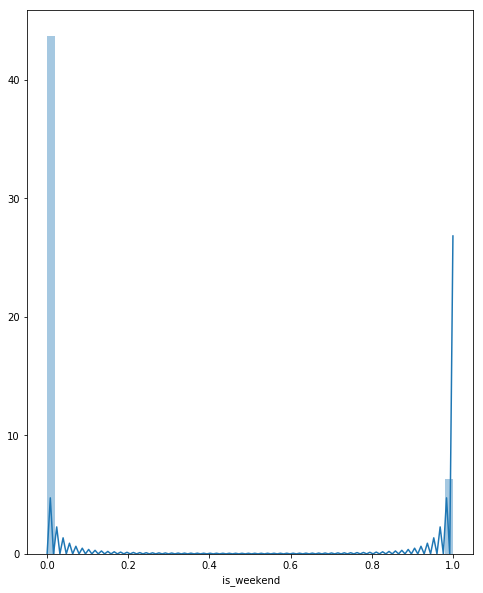

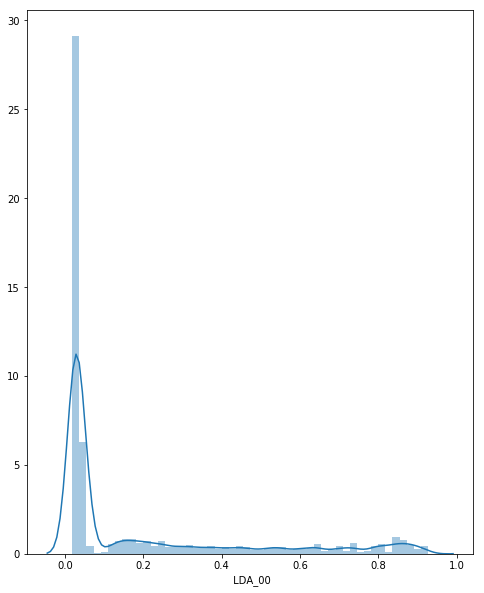

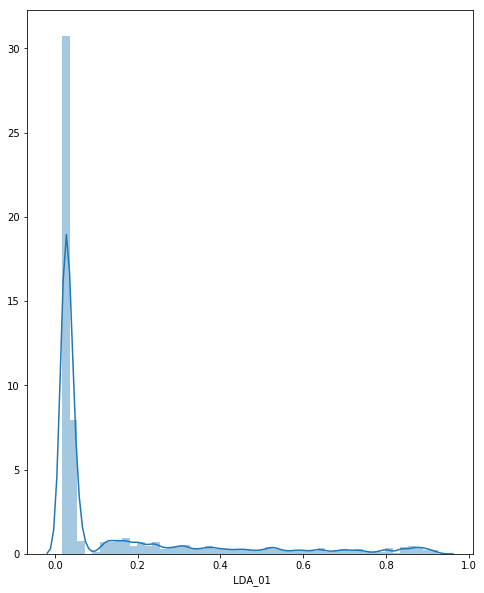

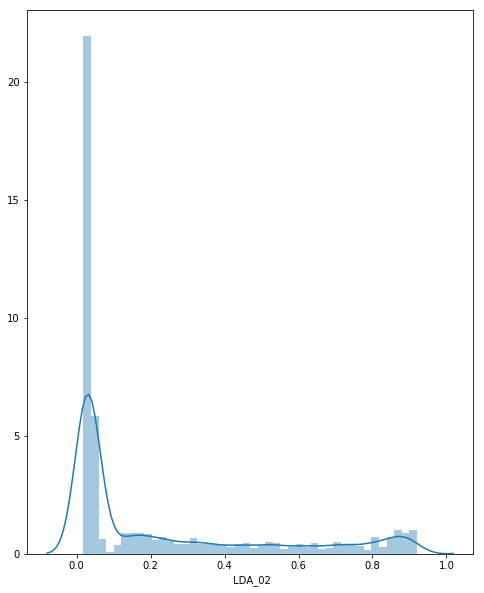

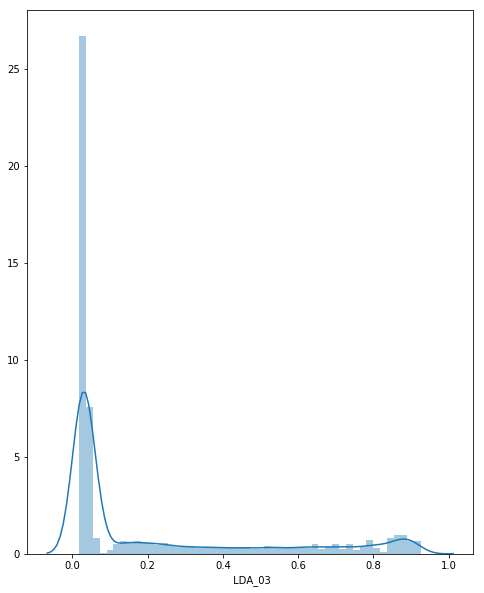

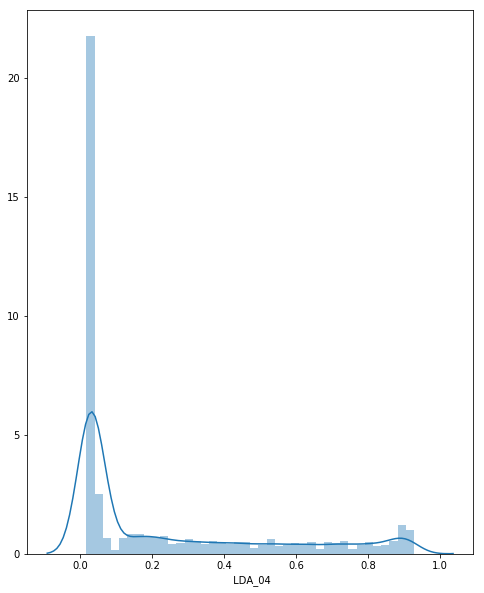

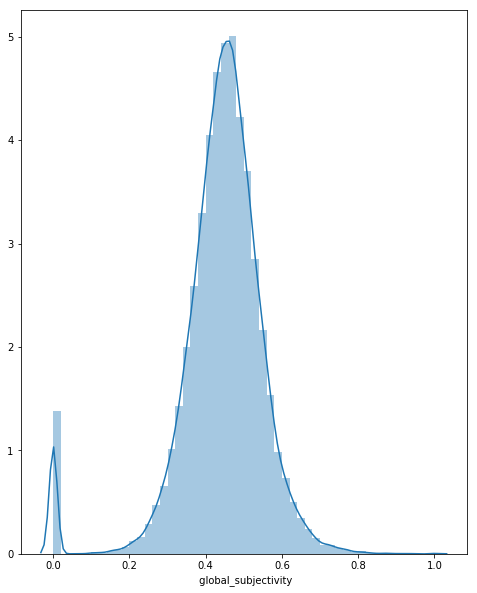

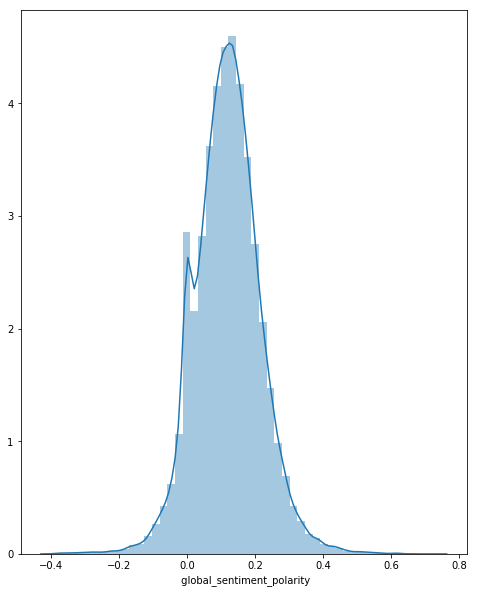

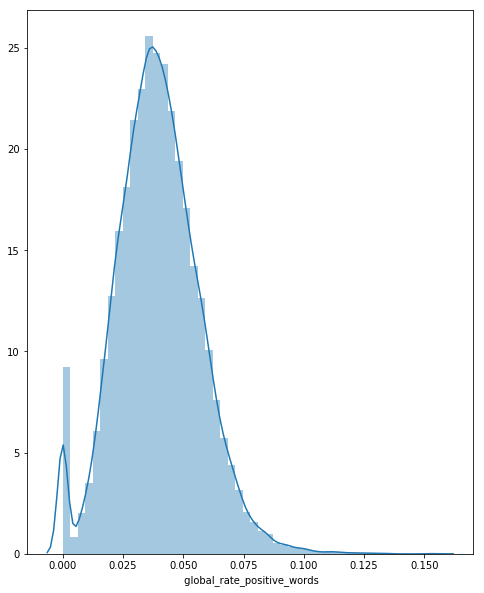

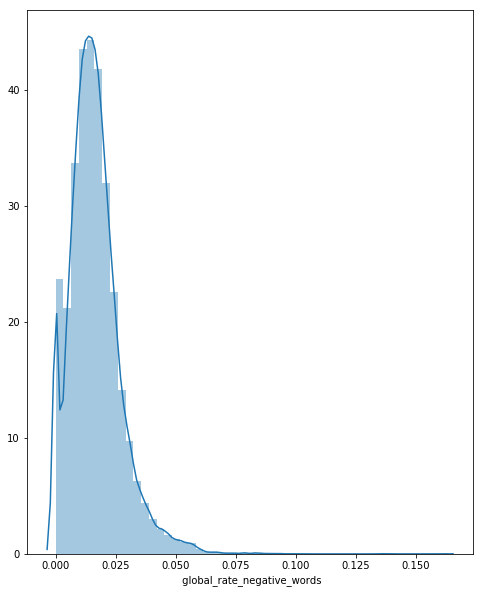

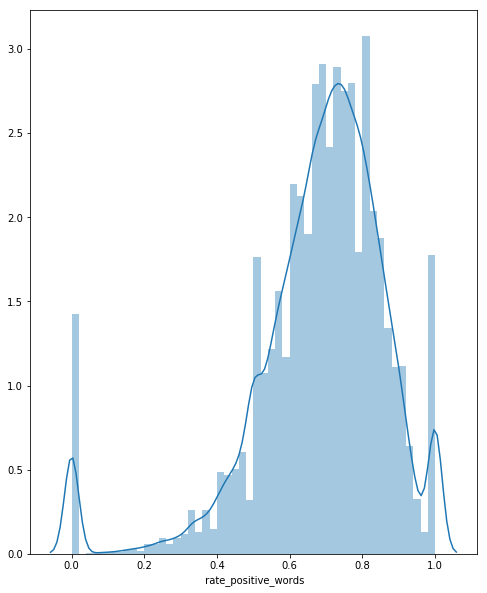

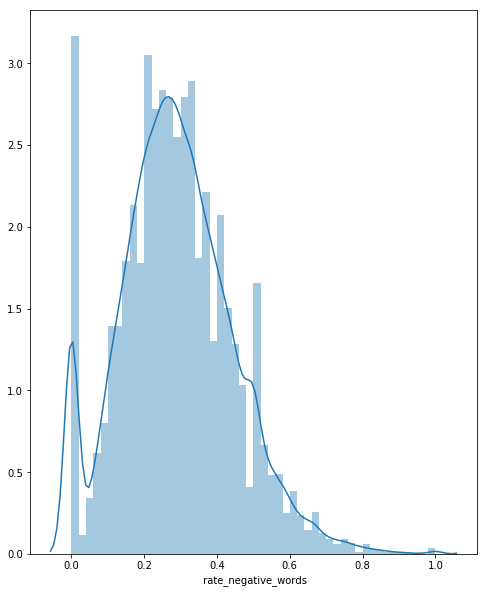

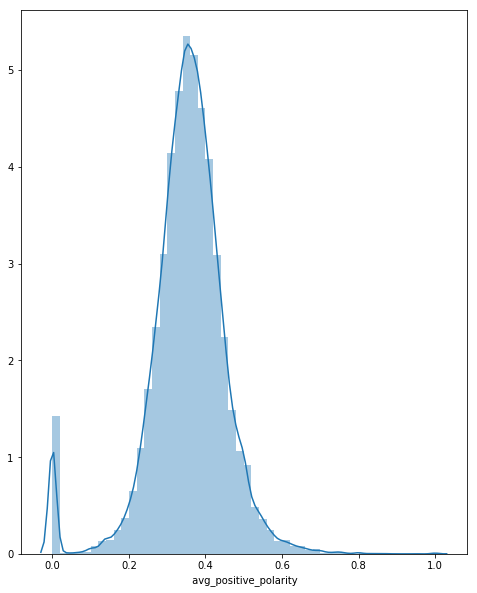

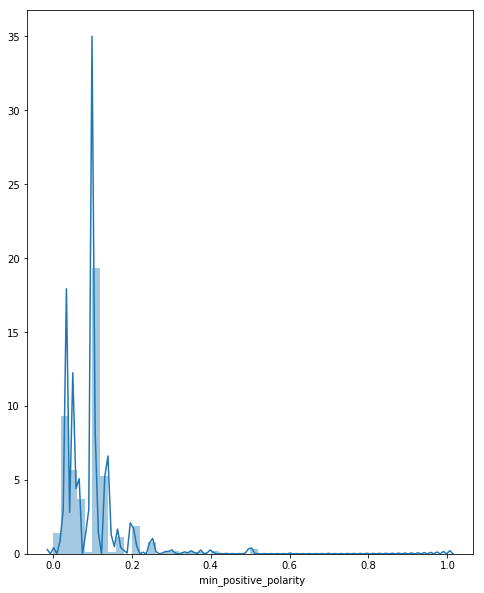

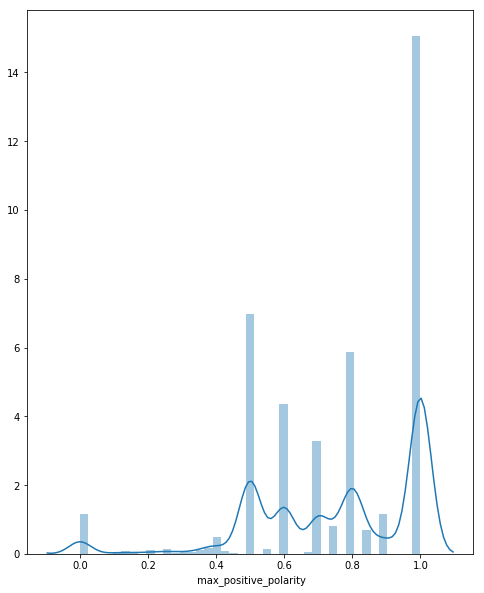

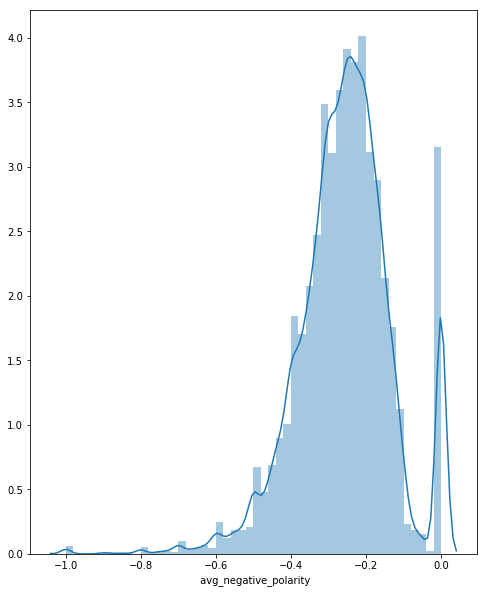

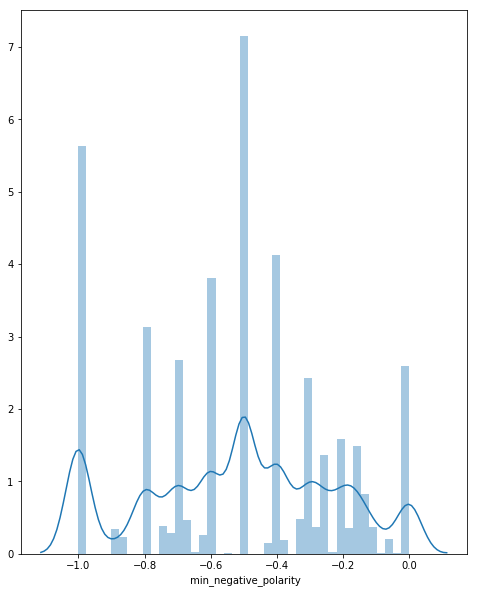

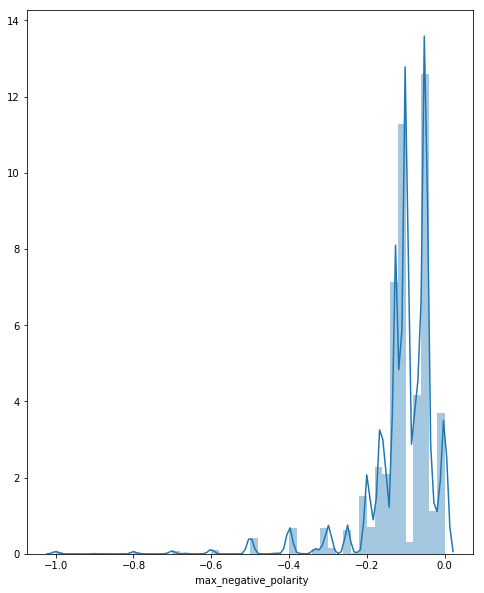

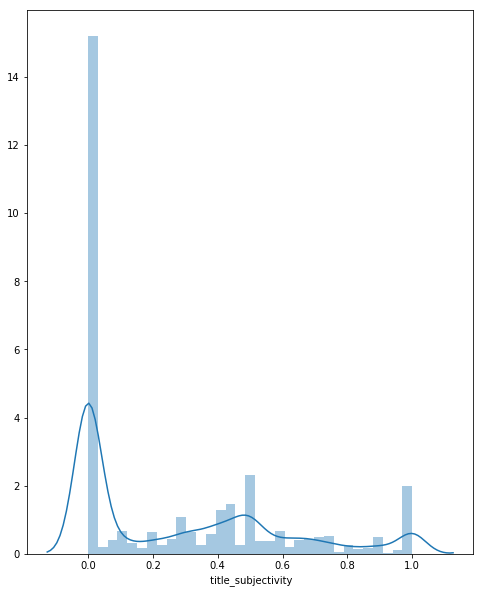

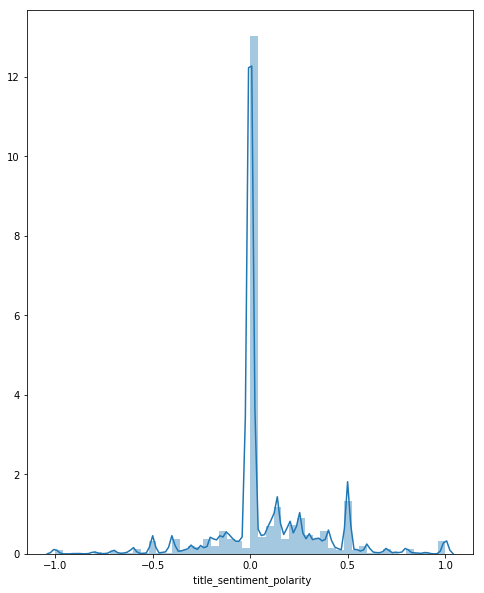

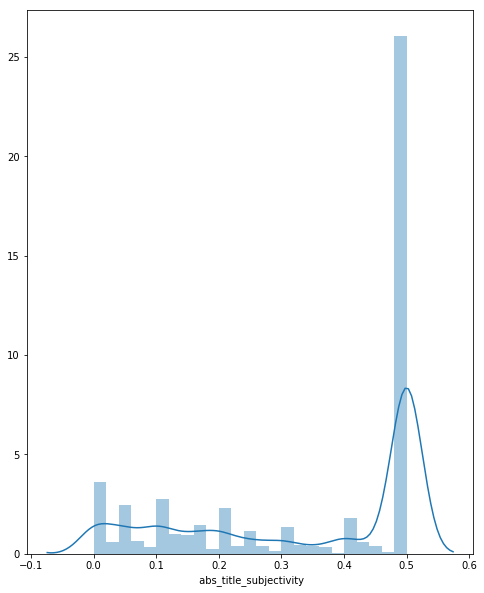

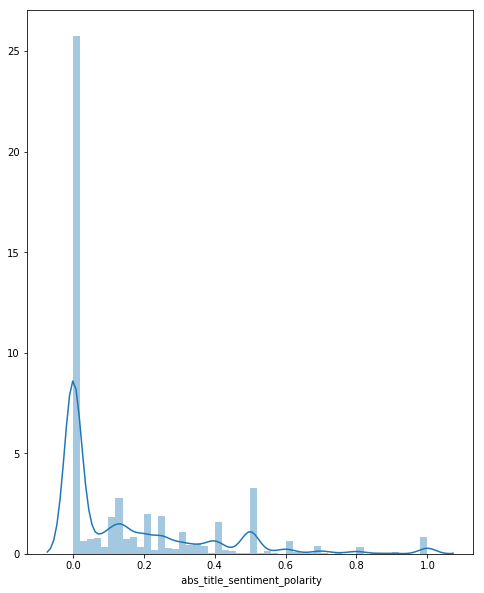

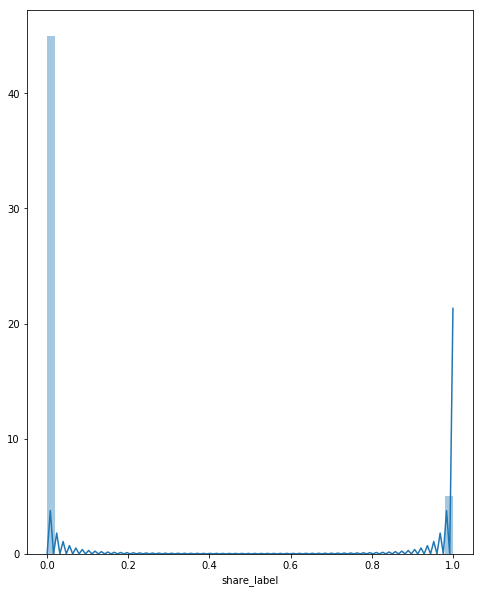

In [117]:
for cols in X.columns:
    sns.distplot(on[cols])
    plt.show()

# Time Delta

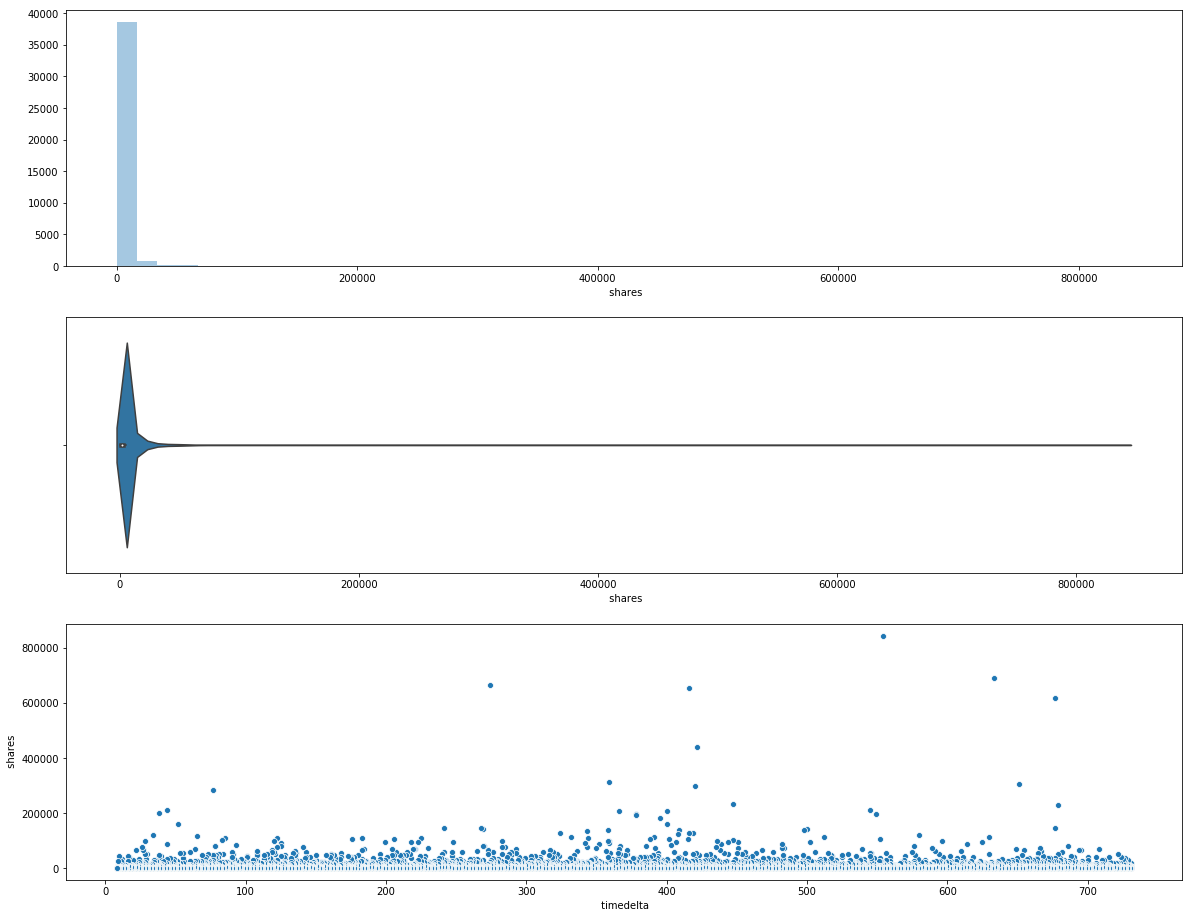

In [71]:
plt.subplots(3,1,figsize=(20,16))
plt.subplot(3,1,1)
sns.distplot(on[' shares'], hist=True, kde=False)
plt.subplot(3,1,2)
sns.violinplot(on[' shares'])
plt.subplot(3,1,3)

sns.scatterplot(data=on, x=' timedelta', y=' shares')

# We can see that the data is very skewed. We can also observe that there are very low no. of articles with very large number of shares. The 3rd scatter plot confirms the same.So, next let us try to find and remove the outliers


In [72]:
Q1 = on[' shares'].quantile(0.25)
Q3 = on[' shares'].quantile(0.75)
IQR = Q3 - Q1
LTV= Q1 - (1.5 * IQR)
UTV= Q3 + (1.5 * IQR)
on = on.drop(on[on[' shares'] > UTV].index)
on.shape

(35103, 61)

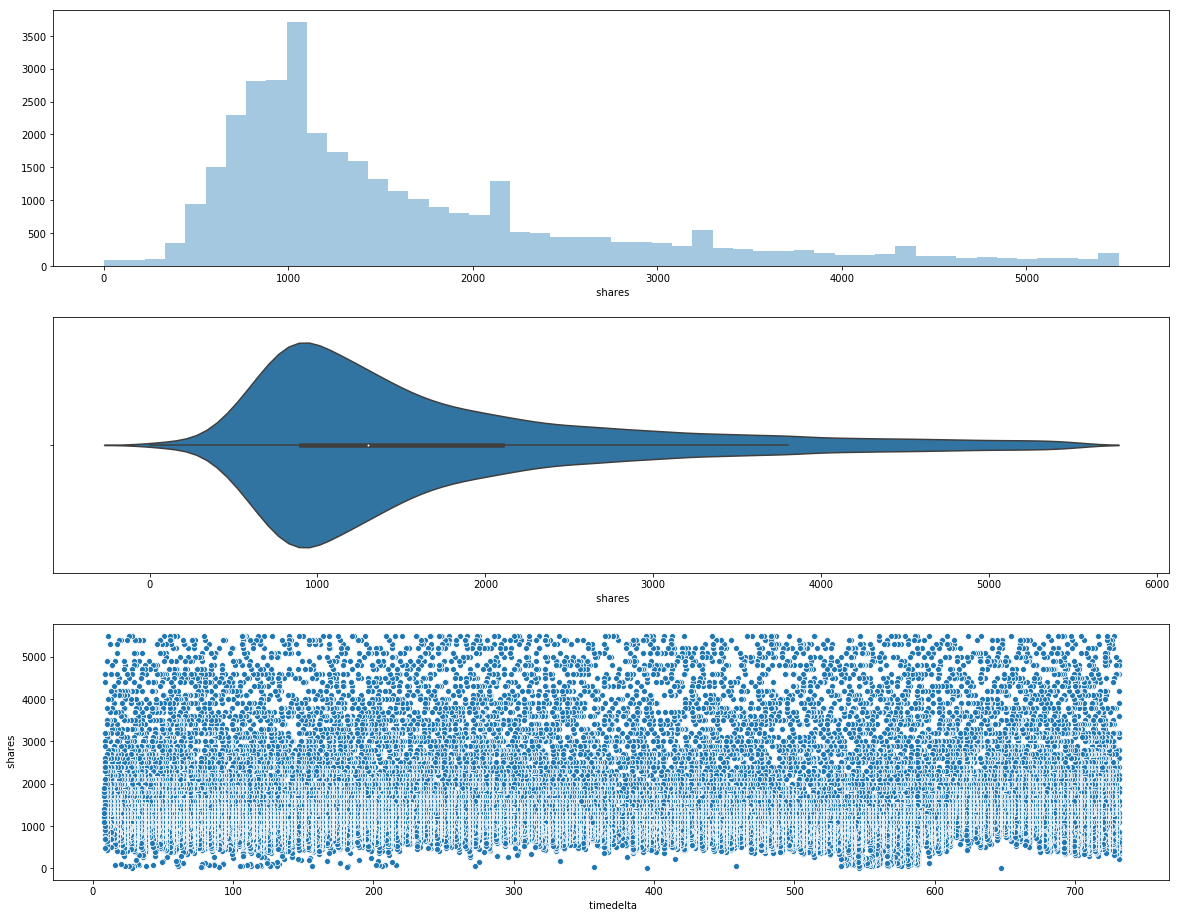

In [73]:
plt.subplots(3,1,figsize=(20,16))
plt.subplot(3,1,1)
sns.distplot(on[' shares'], hist=True, kde=False)
plt.subplot(3,1,2)
sns.violinplot(on[' shares'])
plt.subplot(3,1,3)
sns.scatterplot(data=on, x=' timedelta', y=' shares')

# BIVARIATE ANALYSIS

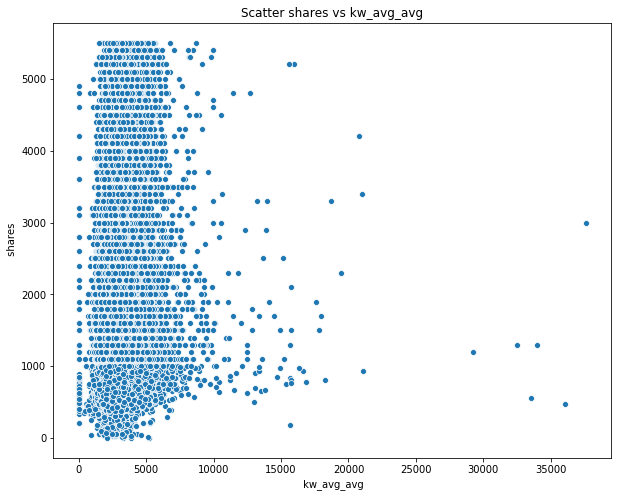

In [74]:
plt.subplots(1,1,figsize=(10,8))

plt.subplot(1,1,1)

plt.title('Scatter shares vs kw_avg_avg')
sns.scatterplot(data=on, x=' kw_avg_avg', y=' shares', ci=None)

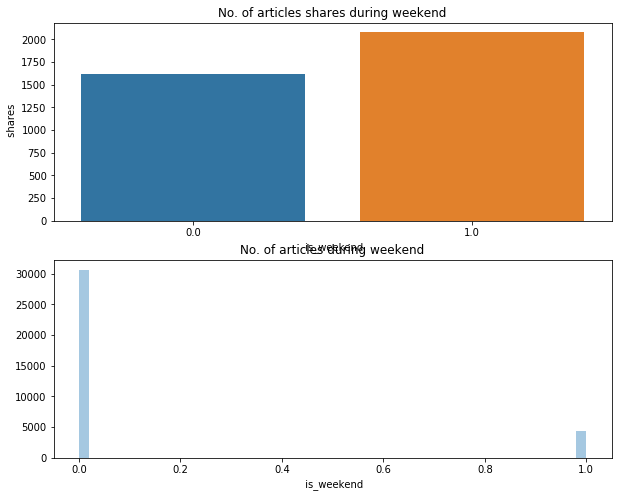

In [75]:
plt.subplots(2,1,figsize=(10, 8))

plt.subplot(2,1,1)
plt.title('No. of articles shares during weekend')
sns.barplot(data=on, x=' is_weekend', y=' shares', ci=False)

plt.subplot(2,1,2)
plt.title('No. of articles during weekend')
sns.distplot(on[' is_weekend'], hist=True, kde=False)

# We can see that articles published on weekend is getting shared more than weekday

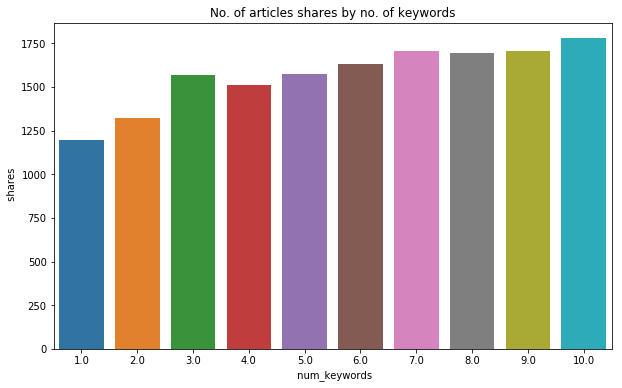

In [76]:
plt.subplots(1,1,figsize=(10, 6))

plt.subplot(1,1,1)
plt.title('No. of articles shares by no. of keywords')
sns.barplot(data=on, x=' num_keywords', y=' shares', ci=False)

# We can see that no. of shares increase with key words in the meta data

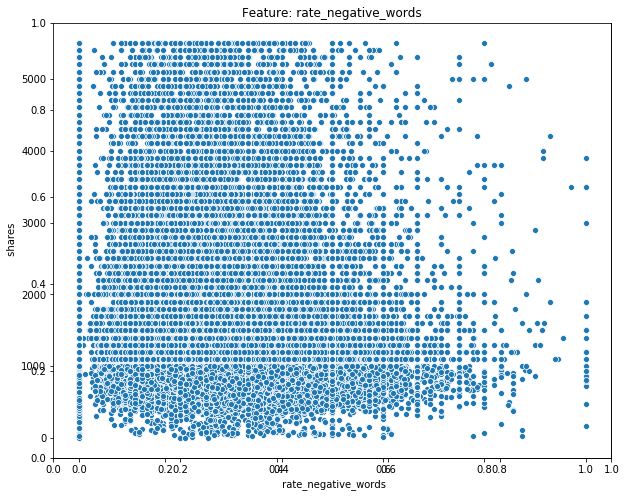

In [77]:
fig, ax = plt.subplots(1,1,figsize=(10,8))
ax = fig.add_subplot(1, 1, 1)
# ax.set_yscale('log')
plt.title('Feature: rate_negative_words')
sns.scatterplot(data=on, x=' rate_negative_words', y=' shares', ci=None) 

# EDA Inference

Box plot is performed with respect to all columns and the target column.

Boxplot is used to identify the outliers. Outliers are responsible for skewness of the data. 

In the Box Plot, we can see there are a lot of outliers in the data.

Before performing BoxPlot, we have done IQR, UB and LB to identify how many outliers were there in each column.

We calculated IQR, then UB and LB. We identified the outliers.

Distribution plot helps us to identify how the data is distributed whether normally or skewed

Through the distplot we can see alot columns are right skewed, left skewed, bimodal and multimodal. 

The skewness in distribution is due to the presence of the outliers.

# Label Encoding / Get Dumies

# The above code has been already done at the start of the exercise to build the model.
We have classified the Target column 'Shares' based on the mean. If the share value is less than mean, then it is classified as 0 and if it more than mean it is classified as 1

# Data Handling

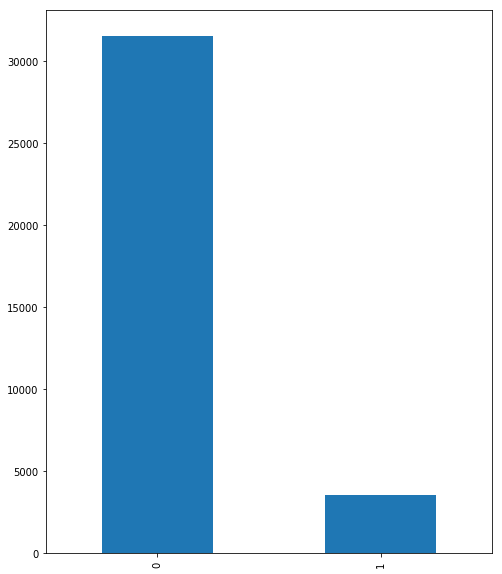

In [118]:
on['share_label'].value_counts().plot(kind='bar')

In [119]:
(on.share_label.sum()/len(on.share_label))*100

10.078910634418712

# We can observe that the shares are in the ratio of 80% and 20%. But, it's a practical situation in the real time scenario

# Feature selection

# Pearson Correlation

In [81]:
on_corr = abs(on.corr())
on_corr = on_corr[' shares']
on_corr = pd.DataFrame(on_corr.values, on.columns).reset_index()
# print(df_corr[0:20],df_corr[21:40], df_corr[41:]  )
on_corr.columns = ['Feature', 'Corr']
on_corr = on_corr[on_corr['Corr'] > 0.06]
on_corr = on_corr.sort_values(by='Corr', ascending=False)[1:]
on_corr = on_corr.head(20)
on_corr

Feature      Corr
60                     share_label  0.783834
26                      kw_avg_avg  0.147678
37                      is_weekend  0.139997
17           data_channel_is_world  0.137431
40                          LDA_02  0.136693
15          data_channel_is_socmed  0.114944
13   data_channel_is_entertainment  0.105422
35             weekday_is_saturday  0.101764
16            data_channel_is_tech  0.097379
36               weekday_is_sunday  0.089757
24                      kw_min_avg  0.089510
42                          LDA_04  0.086734
6                        num_hrefs  0.077652
39                          LDA_01  0.076750
38                          LDA_00  0.075626
48             rate_negative_words  0.067573
11                    num_keywords  0.065535
45      global_rate_positive_words  0.063263
44       global_sentiment_polarity  0.063261
25                      kw_max_avg  0.063157

# Above list shows the list of features which has more than 6% correlation (P Value) with respect to no. of shares

# ANOVA

In [88]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif
y = on[' shares']
X = on.drop([' shares'], axis=1)
bestfeatures = SelectKBest(score_func=f_classif, k=10)
fit = bestfeatures.fit(X,y)
onscores = pd.DataFrame(fit.scores_)
oncolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([oncolumns,onscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
featureScores = featureScores.sort_values(by='Score', ascending=False).head(20)
featureScores

Specs     Score
59                     share_label       inf
17           data_channel_is_world  2.255535
40                          LDA_02  2.220467
19                      kw_max_min  2.015846
13   data_channel_is_entertainment  1.982948
26                      kw_avg_avg  1.982052
20                      kw_avg_min  1.841309
37                      is_weekend  1.768940
39                          LDA_01  1.568820
42                          LDA_04  1.495069
22                      kw_max_max  1.425675
21                      kw_min_max  1.406898
16            data_channel_is_tech  1.399849
0                        timedelta  1.366749
11                    num_keywords  1.341443
25                      kw_max_avg  1.314445
48             rate_negative_words  1.313922
44       global_sentiment_polarity  1.270462
35             weekday_is_saturday  1.256193
24                      kw_min_avg  1.244405

In [91]:
idx1 = pd.Index(on_corr['Feature'])
idx2 = pd.Index(featureScores['Specs'])
features_list = idx1.intersection(idx2)
features_list

Index(['share_label', ' kw_avg_avg', ' is_weekend', ' data_channel_is_world',
       ' LDA_02', ' data_channel_is_entertainment', ' weekday_is_saturday',
       ' data_channel_is_tech', ' kw_min_avg', ' LDA_04', ' LDA_01',
       ' rate_negative_words', ' num_keywords', ' global_sentiment_polarity',
       ' kw_max_avg'],
      dtype='object')

# These are the common features given by corr and Anova

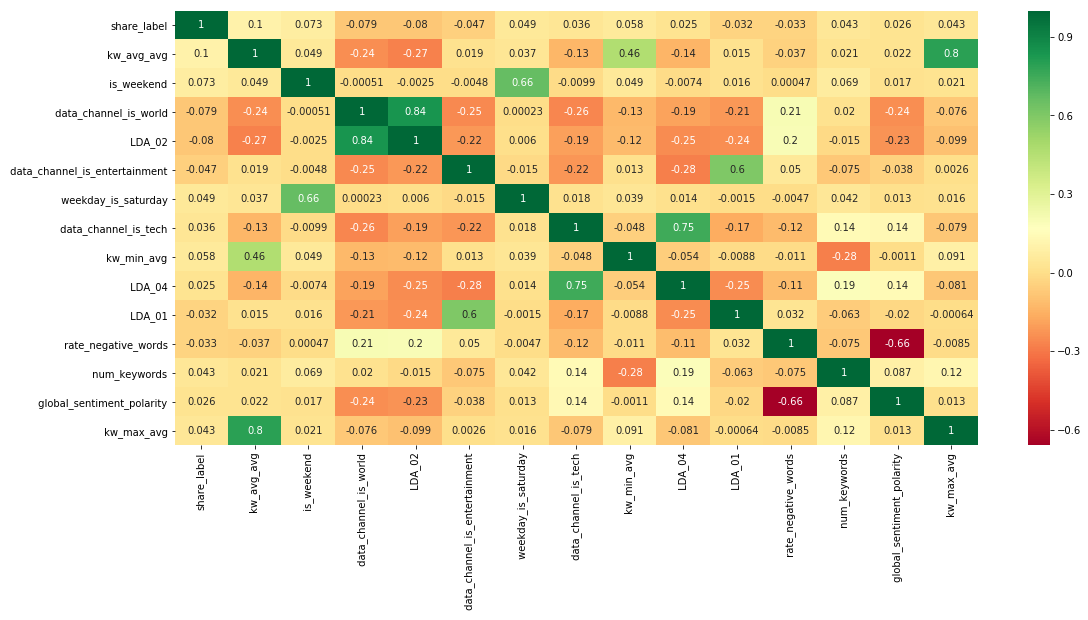

In [92]:
X1 = X[features_list]
plt.subplots(1,1,figsize=(18,8))
sns.heatmap(X1.corr(),annot=True,cmap="RdYlGn")

# Following features should be remvoed from above list: kw_max_avg, kw_min_avg, weekday_is_saturday, LDA_02, LDA_01, LDA_04

In [93]:
features_to_remove = [' kw_max_avg',' kw_min_avg',' weekday_is_saturday',' LDA_02',' LDA_01',' LDA_04']
lst = list(features_list.values)
selected_features = [e for e in lst if e not in features_to_remove]

## Let us take top 6
# selected_features = selected_features[:6]

selected_features 

['share_label',
 ' kw_avg_avg',
 ' is_weekend',
 ' data_channel_is_world',
 ' data_channel_is_entertainment',
 ' data_channel_is_tech',
 ' rate_negative_words',
 ' num_keywords',
 ' global_sentiment_polarity']

# VIF

In [95]:
### calculating the vif values as multicollinearity exists (as stated by warning 2)

from statsmodels.stats.outliers_influence import variance_inflation_factor

[variance_inflation_factor(X.values, j) for j in range(1, X.shape[1])]

[1.1357967875806294,
 3.3853112694347884,
 20.378399188152674,
 251.16104201559168,
 18.34246577848035,
 1.7270962194458037,
 1.4216713294125773,
 1.6531108333168663,
 1.2539595039825402,
 12.032365087939892,
 1.527386053293838,
 2.3927192427218626,
 3.0660625540877926,
 6.257082500265039,
 2.307613735941335,
 6.5301352475604295,
 7.752495536027074,
 3.916372829028184,
 10.673769614198312,
 10.529685667623335,
 1.4089086722316666,
 4.876353383106777,
 4.000181314118948,
 2.2508550668671474,
 6.540413773754167,
 10.198307644292928,
 6.958149210222609,
 8.997626363730285,
 20.60857091462568,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 2.8435818484016897,
 7.912447313924966,
 4.720367493149192,
 6.683359165580098,
 313.3861248889064,
 220.04201534305096,
 5.954164785300204,
 1.9800073043053408,
 3.3405396066352706,
 7.644504981063522,
 5.311289609557225,
 2.956204986240673,
 2.3951369998955383,
 1.3156945147930112,
 1.446029337507062,
 2.399402008900683,

# BACKWARD ELIMINATION

In [96]:
#Adding constant column of ones, mandatory for sm.OLS model
X_1 = sm.add_constant(X)
#Fitting sm.OLS model
model = sm.OLS(y,X_1).fit()
model.pvalues

const                              2.158493e-78
 timedelta                         1.748819e-05
 n_tokens_title                    7.342333e-01
 n_tokens_content                  2.073796e-03
 n_unique_tokens                   4.088161e-01
 n_non_stop_words                  3.468234e-01
 n_non_stop_unique_tokens          3.538443e-02
 num_hrefs                         8.137211e-07
 num_self_hrefs                    5.808783e-04
 num_imgs                          9.675524e-01
 num_videos                        6.487410e-01
 average_token_length              1.935363e-01
 num_keywords                      3.540051e-04
 data_channel_is_lifestyle         4.857608e-01
 data_channel_is_entertainment     3.256256e-05
 data_channel_is_bus               1.769337e-01
 data_channel_is_socmed            5.060502e-28
 data_channel_is_tech              3.672782e-14
 data_channel_is_world             9.865811e-01
 kw_min_min                        7.785812e-16
 kw_max_min                        1.616

# EMBEDDED METHOD

In [97]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

Best alpha using built-in LassoCV: 5944.767123
Best score using built-in LassoCV: 0.046288


In [98]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  
      str(sum(coef == 0)) + " variables")

Lasso picked 10 variables and eliminated the other 50 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

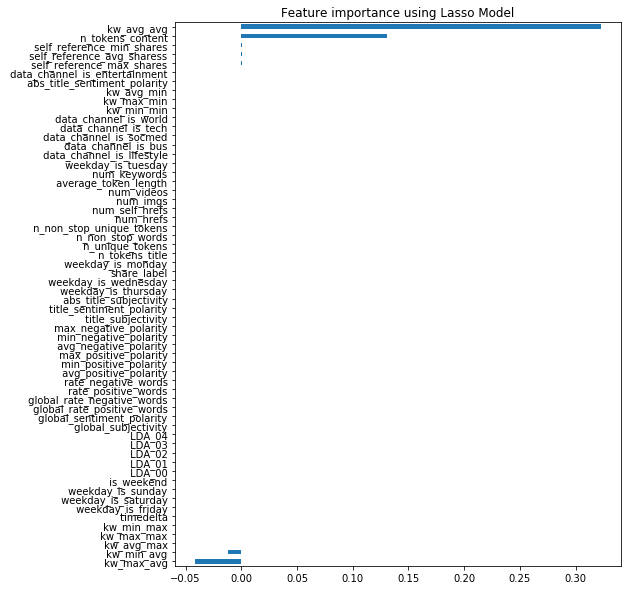

In [99]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

# RFE METHOD

In [100]:
from sklearn.feature_selection import RFE
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 11)

In [101]:
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)
print(rfe.support_)
print(rfe.ranking_)

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False  True  True  True  True  True  True
  True  True False  True  True  True False False False False False False
 False False False False False False False False False False False False]
[37 36 40 10 14  6 33 32 34 38 31 30 22 11 12  9 18 15 35 44 43 49 50 48
 42 41 39 46 47 45  1  1  1  1  1  1  1  1  3  1  1  1  2  8 25  5  7 17
 16 26 13 27 28 24 23 20 21 19 29  4]


In [102]:
#no of features
nof_list=np.arange(1,13)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 11
Score with 11 features: 0.051780


In [103]:
cols = list(X.columns)
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 10)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index([' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_01', ' LDA_02'],
      dtype='object')


# 9. logistic, decision tree, KNN, Naïve Bayes

In [17]:
x = on.drop([' shares','share_label'],axis=1)
y = on['share_label']

sc = StandardScaler()
x = sc.fit_transform(x)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=2)

# Basic Logistic Regression

In [18]:
LR = LogisticRegression()
LR.fit(x_train,y_train)
y_pred_LR = LR.predict(x_test)

In [20]:
print(classification_report(y_test,y_pred_LR))

             precision    recall  f1-score   support

          0       0.81      0.98      0.89      9494
          1       0.47      0.06      0.10      2400

avg / total       0.74      0.80      0.73     11894



In [21]:
roc_auc_score(y_test,y_pred_LR)

0.52058462362193658

In [22]:
MOdel = []
ROC_AUC_Accuracy = []

In [23]:
Model = ['Logistic Regression']
ROC_AUC_Accuracy = [roc_auc_score(y_test,y_pred_LR)]

# Naive Bayes

In [24]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(x_train,y_train)
y_pred_nb = nb.predict(x_test)

In [25]:
print(classification_report(y_test,y_pred_nb))

             precision    recall  f1-score   support

          0       0.80      0.96      0.87      9494
          1       0.32      0.08      0.12      2400

avg / total       0.71      0.78      0.72     11894



In [26]:
roc_auc_score(y_test,y_pred_nb)

0.51774370655150626

In [27]:
Model.append('Naive Bayes')
ROC_AUC_Accuracy.append(roc_auc_score(y_test,y_pred_nb))

Model, ROC_AUC_Accuracy

(['Logistic Regression', 'Naive Bayes'],
 [0.52058462362193658, 0.51774370655150626])

# DecisionTree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

params = {
    
    'criterion':['gini','entropy'],
    'splitter':['best','random'],
    'max_depth':range(1,10,1),
    'max_leaf_nodes':range(2,10,1),
    'max_features':['auto','log2']
    
}

dt = DecisionTreeClassifier()

gs = GridSearchCV(estimator=dt,n_jobs=-1,cv=3,param_grid=params,scoring='recall')
gs.fit(x,y)

In [ ]:
gs.best_params_

In [ ]:
dt = DecisionTreeClassifier(**gs.best_params_)
dt.fit(x_train,y_train)
y_pred_dt = dt.predict(x_test)

In [ ]:
print(classification_report(y_test,y_pred_dt))

In [ ]:
roc_auc_score(y_test,y_pred_dt)

In [ ]:
Model.append('Decision Tree')
ROC_AUC_Accuracy.append(roc_auc_score(y_test,y_pred_dt))

Model, ROC_AUC_Accuracy

# kNN

In [10]:
knn_clf.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [12]:
knn_clf = KNeighborsClassifier(n_neighbors = 5)
knn_clf = knn_clf.fit(x_train, y_train)
y_pred_knn = knn_clf.predict(x_test)
#knn_train=model.score(x_train,y_train)
knn_test=accuracy_score(y_test,y_pred_knn)
knn_precision = metrics.precision_score(y_test,y_pred_knn)
knn_recall = metrics.recall_score(y_test,y_pred_knn)

metrices = {'accuray':[x_train, x_train, x_train, x_train],
           'f1_Score':[y_pred_LR, y_pred_dt, y_pred_knn, y_pred_nb],
           'recall':[lr_recall, dt_recall, knn_recall, nb_recall],
           'Precision':[lr_test, dt_test, knn_test, nb_test]
           }

In [ ]:
metrics_df = pd.DataFrame(metrices, index = ['logistic','Decision Tree','KNN','NaiveBayes'])
metrics_df

# We can observe that accuracy of KNN,Decision Tree, KNN are similar and bit higher than NaiveBayes.
Precision is also similar for all the models.
Considering f1_score, we can say Logistic Regression is better among all the models